# Predicting cylinder banding in rotogravure printing press

## Phase 1: Data preparation and visualization

**Group Name**: The lone wolf

**Student Information**: <br>
Name: Suraj Suresh <br>
Student ID: s3916081

## Table of contents

1. [**Introduction**](#introduction)
> 1.1 [Dataset Source](#1.1)<br>
> 1.2 [Dataset Details](#1.2)<br>
> 1.3 [Data retrieval](#1.3)<br>
> 1.4 [Target feature](#1.4)<br>
2. [**Goals and objective**](#goals)
3. [**Data cleaning and preprocessing**](#pp)
> 3.1 [Data cleaning steps](#3.1)<br>
> 3.2 [Cleaning categorical variables](3.2)<br>
> 3.3 [Cleaning numerical variables](3.3)<br>
4. [**Data visualization and exploration**](#dve)
> 4.1 [Univariate analysis](#4.1)<br>
>> 4.1.1 [Bar graphs for categorical variables](#4.1.1)<br>
>> 4.1.2 [Histograms of numeric variables](#4.1.2)<br>
>> 4.1.3 [Boxplot of numeric variables](#4.1.3)<br>
>> 4.1.4 [Outlier treatment of numeric variables](#4.1.4)<br>
>> 4.1.5 [Boxplot of numerical variables after outlier treatment](#4.1.5)<br>

> 4.2 [Bivariate analysis](#4.2)<br>
>> 4.2.1 [Heatmap between numerical variables](#4.2.1)<br>
>> 4.2.2 [Scatterplot between correlated features](#4.2.2)<br>
>> 4.2.3 [Association between the target and numerical features (boxplot)](#4.2.3)<br>
>> 4.2.4 [Association between the target and categorical features (bargraph)](#4.2.4)<br>

> 4.3 [Trivariate analysis](#4.3)<br>
>> 4.3.1 [Scatterplot between ink_pct and varnish_pct broken by the target variable band_type](#4.3.1)<br>
>> 4.3.2 [Scatterplot between varnish_pct and solvent_pct broken by the target variable band_type](#4.3.2)<br>

5. [**Summary and conclusion**](#sc)<br>
6. [**References**](#ref)

## Introduction: <a id='introduction'></a>

### Dataset Source: <a id='1.1'></a>
The dataset used in this study is procured from the UCI machine learning repository. This dataset contains features that are recorded during every rotogravure printing press processes.

### Dataset Details: <a id='1.2'></a>
This dataset consists of 541 observations and 40 features. Out of these, the first 39 are the independent features and the last one 'band_type' is the target variable. These features will be analyzed and elected to remain in the dataset in this phase of the project.

#### Data retrieval: <a id='1.3'></a>
- We store the dataset locally from the UCI machine [learning repository] (https://archive.ics.uci.edu/ml/datasets/Cylinder+Bands) and load the modules we will use throughout this report.
- We display the top 10 rows from this dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

In [2]:
pd.set_option('display.max_columns', None) 

In [3]:
df = pd.read_csv('bands.data', header=None)
df.columns = ['timestamp', 'cylinder number', 'customer', 'job number', 'grain screened', 'ink color',
                  'proof on ctd ink', 'blade mfg', 'cylinder division', 'paper type', 'ink type', 'direct steam',
                  'solvent type', 'type on cylinder', 'press type', 'press', 'unit number', 'cylinder size',
                  'paper mill location', 'plating tank', 'proof cut', 'viscosity', 'caliper', 'ink temperature',
                  'humidity', 'roughness', 'blade pressure', 'varnish pct', 'press speed', 'ink pct', 'solvent pct',
                  'ESA Voltage', 'ESA Amperage', 'wax', 'hardener', 'roller durometer', 'current density',
                  'anode space ratio', 'chrome content', 'band type'] # assigning column names.
df.head()

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,ink type,direct steam,solvent type,type on cylinder,press type,press,unit number,cylinder size,paper mill location,plating tank,proof cut,viscosity,caliper,ink temperature,humidity,roughness,blade pressure,varnish pct,press speed,ink pct,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter94,821,2.0,TABLOID,NorthUS,1911,55,46,0.2,17,78,0.75,20,13.1,1700,50.5,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter94,821,2.0,TABLOID,NorthUS,?,55,46,0.3,15,80,0.75,20,6.6,1900,54.9,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,815,9.0,CATALOG,NorthUS,?,62,40,0.433,16,80,?,30,6.5,1850,53.8,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,9.0,CATALOG,NorthUS,1910,52,40,0.3,16,75,0.3125,30,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,816,2.0,TABLOID,?,1910,50,46,0.3,17,80,0.75,30,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


In [4]:
# removing spaces in column names.
df.columns = [i.lower().replace(' ','_') for i in df.columns]
df.head()

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cylinder,press_type,press,unit_number,cylinder_size,paper_mill_location,plating_tank,proof_cut,viscosity,caliper,ink_temperature,humidity,roughness,blade_pressure,varnish_pct,press_speed,ink_pct,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter94,821,2.0,TABLOID,NorthUS,1911,55,46,0.2,17,78,0.75,20,13.1,1700,50.5,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter94,821,2.0,TABLOID,NorthUS,?,55,46,0.3,15,80,0.75,20,6.6,1900,54.9,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,815,9.0,CATALOG,NorthUS,?,62,40,0.433,16,80,?,30,6.5,1850,53.8,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,9.0,CATALOG,NorthUS,1910,52,40,0.3,16,75,0.3125,30,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,816,2.0,TABLOID,?,1910,50,46,0.3,17,80,0.75,30,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


In [5]:
df.columns

Index(['timestamp', 'cylinder_number', 'customer', 'job_number',
       'grain_screened', 'ink_color', 'proof_on_ctd_ink', 'blade_mfg',
       'cylinder_division', 'paper_type', 'ink_type', 'direct_steam',
       'solvent_type', 'type_on_cylinder', 'press_type', 'press',
       'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank',
       'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humidity',
       'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 'ink_pct',
       'solvent_pct', 'esa_voltage', 'esa_amperage', 'wax', 'hardener',
       'roller_durometer', 'current_density', 'anode_space_ratio',
       'chrome_content', 'band_type'],
      dtype='object')

In [6]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
        ['timestamp','object','yyyymmdd','The date the observation was made'],
        ['cylinder_number','nominal categorical','NA','The cylinder number the reading was from'],
        ['customer','nominal categorical','NA','The customer for which the production was occuring'],
        ['job_number','nominal categorical','NA','The job number of each production'],
        ['green_screened','nominal categorical (boolean)','NA','Binary reading to list if green screening occured during production'],
        ['ink_color','nominal categorical','NA','Ink colour used for production'],
        ['proof_on_ctd_ink','nominal categorical','NA','Reading to list the type of proof used for production'],
        ['blade_mfg','nominal categorical','NA','The company that performed blade manufacturing'],
        ['cylinder_division','nominal categorical','NA','The kind of cylinder division used.'],
        ['paper_type','nominal categorical', 'NA','Type of paper used'],
        ['ink_type','nominal categorical','NA','Type of ink used.'],
        ['direct_steam','nominal categorical (binary)','NA','Binary reading to list whether the exposure to direct steam was done during production'],
        ['solvent_type','nominal categorical','NA','Type of solvent used'],
        ['type_on_cylinder','nominal categorical (binary)','NA','Binary reading to list whether type of cylinder was on the cylinder'],
        ['press_type','nominal categorical','NA','The kind of press used'],
        ['press','nominal categorical','NA','The press used in production'],
        ['unit_number','nominal categorical','NA','The current batch number'],
        ['cylinder_size','nominal categorical','NA','The cylinder size type used'],
        ['paper_mill_location','nominal categorical','NA','The location from where the paper was purchased'],
        ['plating_tank','nominal categorical','NA','The kind of plating tank used'],
        ['proof_cut','Numeric','NA','Proof cut measurement'],
        ['viscocity','Numeric','NA','Viscocity of the solvent'],
        ['caliper','Numeric','NA','Reading on the caliper'],
        ['ink_temperature','Numeric','NA','The ink\'s temperature during production'],
        ['humidity','Numeric','NA','The humidity reading during production'],
        ['roughness','Numeric','NA','The roughness reading of the product'],
        ['blade_pressure','Numeric','NA','The blade\'s pressure during production'],
        ['varnish_pct','Numeric','NA','Percentage of varnish used for production'],
        ['press_speed','Numeric','NA','Production rate of the manufacturing unit'],
        ['ink_pct','Numeric','NA','Percentage of ink used in manufacturing'],
        ['roller_durometer','Numeric','NA','Reading on the roller\'s durometer'],
        ['current_density','Numeric','NA','Density of the mixture during production'],
        ['anode_space_ratio','Numeric','NA','The anode space ratio during production'],
        ['chrome_content','Numeric','NA','The chrome content in the mixture during production'],
        ['band_type','Nominal categorical (binary)','NA','Whether there was cylinder banding in the process']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤═══════════════════════════════╤══════════╤════════════════════════════════════════════════════════════════════════════════════════╕
│ Name                │ Data Type                     │ Units    │ Description                                                                            │
╞═════════════════════╪═══════════════════════════════╪══════════╪════════════════════════════════════════════════════════════════════════════════════════╡
│ timestamp           │ object                        │ yyyymmdd │ The date the observation was made                                                      │
├─────────────────────┼───────────────────────────────┼──────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ cylinder_number     │ nominal categorical           │ NA       │ The cylinder number the reading was from                                               │
├─────────────────────┼───────────────────────────────┼─────────

### Target feature <a id='1.4'></a>

In this project, the target feature in this dataset will be band_type, which is a categorical prediction. That is, for each production instance in the dataset, we will classify them as 'band' or 'noband'.

## Goals and objectives <a id='goals'></a>

This dataset is from a rotogravure printing press and aims to discover if there were any production delays called as cylinder banding. This classification of processes (as delayed or not delayed) were once performed by experts using decision rules. However, machine learning showed great promise in this knowledge acquisition and rule generation. Experts are now required to simply assess the classification of these learning systems and enhance its accuracy. Now the manual task of classifying each production process is handed over to a system that is supervised by an expert.

Our objective in this project is two-fold:
- Build a machine learning model that best predicts whether cylinder banding occured or not in each recorded process
- Identify the features that best describe the classification of whether there were any process delays.

At this point, we make an important assumption that the readings in these rows aren't correlated. That is, cylinder banding outcome for one observation doesn't dictate the outcome of the next. And because of this, we will choose to eliminate the feature timestamp from our analysis. This is a realistic assumption and it also allows us to circumvent any time-series aspect of this analysis.

## Data cleaning and preprocessing <a id='pp'></a>

In this section, we describe the data cleaning and preprocessing steps that were undertaken for this project.

### Data cleaning steps: <a id='3.1'></a>

- Drop irrelevant or redundant features in the dataset.
- Check and rename/modify some column names. (This was already performed after the file was read in)
- Check for missing values or other place holders used for missing values.
- Remove rows with missing values or impute the cells with reasonable values (mode for categorical and median for numeric).
- Assigning right datatype to all columns after data cleaning and missing value imputation

Displaying all the columns in our dataset.

In [7]:
df.columns

Index(['timestamp', 'cylinder_number', 'customer', 'job_number',
       'grain_screened', 'ink_color', 'proof_on_ctd_ink', 'blade_mfg',
       'cylinder_division', 'paper_type', 'ink_type', 'direct_steam',
       'solvent_type', 'type_on_cylinder', 'press_type', 'press',
       'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank',
       'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humidity',
       'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 'ink_pct',
       'solvent_pct', 'esa_voltage', 'esa_amperage', 'wax', 'hardener',
       'roller_durometer', 'current_density', 'anode_space_ratio',
       'chrome_content', 'band_type'],
      dtype='object')

We had decided to drop 'timestamp' column from our analysis in accordance with our assumption that the readings in each row is independent of the readings in the other rows. So we will drop this column.

In [8]:
df.shape

(541, 40)

In [9]:
df.drop(labels='timestamp', axis=1, inplace=True)

In [10]:
df.shape # the timestamp column is dropped.

(541, 39)

It was also found that '?' was used as a placeholder for missing values in the dataset. This shall be replaced for all columns

In [11]:
df.isnull().sum()

cylinder_number        0
customer               0
job_number             0
grain_screened         0
ink_color              0
proof_on_ctd_ink       0
blade_mfg              0
cylinder_division      0
paper_type             0
ink_type               0
direct_steam           0
solvent_type           0
type_on_cylinder       0
press_type             0
press                  0
unit_number            0
cylinder_size          1
paper_mill_location    1
plating_tank           1
proof_cut              1
viscosity              1
caliper                1
ink_temperature        2
humidity               2
roughness              2
blade_pressure         2
varnish_pct            2
press_speed            2
ink_pct                2
solvent_pct            2
esa_voltage            2
esa_amperage           2
wax                    2
hardener               2
roller_durometer       2
current_density        2
anode_space_ratio      2
chrome_content         2
band_type              2
dtype: int64

In [12]:
df.isnull().sum().sum() # currently there are only 40 cells that have a missing value.

40

In [13]:
# replacing all the '?' in the dataset as missing values.
for c in df.columns:
    df[c] = [i if i!='?' else float('NaN') for i in df[c]]

In [14]:
df.isnull().sum()

cylinder_number          1
customer                 0
job_number               1
grain_screened          49
ink_color                0
proof_on_ctd_ink        57
blade_mfg               60
cylinder_division        0
paper_type               0
ink_type                 1
direct_steam            25
solvent_type            56
type_on_cylinder        19
press_type               1
press                    1
unit_number              0
cylinder_size            4
paper_mill_location    157
plating_tank            19
proof_cut               55
viscosity                6
caliper                 28
ink_temperature          4
humidity                 3
roughness               32
blade_pressure          65
varnish_pct             57
press_speed             12
ink_pct                 57
solvent_pct             57
esa_voltage             58
esa_amperage            56
wax                      8
hardener                 9
roller_durometer        56
current_density          9
anode_space_ratio        9
c

We can see that the target variable 'band_type' has two null values. We will be dropping them as they add no value to our dataset.

In [15]:
df[df.band_type.isnull()]

,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cylinder,press_type,press,unit_number,cylinder_size,paper_mill_location,plating_tank,proof_cut,viscosity,caliper,ink_temperature,humidity,roughness,blade_pressure,varnish_pct,press_speed,ink_pct,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
521,x799,eckerds,37392,NaN,key,NaN,NaN,gallatin,uncoated,uncoated,NaN,NaN,yes,Motter94,824,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,1910,NaN,45,0.200,17,84,0.8125,27,NaN,1865,NaN,NaN,NaN,NaN,1.5,0.7,NaN,40,109.1,95,band,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.shape

(541, 39)

In [17]:
df.drop(labels=list(df[df.band_type.isnull()].index), axis=0, inplace=True)

In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
df.shape # we can see that the two rows have been dropped.

(539, 39)

In [20]:
df.isnull().sum().sum()

986

Now we have the correct number of missing values in the dataset. Their imputation will be carried out after data cleaning.

We will list all the categorical and numeric columns separately for the ease of analysis

In [21]:
# all categorical columns
cat = ['cylinder_number','customer','job_number','grain_screened','ink_color','proof_on_ctd_ink','blade_mfg',
       'cylinder_division','paper_type','ink_type','direct_steam','solvent_type','type_on_cylinder','press_type','press',
       'unit_number','cylinder_size','paper_mill_location','plating_tank','band_type']

# all numeric columns
num = [i for i in df.columns if i not in cat]

In [22]:
len(cat+num) # we have listed all the columns in these lists

39

Listing the unique values for all categorical variables.

In [23]:
for c in cat:
    print(c+'\n')
    print(list(df[c].value_counts().index))
    print('-'*20)

cylinder_number

['M254', 'X129', 'F601', 'R15', 'R6', 'T281', 'G81', 'X823', 'X753', 'F679', 'G5', 'X760', 'G150', 'I49', 'F670', 'X817', 'X160', 'T178', 'I353', 'G108', 'R23', 'I357', 'X820', 'X405', 'Y270', 'G407', 'G55', 'X346', 'G518', 'X116', 'X390', 'X818', 'O14', 'J582', 'X197', 'O21', 'X13', 'M260', 'X799', 'X381', 'X249', 'F510', 'E83', 'G634', 'B125', 'X766', 'X220', 'F159', 'E310', 'X251', 'X60', 'F337', 'X291', 'F257', 'X35', 'G69', 'E84', 't26', 'X139', 'X367', 'X292', 'R14', 'J42', 'G465', 'X29', 'X271', 'F374', 'X750', 'aa58', 'I347', 'X199', 'W30', 'R9', 'M337', 'F126', 'X138', 'X273', 'G608', 'X264', 'J40', 'F615', 'I331', 'X118', 'J60', 'O4', 'aa28', 'X356', 'X295', 'X196', 'M65', 'X414', 'F329', 'aa45', 'B7', 'X147', 'I354', 'W516', 'F192', 'F067', 'X184', 'X342', 'T78', 'E91', 'F72', 'F242', 'J45', 'G459', 'G412', 'X12', 'W717', 'X7', 'X821', 'W785', 'X787', 'X771', 'F219', 'i311', 'X253', 'X203', 'W395', 'F133', 'X768', 'X374', 'I346', 'X389', 'aa66', 'G648', 'G67

### Cleaning categorical variables

**Steps for cleaning categorical variables:**
- First check will be to avoid upper and lower case issues and extra space issues in the observations. We will check if the number of unique values remain the same after converting all sub-categories to lower cases and stripping them of extra space as well. If there is a discrepancy in the number of unique values after this transformation, then the columns will be corrected individually. All the values will be transformed to lower case and stripped off extra spaces.
- For imputing missing values, we will assign the mode of the column in the missing cells.

In [24]:
err = [] # list of columns that have upper/lower case errors
for c in cat:
    a = len(df[c].value_counts())
    b = len(pd.Series([i.lower().strip() if type(i)!=float else i for i in df[c]]).value_counts())
    if a!=b:
        err.append(c)
err
# the float condition in line 3 is to sidestep missing values which are stored as float.

['cylinder_number',
 'customer',
 'ink_color',
 'cylinder_division',
 'paper_type',
 'ink_type',
 'direct_steam',
 'type_on_cylinder',
 'cylinder_size',
 'paper_mill_location']

In [25]:
for c in err:
    df[c] = [i.lower().strip() if type(i)!=float else i for i in df[c]]

Now that the categorical variables are corrected, we will see their unique values again.

In [26]:
for c in cat:
    print(c)
    print(list(df[c].value_counts().index))
    print('-'*10)

cylinder_number
['x129', 'm254', 'r6', 'f601', 'r15', 'x760', 'f679', 'g81', 'x753', 'f670', 't281', 'x823', 'm337', 'i49', 'g150', 'g5', 't178', 'x139', 'i353', 'x381', 'x292', 't26', 'g608', 'x390', 'o14', 'aa43', 'x116', 'x766', 'x249', 'x35', 'x220', 'x818', 'x817', 'x346', 'x118', 'g465', 'm260', 'o21', 'f510', 'f126', 'j582', 'r14', 'g518', 'r32', 'r9', 'aa58', 'x251', 'e84', 'g108', 'f374', 'x29', 'f159', 'g407', 'b125', 'f337', 'x160', 'j60', 'x264', 'f615', 'f257', 'x291', 'x13', 'x799', 'g55', 'w30', 'i331', 'x138', 'x199', 'j42', 'x750', 'x60', 'r23', 'x271', 'e83', 'j40', 'i357', 'x273', 'y270', 'g69', 'x197', 'x367', 'i347', 'x820', 'g634', 'e310', 'f131', 'x405', 'x184', 'x84', 'f321', 'o1', 'f267', 'r7', 'm103', 't380', 'x408', 'f590', 'x25', 'f685', 'x91', 'f38', 'e72', 't32', 'x351', 'f492', 'e302', 'aa66', 't8', 'f569', 'x356', 'x235', 'x315', 'r5', 'e68', 'i365', 'i311', 'i400', 'x243', 'aa28', 'x768', 'o8', 't78', 'x66', 'f26', 'i317', 'x802', 'aa11', 'x163', 'x720'

Now there are no discrepancies in the categorical data. They have been dealt with.
But we can see that 'ink_color' has only one sub-category - 'key'. This adds no value to our analysis. Thus, we can drop this column.

In [27]:
df.shape

(539, 39)

In [28]:
df.drop(labels='ink_color',axis=1,inplace=True)

In [29]:
df.shape # ink_color has been dropped.

(539, 38)

In [30]:
cat.remove('ink_color')

In [31]:
cat

['cylinder_number',
 'customer',
 'job_number',
 'grain_screened',
 'proof_on_ctd_ink',
 'blade_mfg',
 'cylinder_division',
 'paper_type',
 'ink_type',
 'direct_steam',
 'solvent_type',
 'type_on_cylinder',
 'press_type',
 'press',
 'unit_number',
 'cylinder_size',
 'paper_mill_location',
 'plating_tank',
 'band_type']

Listing the number of missing values in the categorical columns

In [32]:
df.loc[:,cat].isnull().sum()

cylinder_number          0
customer                 0
job_number               0
grain_screened          48
proof_on_ctd_ink        56
blade_mfg               59
cylinder_division        0
paper_type               0
ink_type                 0
direct_steam            24
solvent_type            54
type_on_cylinder        18
press_type               0
press                    0
unit_number              0
cylinder_size            3
paper_mill_location    155
plating_tank            18
band_type                0
dtype: int64

'paper_mill_location' has the highest number of missing values, over 25%. Imputing the mode here might not represent the actual source of the paper products. Any inferences drawn regarding this feature has to be considered critically.

In [33]:
for c in cat:
    if df[c].isnull().sum()==0:
        continue
    imp = list(df[c].mode())[0]
    df.iloc[df[df[c].isnull()].index, list(df.columns).index(c)] = imp

In [34]:
df.loc[:,cat].isnull().sum()

cylinder_number        0
customer               0
job_number             0
grain_screened         0
proof_on_ctd_ink       0
blade_mfg              0
cylinder_division      0
paper_type             0
ink_type               0
direct_steam           0
solvent_type           0
type_on_cylinder       0
press_type             0
press                  0
unit_number            0
cylinder_size          0
paper_mill_location    0
plating_tank           0
band_type              0
dtype: int64

All the null values in the categorical columns have been imputed with mode

Listing the repetition for each sub-category, for columns that have less than 10 unique values.

In [35]:
for c in cat:
    cur = df[c].value_counts()
    if len(cur)>=10:
        continue
    print(c)
    print(cur)
    print('-'*10)

grain_screened
NO     329
YES    210
Name: grain_screened, dtype: int64
----------
proof_on_ctd_ink
YES    517
NO      22
Name: proof_on_ctd_ink, dtype: int64
----------
blade_mfg
BENTON      538
UDDEHOLM      1
Name: blade_mfg, dtype: int64
----------
cylinder_division
gallatin    539
Name: cylinder_division, dtype: int64
----------
paper_type
uncoated    293
coated      223
super        23
Name: paper_type, dtype: int64
----------
ink_type
coated      291
uncoated    230
cover        18
Name: ink_type, dtype: int64
----------
direct_steam
no     537
yes      2
Name: direct_steam, dtype: int64
----------
solvent_type
LINE      522
XYLOL      15
NAPTHA      2
Name: solvent_type, dtype: int64
----------
type_on_cylinder
yes    403
no     136
Name: type_on_cylinder, dtype: int64
----------
press_type
Motter94     237
WoodHoe70    176
Albert70      78
Motter70      48
Name: press_type, dtype: int64
----------
press
816    103
815     89
821     77
802     62
824     62
827     59
813     

We can see some columns where there is high class imbalance between the sub-categories. If the imbalance is too much, then again it adds no value to our analysis. For example, 'blade_mfg' has two sub-categories - BENTON and UDDEHOLM. <br>

But, there is only one record with UDDEHOLM and every other record lists BENTON. This column can be dropped from our analysis.
Other such columns are - 'direct_steam', 'cylinder_division'.<br>

These columns can be dropped. There are other variables with some class imbalance but not to the extent of that in these variables. So they will be retained for now.

In [36]:
df.shape

(539, 38)

In [37]:
df.drop(labels=['blade_mfg','direct_steam','cylinder_division'], axis=1, inplace=True)

In [38]:
df.shape

(539, 35)

In [39]:
cat.remove('blade_mfg')
cat.remove('direct_steam')
cat.remove('cylinder_division')

Now we have only 35 columns in total.

### Cleaning numerical variables: <a id='3.2'></a>

Steps followed for cleaning numeric columns:
- First, all numeric columns will be converted to float datatype as they are still stored as objects.
- Any commas and space issues that are now allowing this datatype conversion will be corrected.
- All the null values in each column will be imputed with the median value of that column.

In [40]:
df.loc[:,num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   proof_cut          485 non-null    object
 1   viscosity          534 non-null    object
 2   caliper            512 non-null    object
 3   ink_temperature    537 non-null    object
 4   humidity           538 non-null    object
 5   roughness          509 non-null    object
 6   blade_pressure     476 non-null    object
 7   varnish_pct        484 non-null    object
 8   press_speed        529 non-null    object
 9   ink_pct            484 non-null    object
 10  solvent_pct        484 non-null    object
 11  esa_voltage        483 non-null    object
 12  esa_amperage       485 non-null    object
 13  wax                533 non-null    object
 14  hardener           532 non-null    object
 15  roller_durometer   485 non-null    object
 16  current_density    532 non-null    object
 1

As we can see, all numeric columns are still stored as objects. They will be typecasted to float datatype.

In [41]:
num

['proof_cut',
 'viscosity',
 'caliper',
 'ink_temperature',
 'humidity',
 'roughness',
 'blade_pressure',
 'varnish_pct',
 'press_speed',
 'ink_pct',
 'solvent_pct',
 'esa_voltage',
 'esa_amperage',
 'wax',
 'hardener',
 'roller_durometer',
 'current_density',
 'anode_space_ratio',
 'chrome_content']

In [42]:
for c in num:
    df[c] = [float(i) for i in df[c]]

In [43]:
df.loc[:,num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   proof_cut          485 non-null    float64
 1   viscosity          534 non-null    float64
 2   caliper            512 non-null    float64
 3   ink_temperature    537 non-null    float64
 4   humidity           538 non-null    float64
 5   roughness          509 non-null    float64
 6   blade_pressure     476 non-null    float64
 7   varnish_pct        484 non-null    float64
 8   press_speed        529 non-null    float64
 9   ink_pct            484 non-null    float64
 10  solvent_pct        484 non-null    float64
 11  esa_voltage        483 non-null    float64
 12  esa_amperage       485 non-null    float64
 13  wax                533 non-null    float64
 14  hardener           532 non-null    float64
 15  roller_durometer   485 non-null    float64
 16  current_density    532 non

Now all the numeric columns are of float datatype.<br>
Checking the number of null values in each numeric column.

In [44]:
df.loc[:,num].isnull().sum()

proof_cut            54
viscosity             5
caliper              27
ink_temperature       2
humidity              1
roughness            30
blade_pressure       63
varnish_pct          55
press_speed          10
ink_pct              55
solvent_pct          55
esa_voltage          56
esa_amperage         54
wax                   6
hardener              7
roller_durometer     54
current_density       7
anode_space_ratio     7
chrome_content        3
dtype: int64

All these null values will be imputed with the median of that column.

In [45]:
for c in num:
    if df[c].isnull().sum()==0:
        continue
    imp = df[c].median()
    df.iloc[df[df[c].isnull()].index, list(df.columns).index(c)] = imp

In [46]:
df.loc[:,num].isnull().sum()

proof_cut            0
viscosity            0
caliper              0
ink_temperature      0
humidity             0
roughness            0
blade_pressure       0
varnish_pct          0
press_speed          0
ink_pct              0
solvent_pct          0
esa_voltage          0
esa_amperage         0
wax                  0
hardener             0
roller_durometer     0
current_density      0
anode_space_ratio    0
chrome_content       0
dtype: int64

#### Descriptive statistics of numeric variables

In [47]:
df.loc[:,num].describe()

,proof_cut,viscosity,caliper,ink_temperature,humidity,roughness,blade_pressure,varnish_pct,press_speed,ink_pct,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,45.032468,50.940631,0.275414,15.359202,78.538033,0.725762,30.801484,5.537662,1822.925788,55.751948,38.560742,1.182282,0.034323,2.402041,0.987755,34.697588,39.068646,103.034021,99.601113
std,8.578219,8.021822,0.067736,1.275653,7.727464,0.188124,8.577631,6.526084,325.652103,5.280225,3.317694,2.365490,0.394231,0.542596,0.365558,4.279980,2.340233,4.976267,1.848962
min,25.000000,35.000000,0.133000,11.200000,57.000000,0.056250,16.000000,0.000000,0.000000,41.000000,22.000000,0.000000,0.000000,0.000000,0.000000,28.000000,30.000000,83.330000,90.000000
25%,40.000000,43.000000,0.200000,14.600000,73.000000,0.625000,25.000000,0.000000,1600.000000,52.600000,36.900000,0.000000,0.000000,2.400000,0.800000,30.000000,40.000000,100.000000,100.000000
50%,45.000000,50.000000,0.267000,15.200000,78.000000,0.750000,30.000000,3.400000,1800.000000,56.750000,38.500000,0.000000,0.000000,2.500000,1.000000,34.000000,40.000000,103.127500,100.000000
75%,50.000000,56.000000,0.300000,16.000000,82.000000,0.812500,32.000000,9.750000,2000.000000,58.800000,41.200000,1.750000,0.000000,2.600000,1.000000,38.500000,40.000000,106.450000,100.000000
max,72.500000,72.000000,0.533000,24.500000,105.000000,1.250000,70.000000,35.800000,2600.000000,76.900000,53.400000,16.000000,6.000000,3.100000,3.000000,60.000000,45.000000,117.860000,100.000000


## Data visualization and exploration <a id='dve'></a>

All the data cleaning and missing value imputation is completed.<br> 
We can now proceed to analyzing the data through visualizations and descriptive statistics.

In [48]:
from itertools import combinations
from itertools import permutations

In [49]:
len(cat), len(num) # we will make four 4-by-4 subplots for each

(16, 19)

In [50]:
cat

['cylinder_number',
 'customer',
 'job_number',
 'grain_screened',
 'proof_on_ctd_ink',
 'paper_type',
 'ink_type',
 'solvent_type',
 'type_on_cylinder',
 'press_type',
 'press',
 'unit_number',
 'cylinder_size',
 'paper_mill_location',
 'plating_tank',
 'band_type']

In [51]:
df.grain_screened.value_counts()[:10]

NO     329
YES    210
Name: grain_screened, dtype: int64

### Univariate analysis <a id='4.1'></a>

#### Bar graphs for categorical variables <a id='4.1.1'></a>

All categorical variables are visualized through bar graphs. If the number of sub-categories is more than 10, only the top 10 sub-categories are displayed.

In [52]:
d = {0:[0,0], 1:[0,1], 2:[1,0], 3:[1,1]} # counter used for plotting. assigns axes index to the plots.

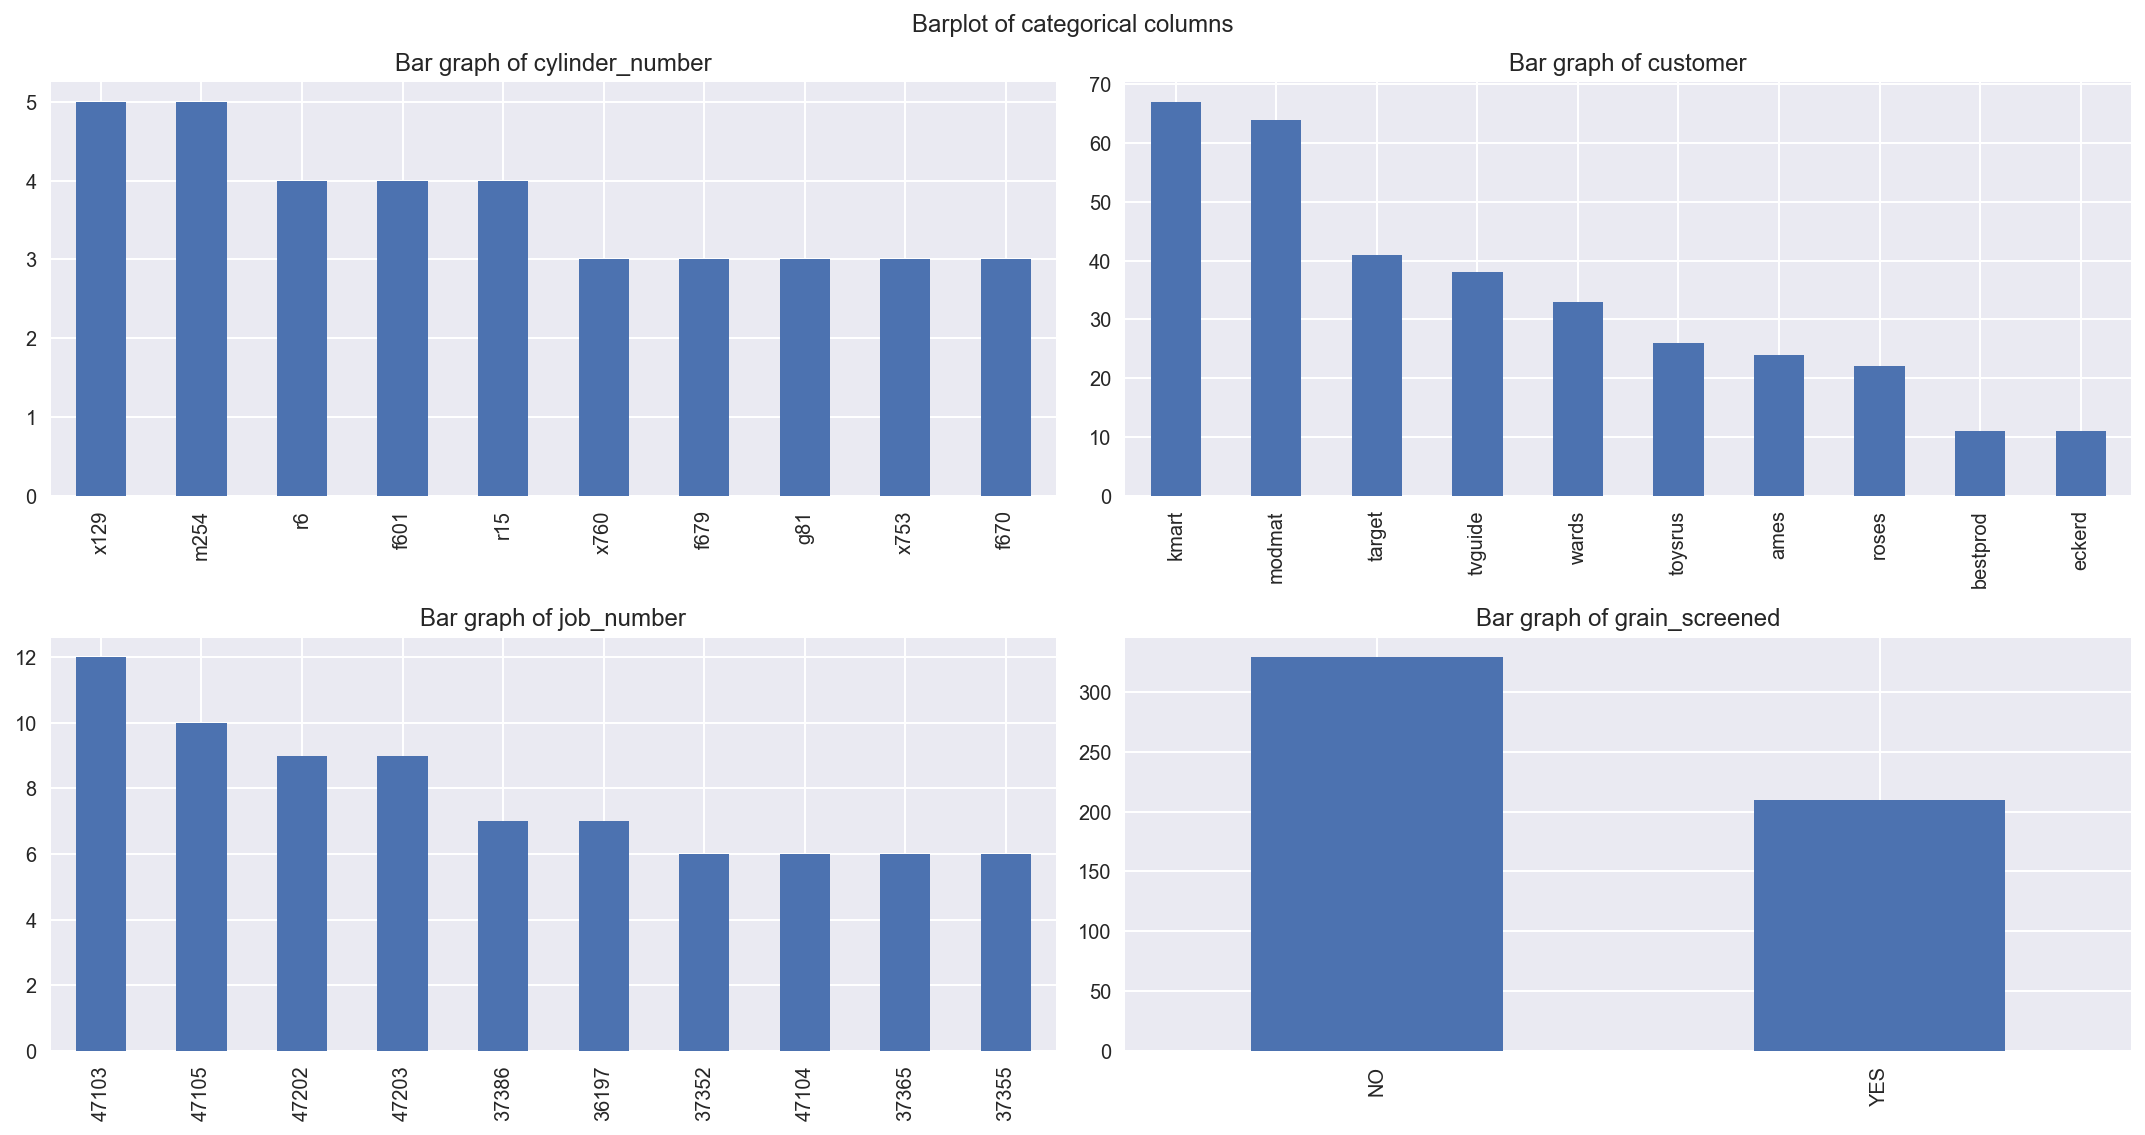

In [53]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Barplot of categorical columns')

for p in range(4):
    r,c = d[p]
    cur = cat[:4][p]
    df[cur].value_counts()[:10].plot(kind='bar', ax=axes[r,c])
    axes[r,c].set_title('Bar graph of '+cur)
fig.set_size_inches(15,8)
#plt.title('Figure 1')
fig.tight_layout()

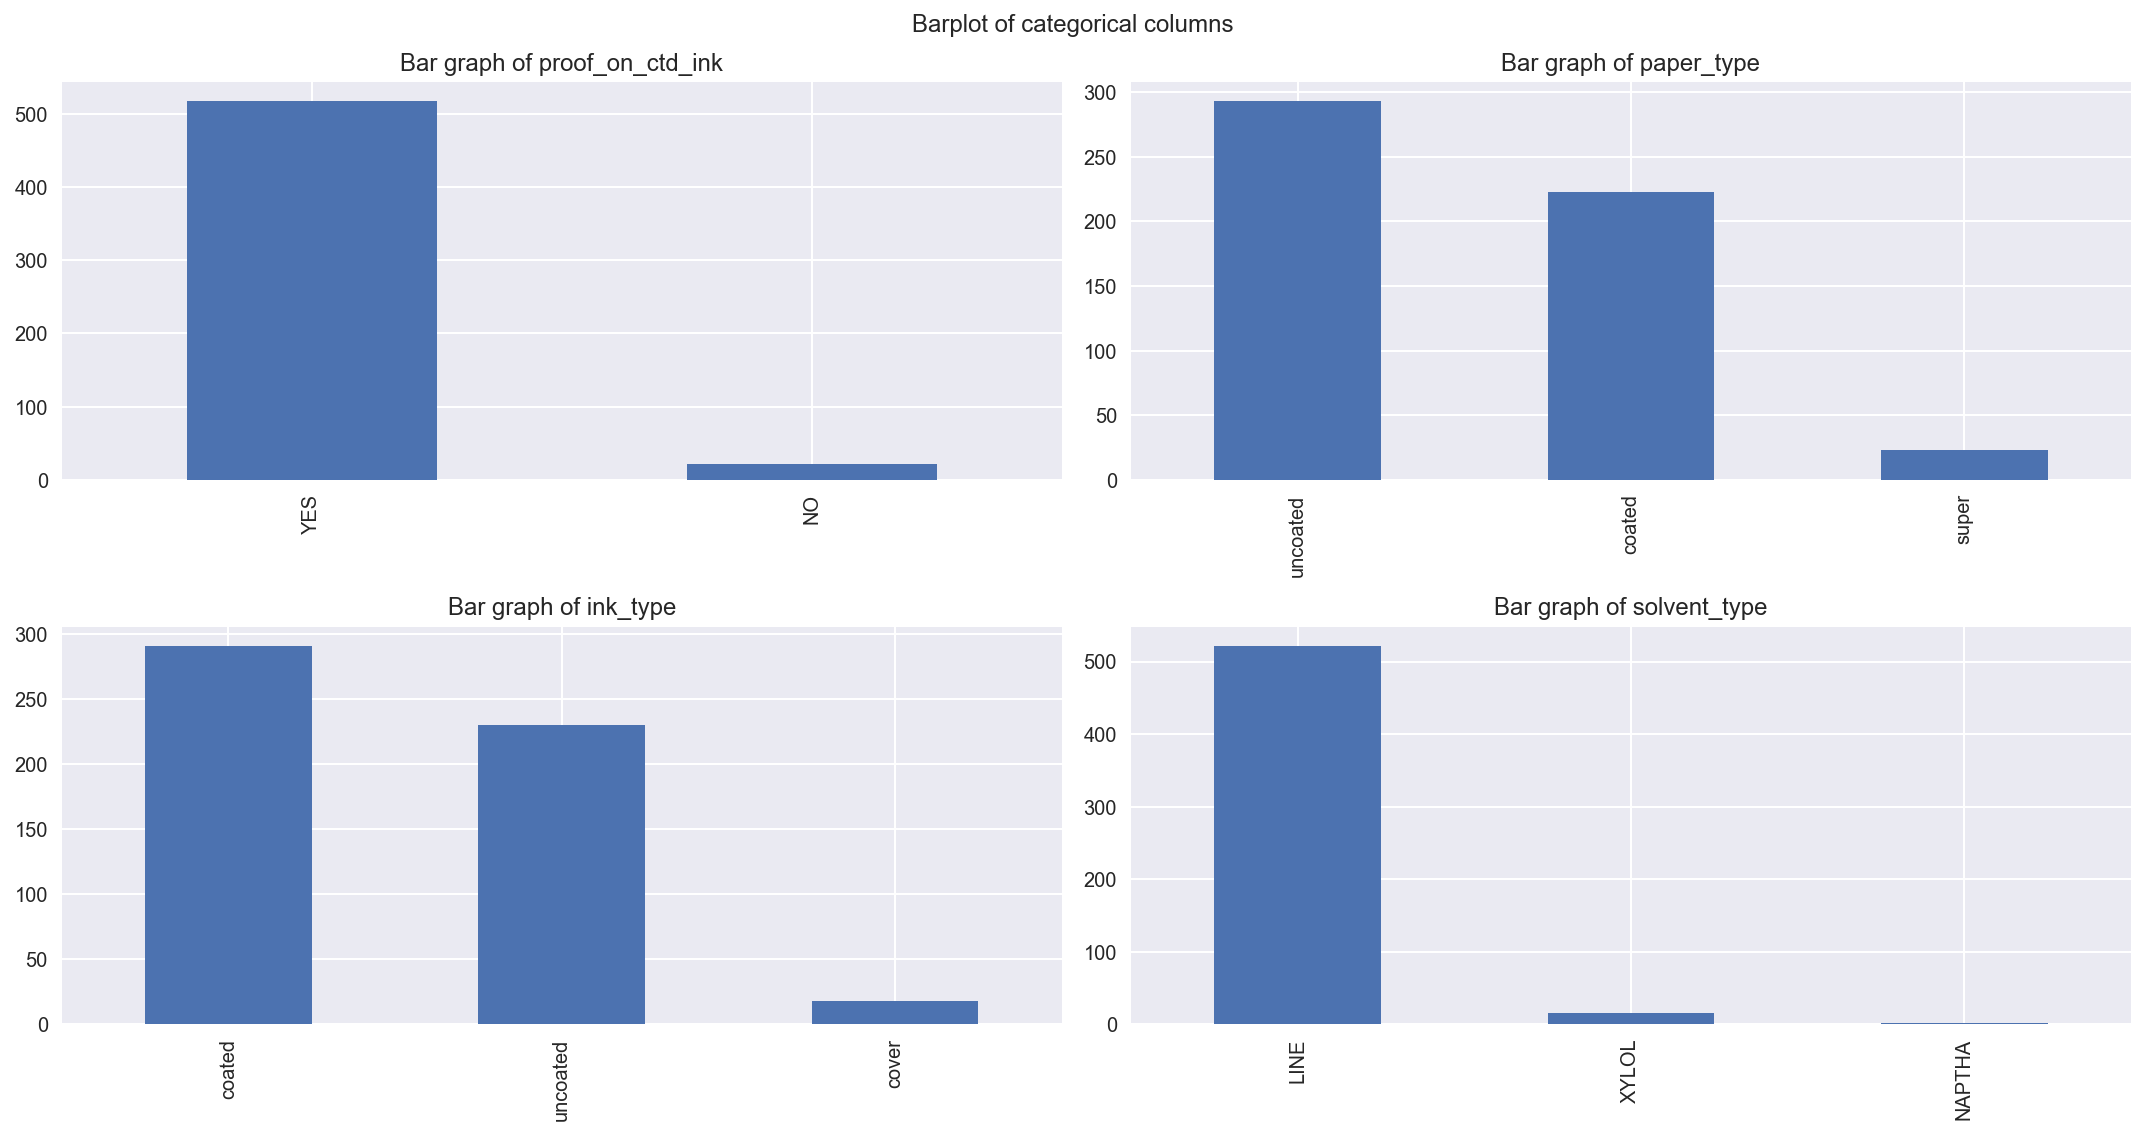

In [54]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Barplot of categorical columns')
for p in range(4):
    r,c = d[p]
    cur = cat[4:8][p]
    df[cur].value_counts()[:10].plot(kind='bar', ax=axes[r,c])
    axes[r,c].set_title('Bar graph of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- We can observe a high class imbalance in features such as solvent_type and proof_on_ctd_ink.

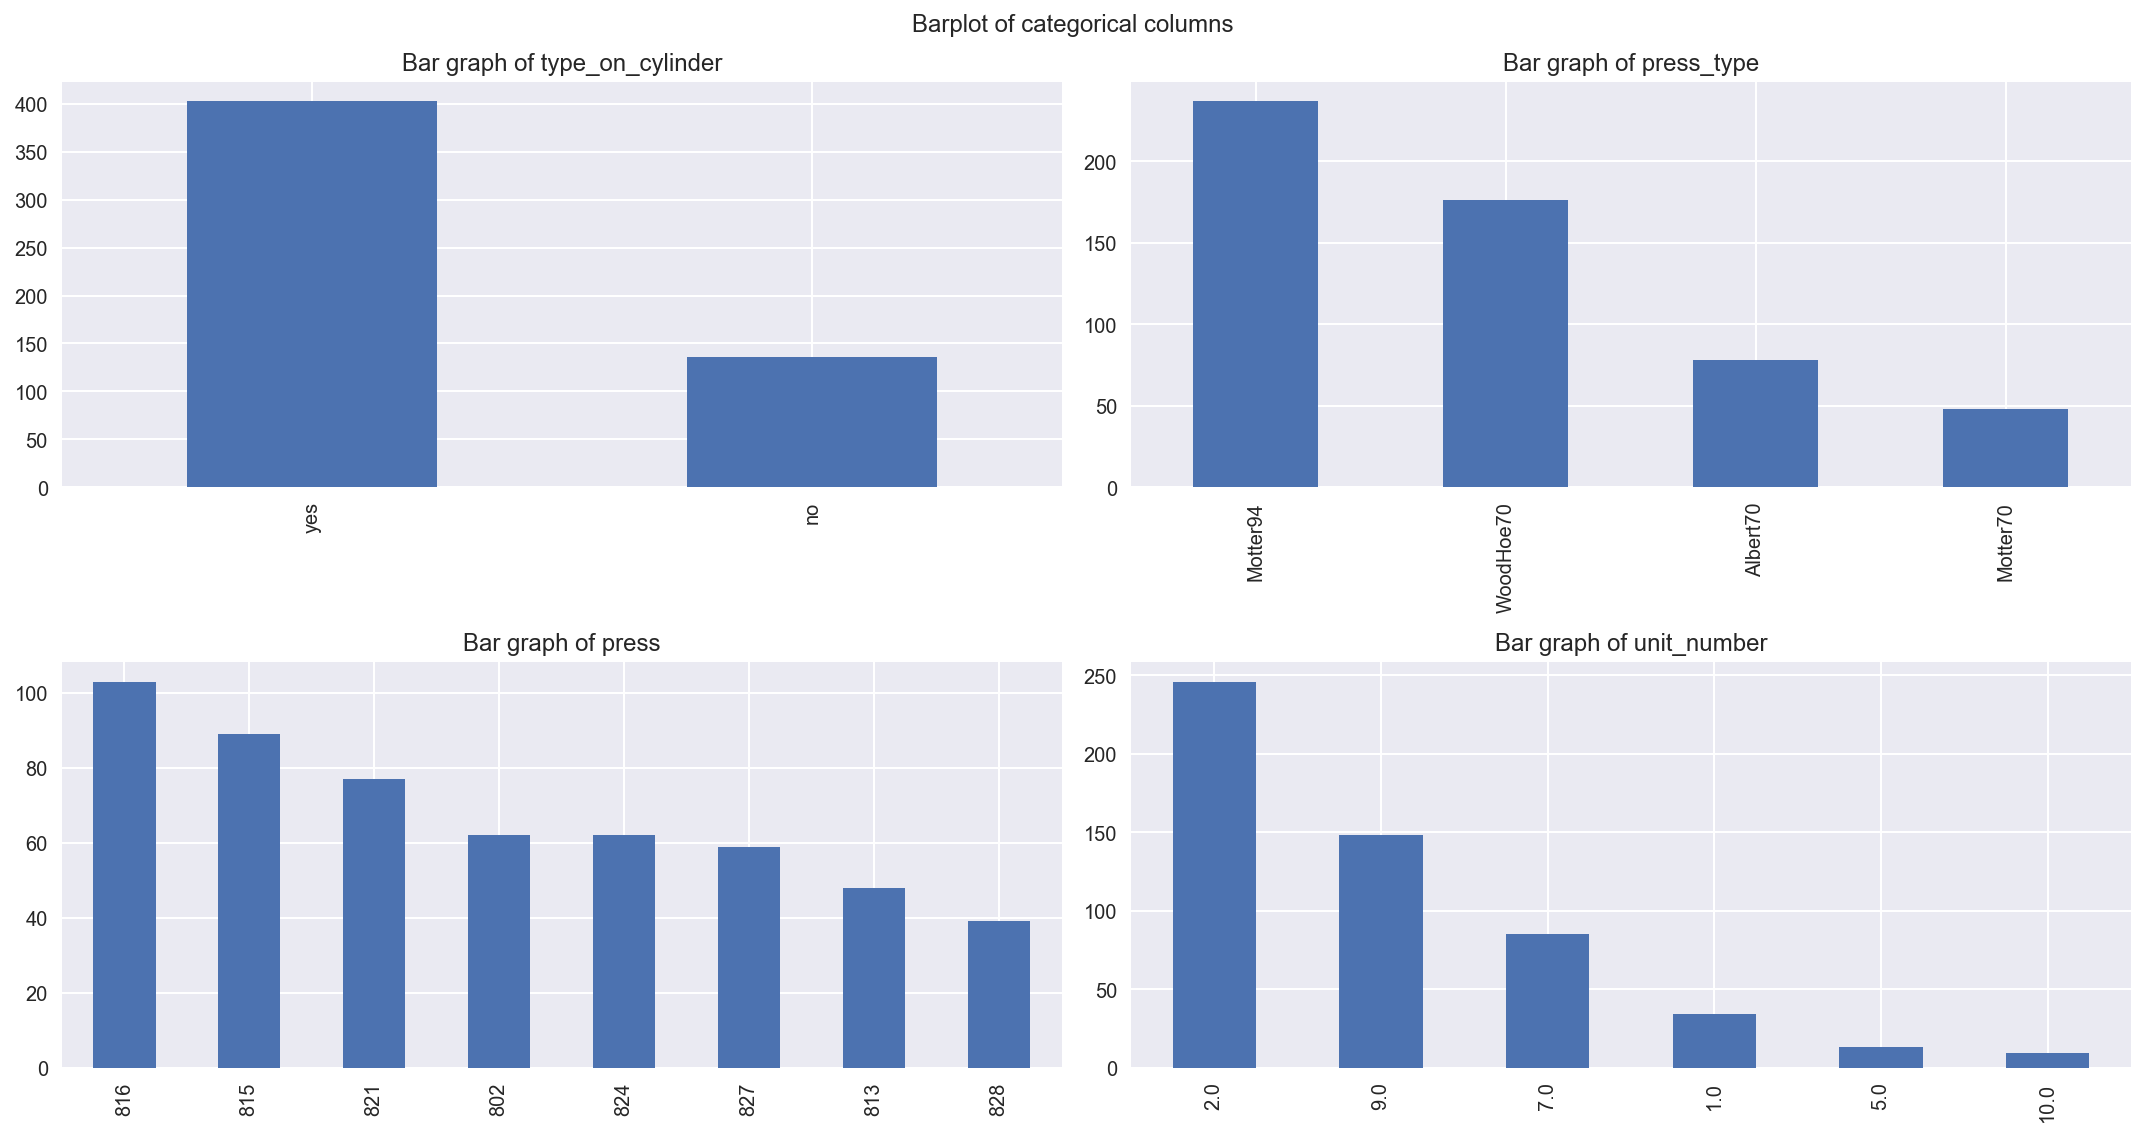

In [55]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Barplot of categorical columns')
for p in range(4):
    r,c = d[p]
    #print(r,c)
    cur = cat[8:12][p]
    df[cur].value_counts()[:10].plot(kind='bar', ax=axes[r,c])
    axes[r,c].set_title('Bar graph of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

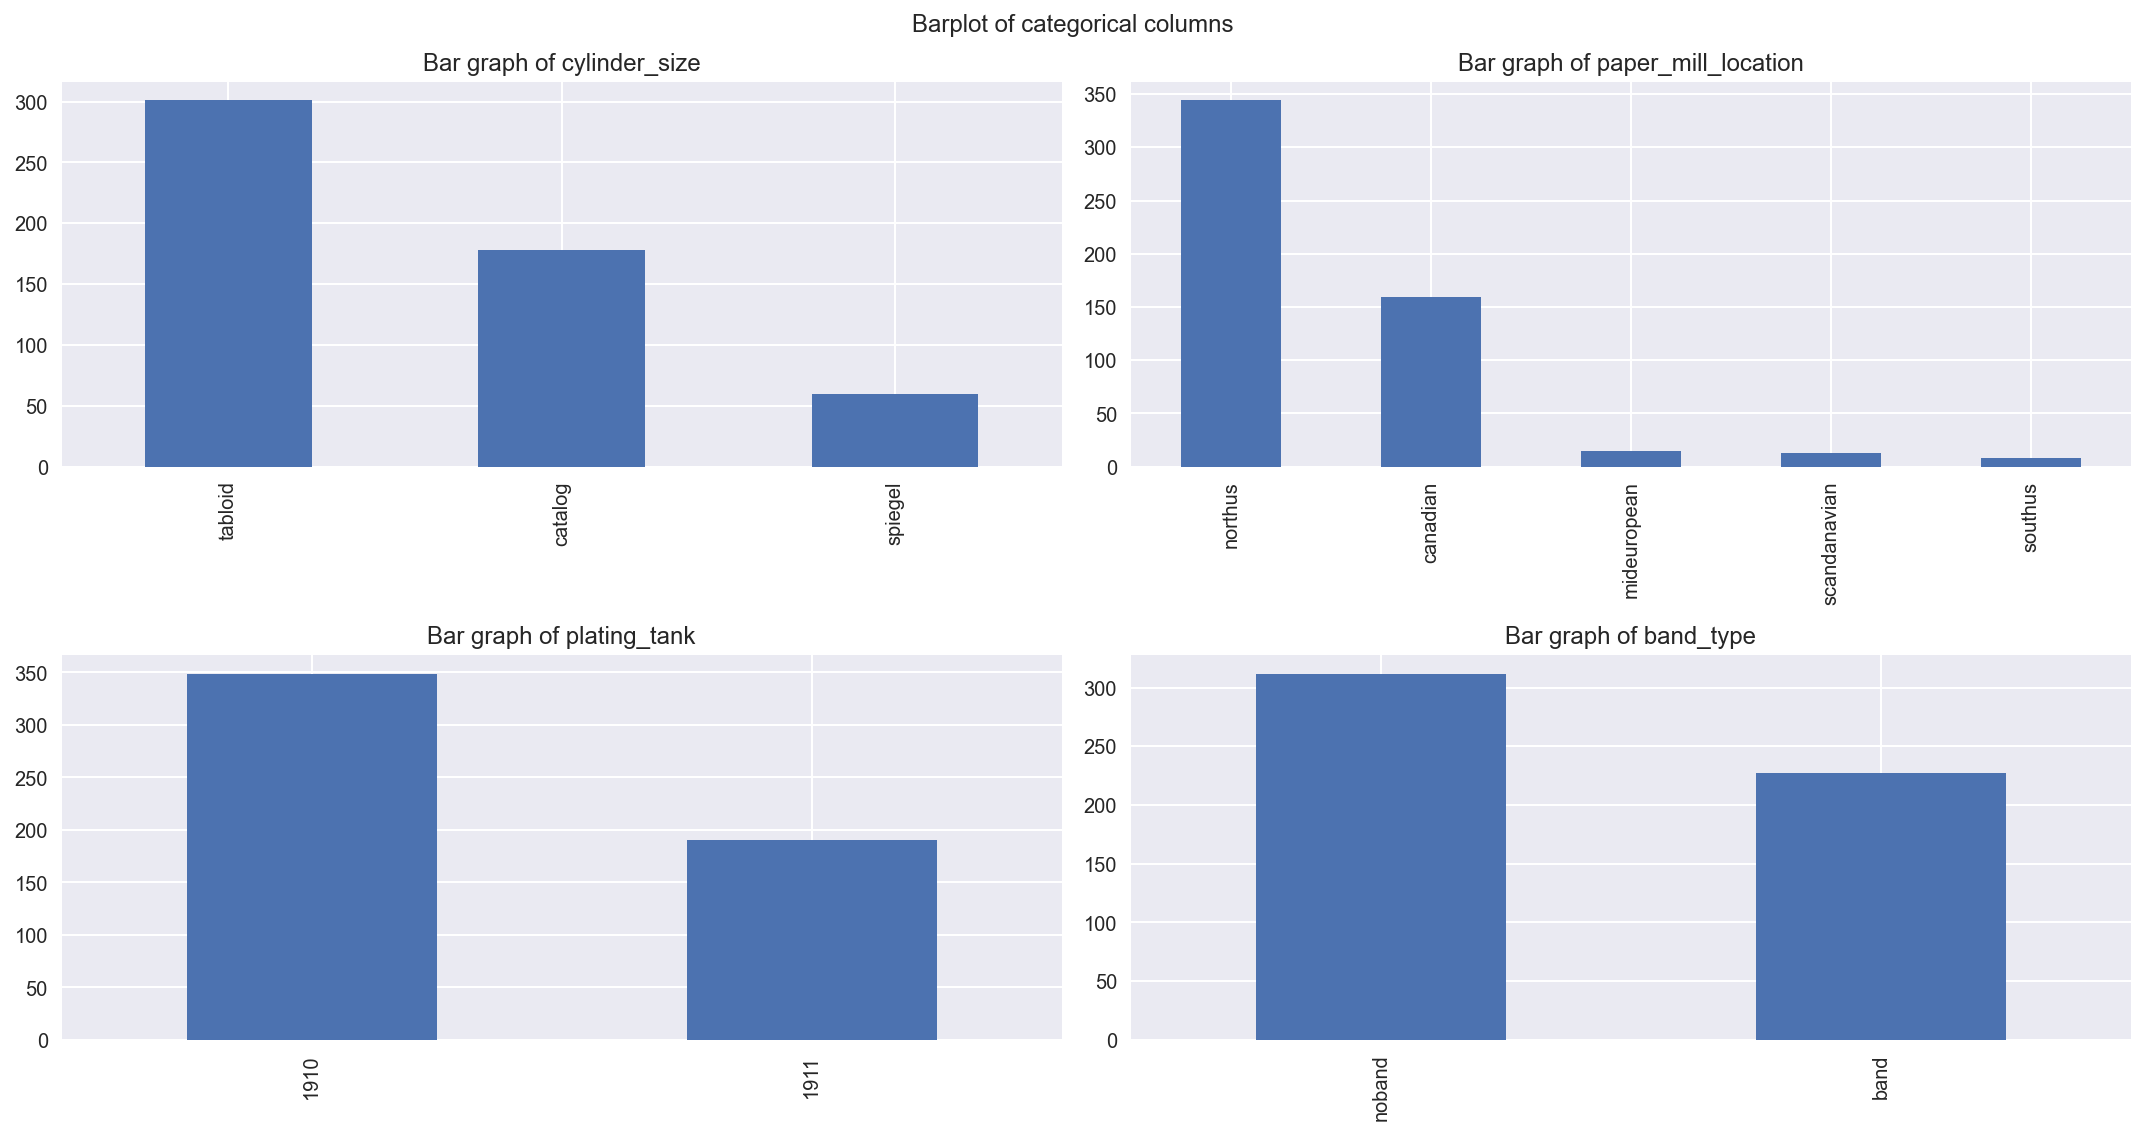

In [56]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Barplot of categorical columns')
for p in range(4):
    r,c = d[p]
    cur = cat[12:][p]
    df[cur].value_counts()[:10].plot(kind='bar', ax=axes[r,c])
    axes[r,c].set_title('Bar graph of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

#### Histograms of numeric variables: <a id='4.1.2'></a>

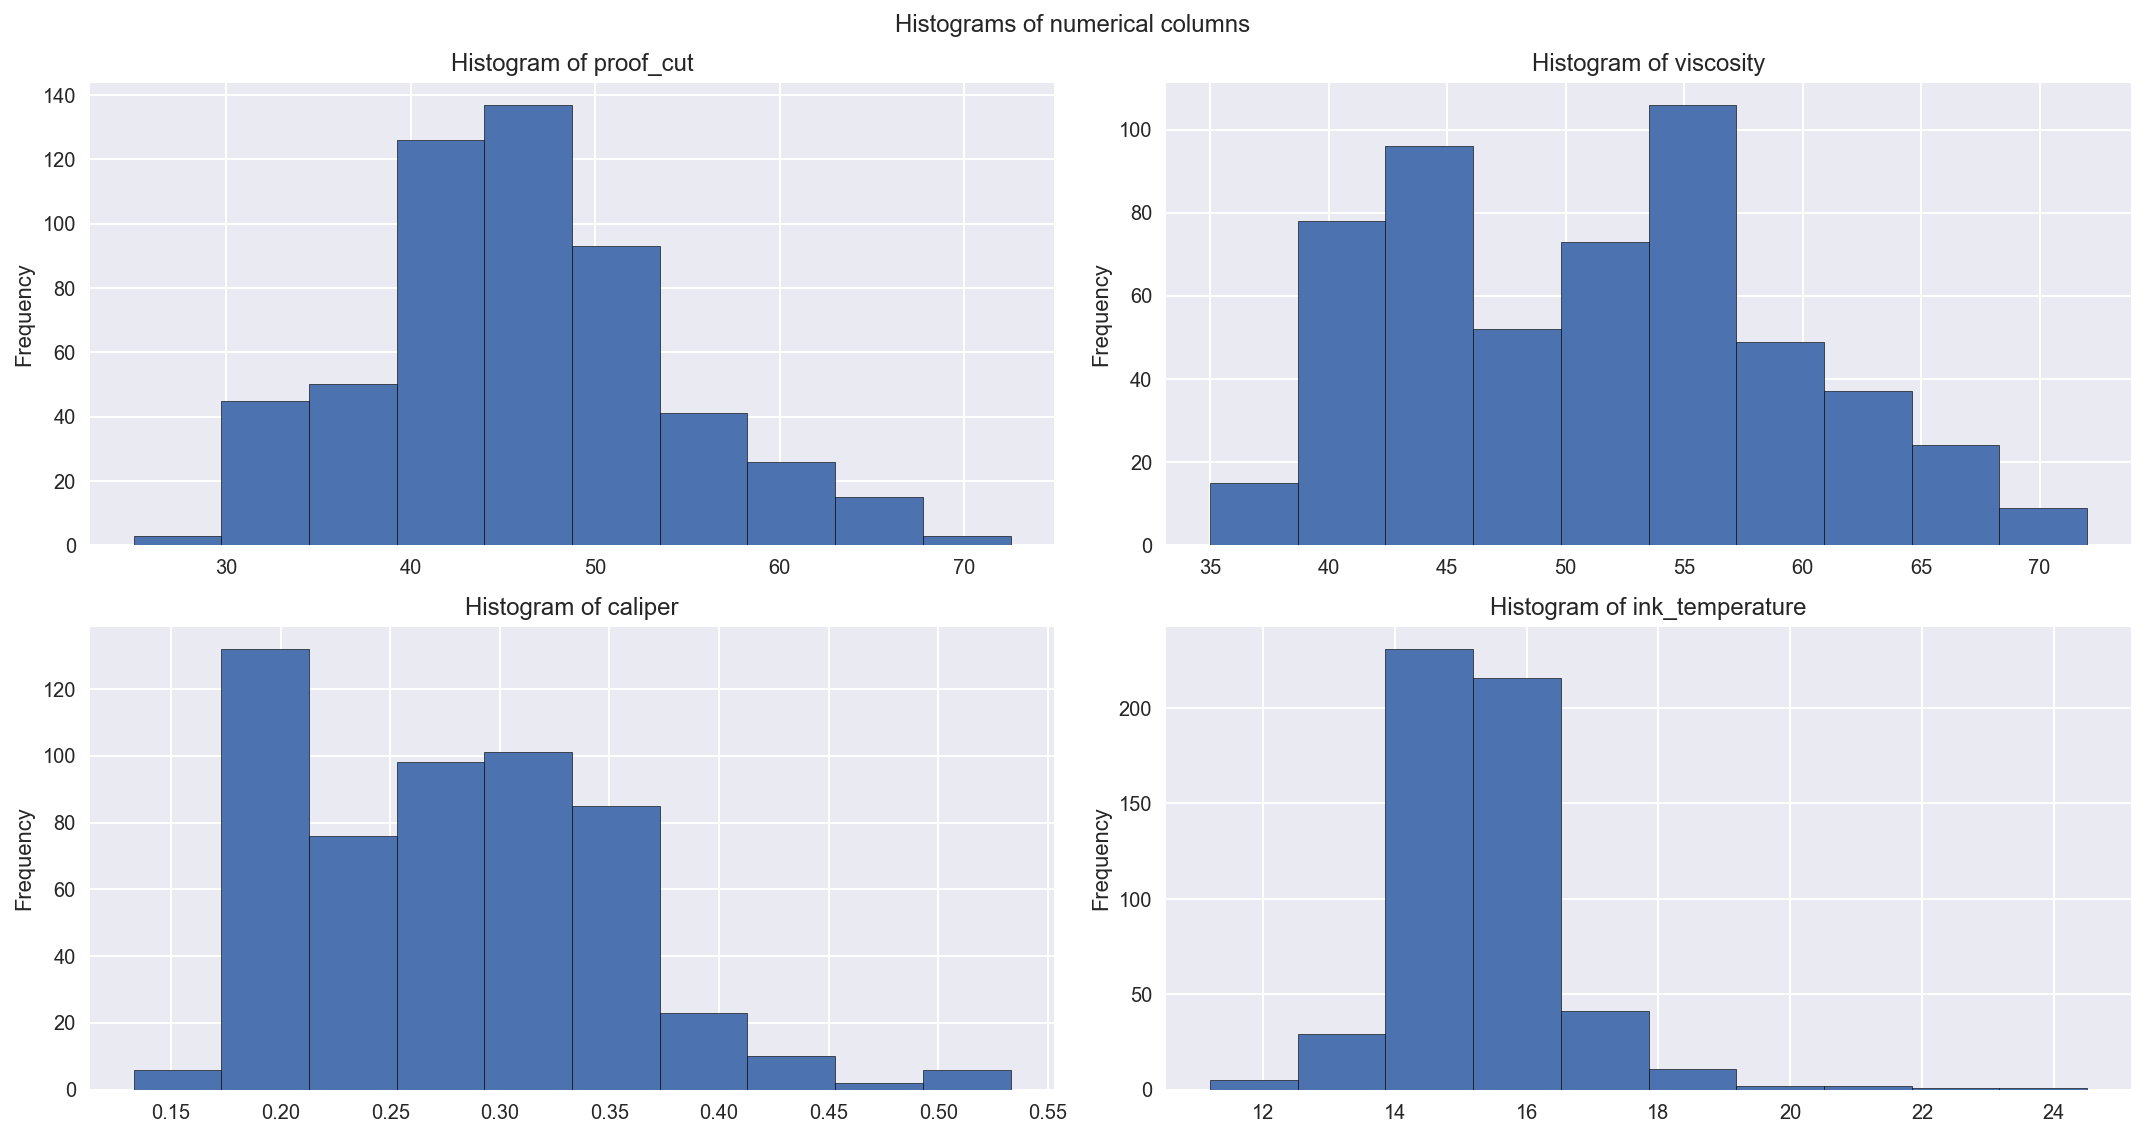

In [57]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Histograms of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[:4][p]
    df[cur].plot(kind='hist',bins=10, ax=axes[r,c], ec='black')
    axes[r,c].set_title('Histogram of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- None of the plots are normally distributed and there seems to be a lot of skew in 'ink_temperature' specifically.

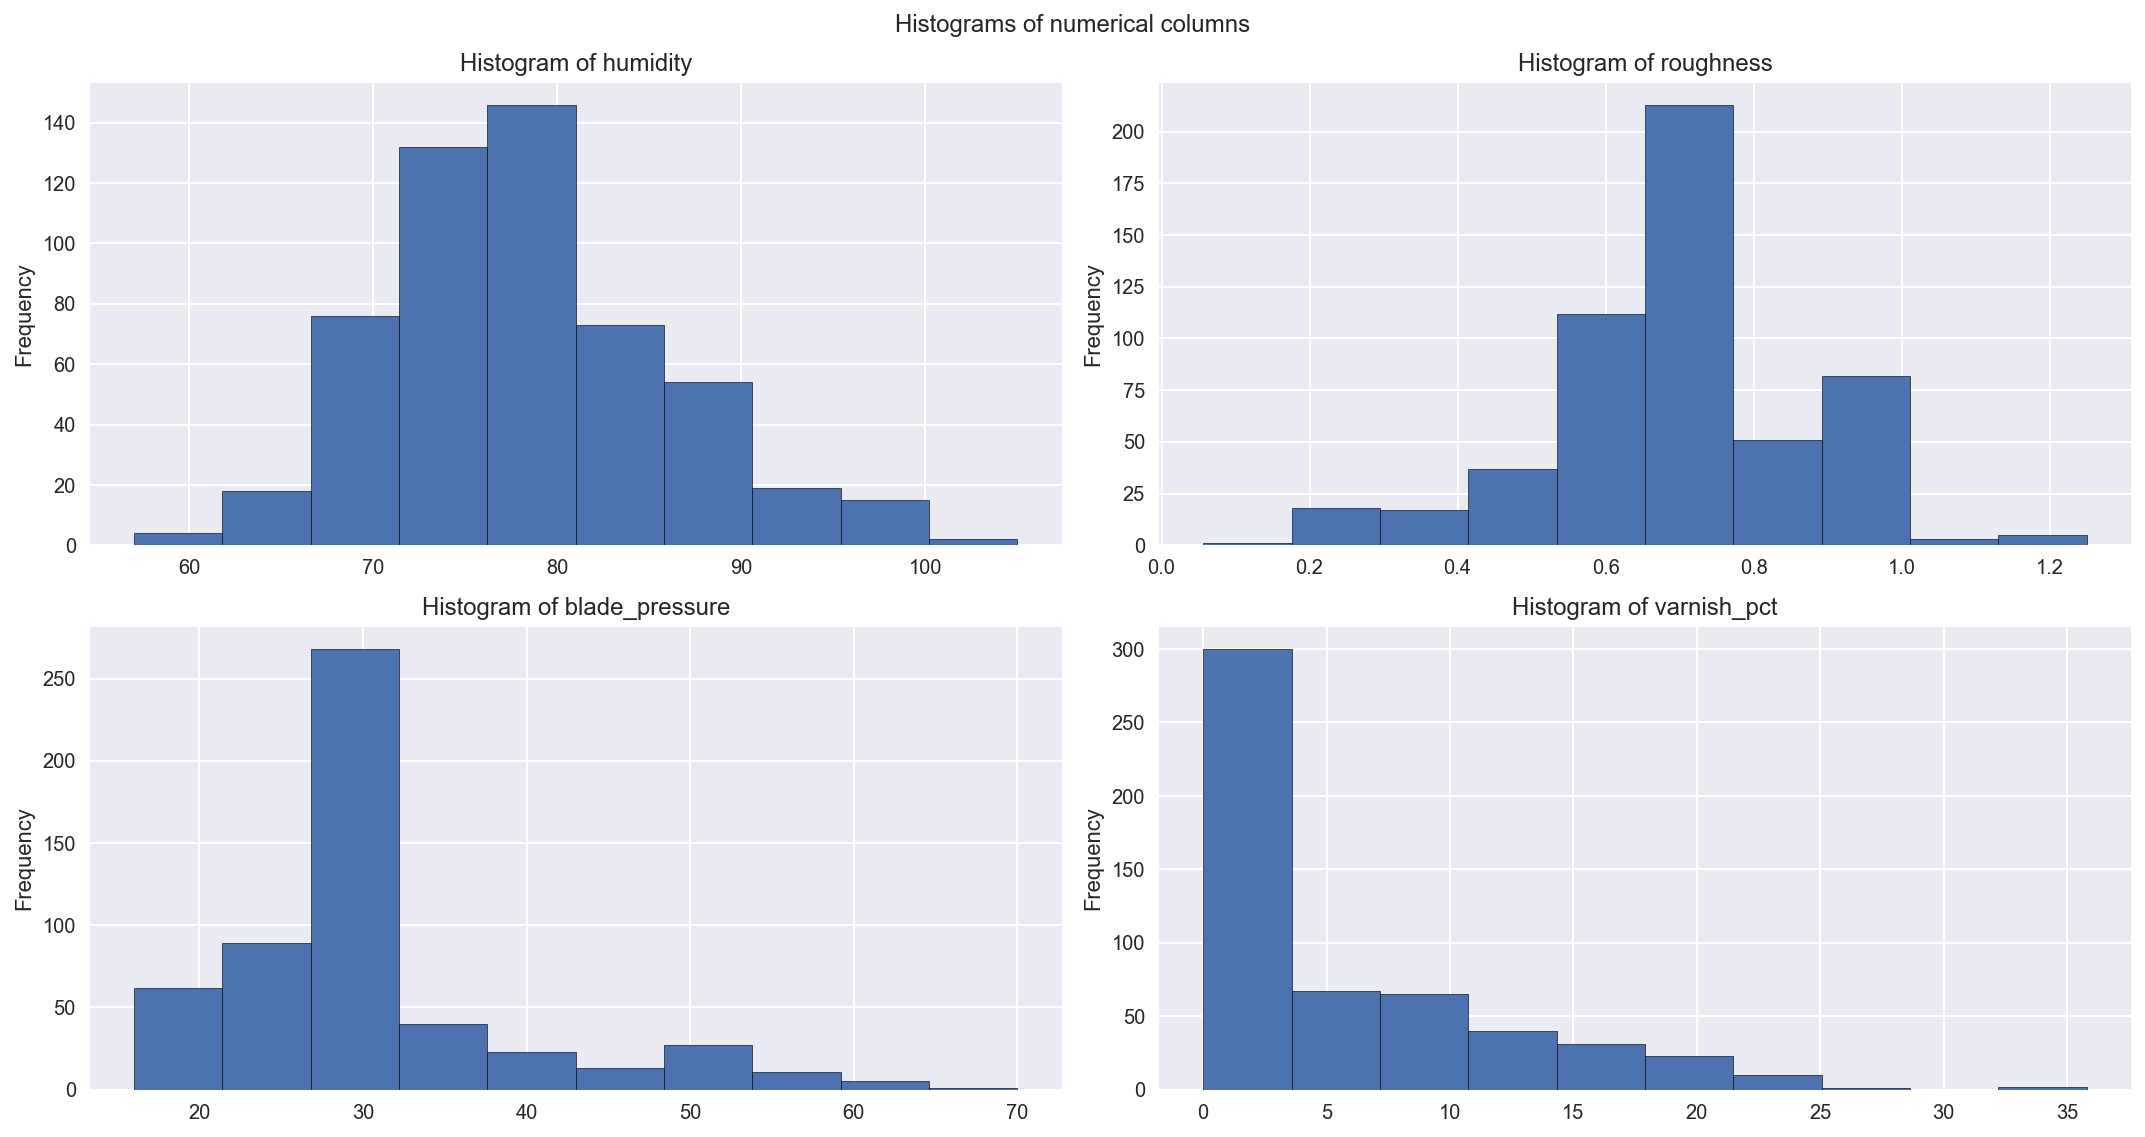

In [58]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Histograms of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[4:8][p]
    df[cur].plot(kind='hist',bins=10, ax=axes[r,c], ec='black')
    axes[r,c].set_title('Histogram of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- None of the plots seem to be normally distributed and there seems to be a high skew in 'blade_pressure' and 'varnish_pct'

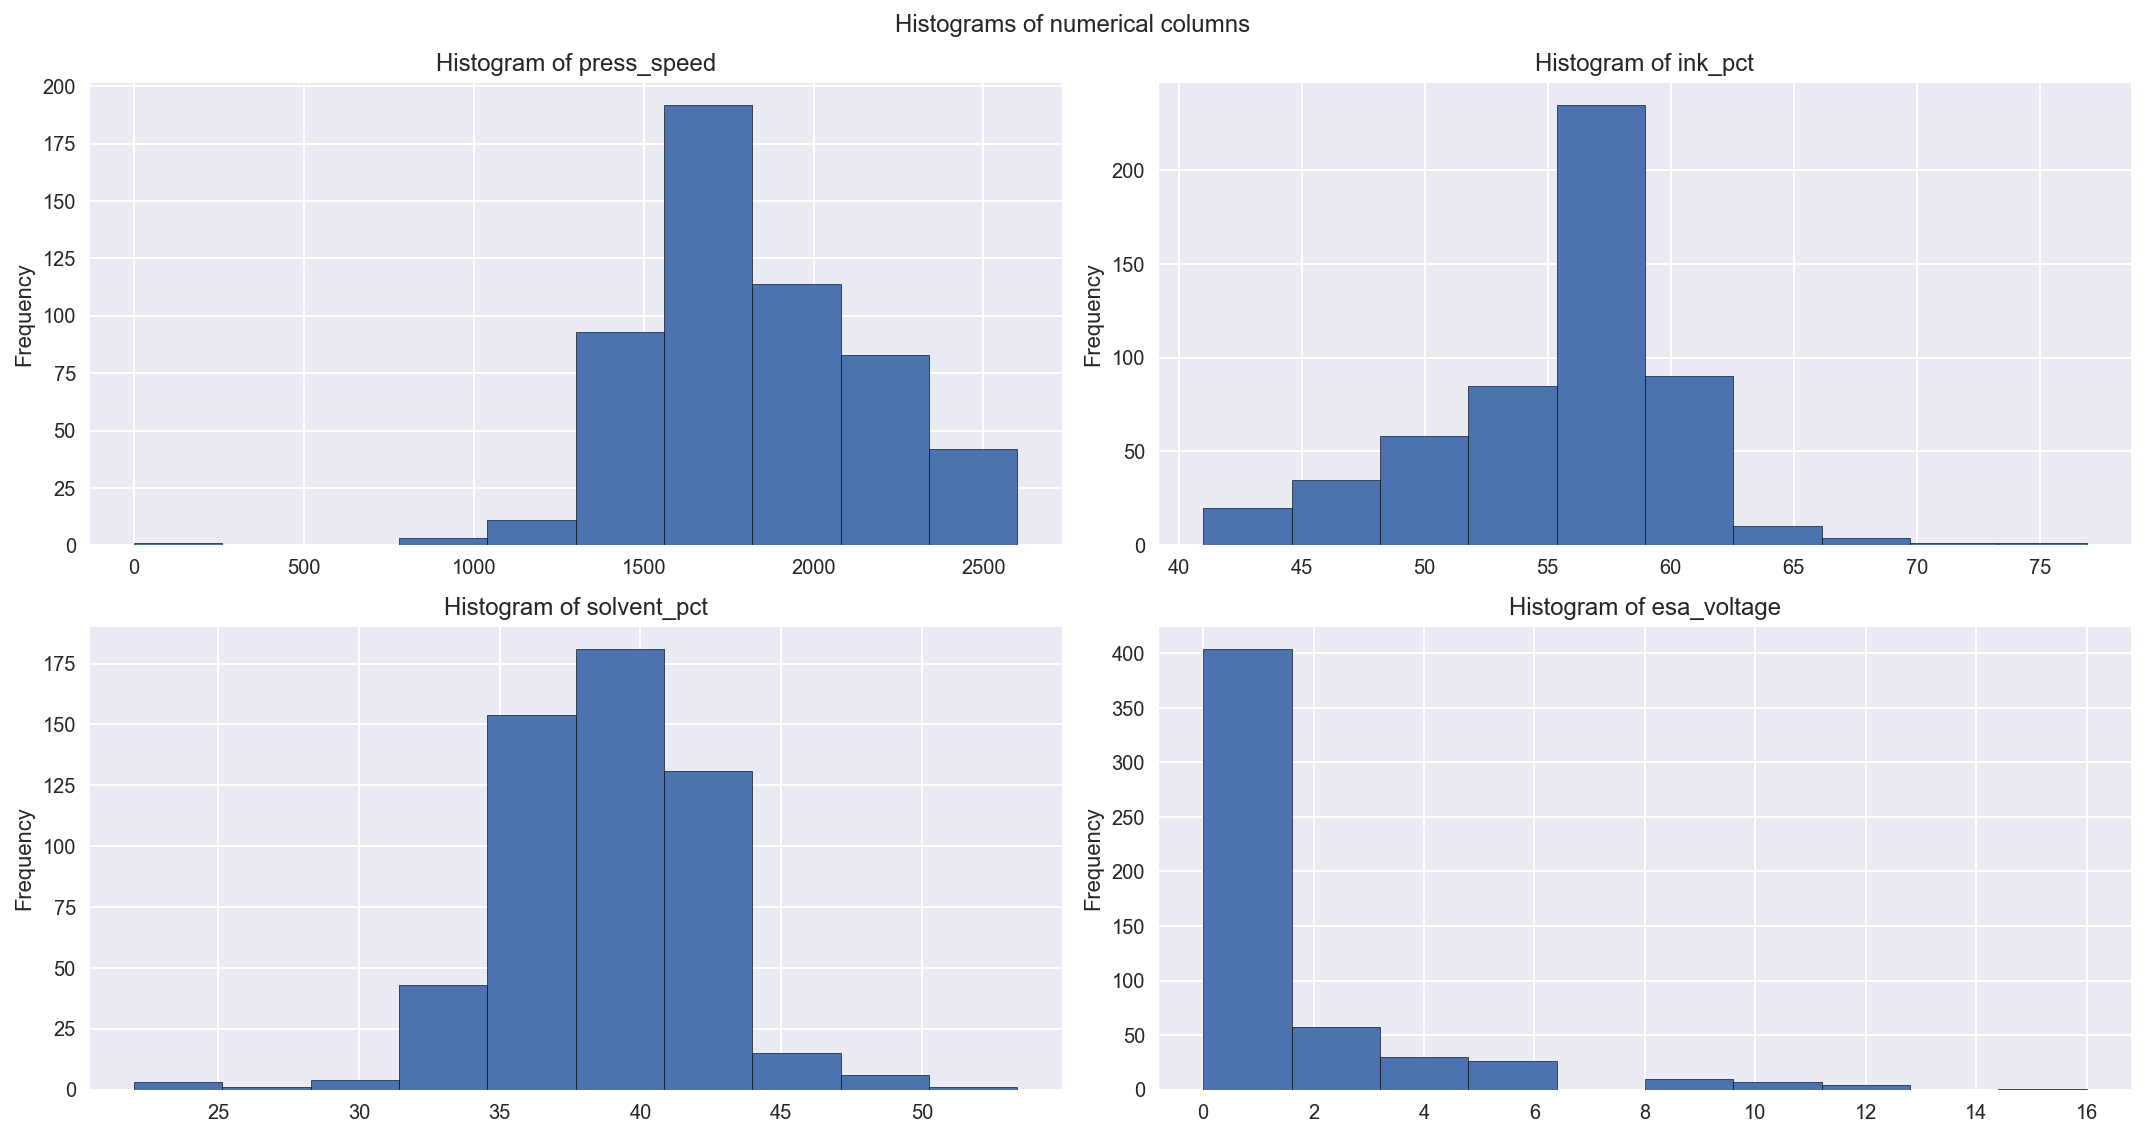

In [59]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Histograms of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[8:12][p]
    df[cur].plot(kind='hist',bins=10, ax=axes[r,c], ec='black')
    axes[r,c].set_title('Histogram of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- None of the plots seem to be normally distributed and there seems to be a high skew in 'press_speed' and 'esa_voltage'

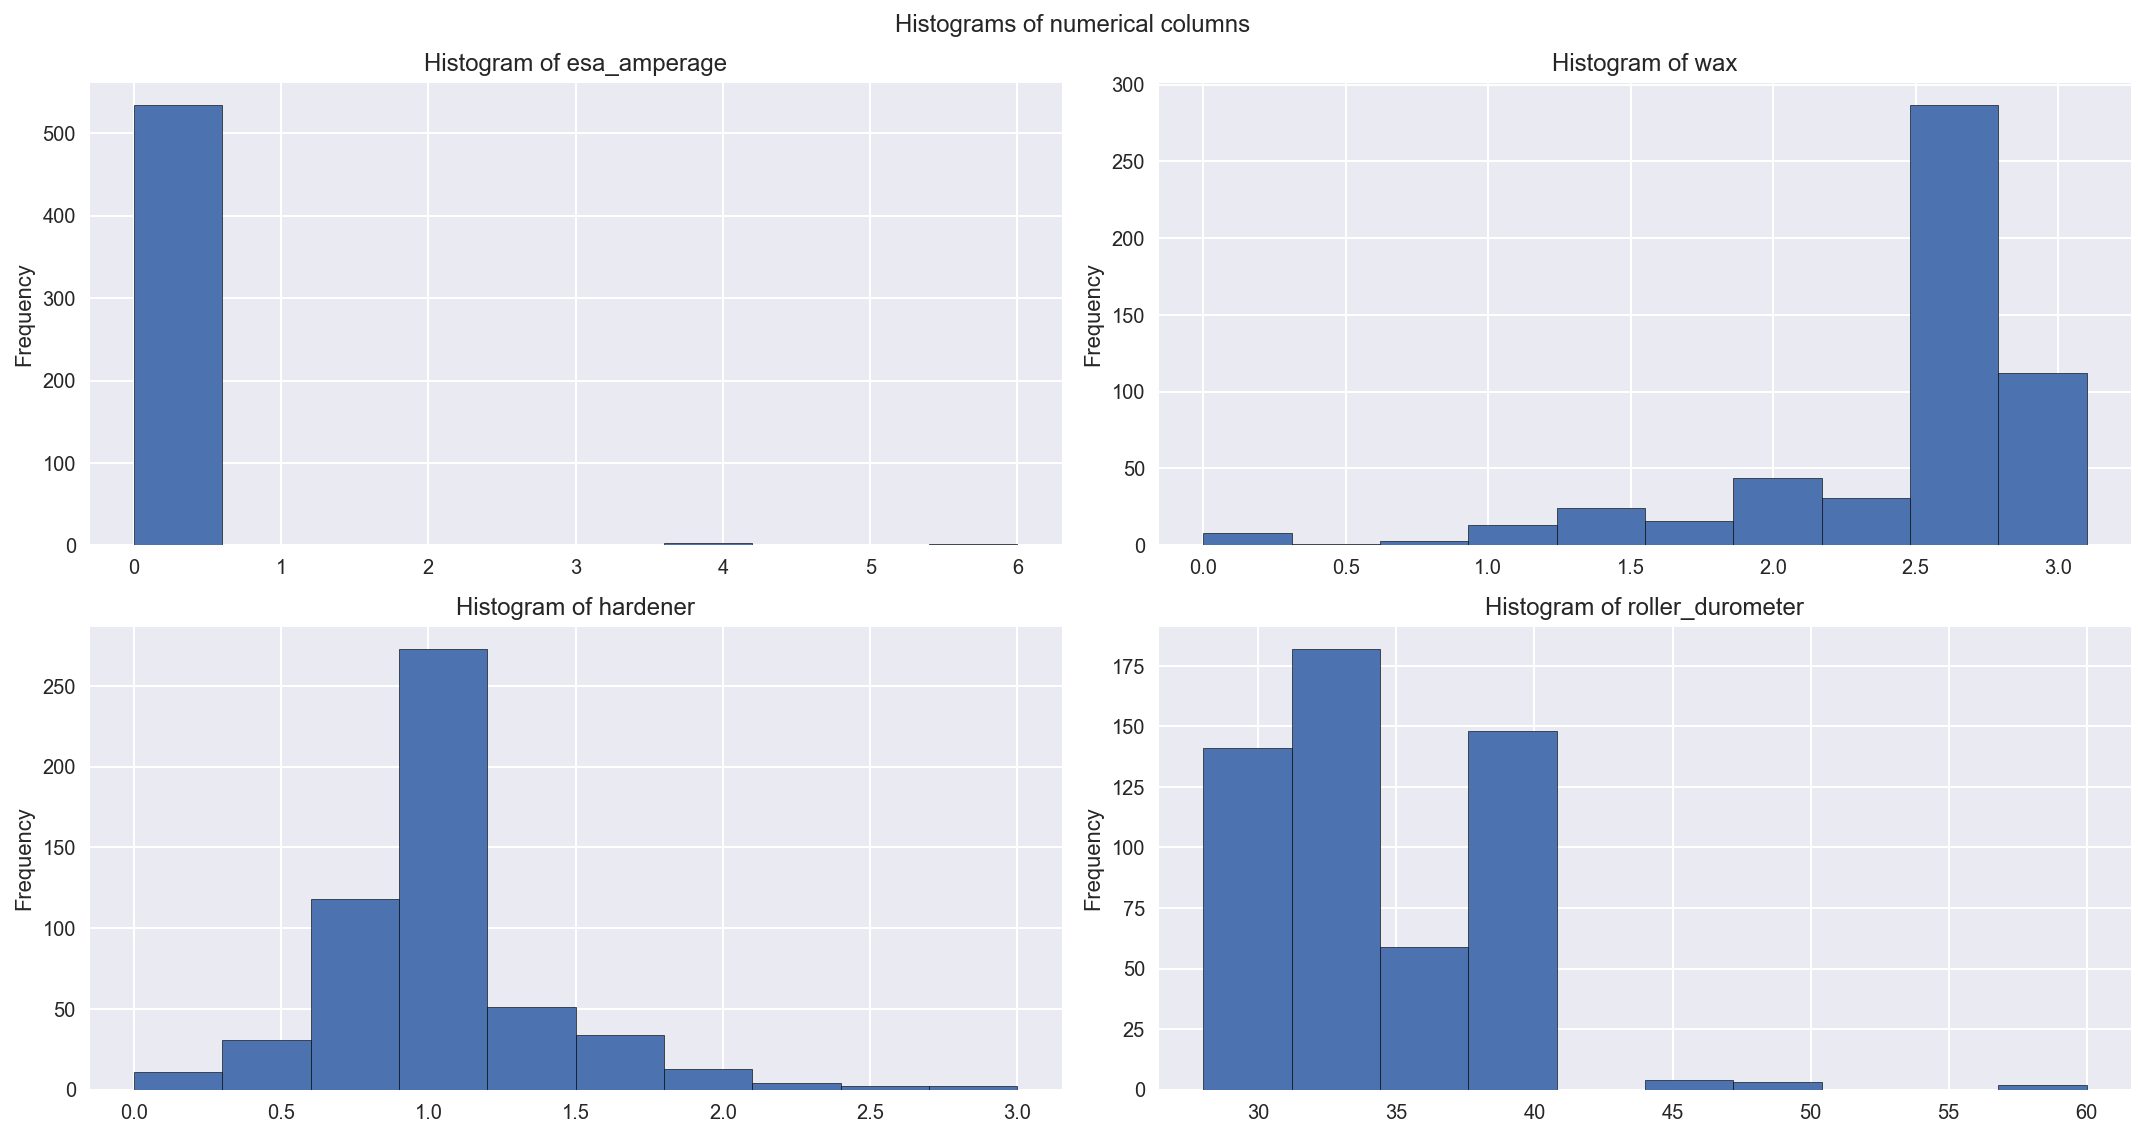

In [60]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Histograms of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[12:16][p]
    df[cur].plot(kind='hist',bins=10, ax=axes[r,c], ec='black')
    axes[r,c].set_title('Histogram of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- None of the plots seem to be normally distributed and there seems to be a high skew in all the variables above.

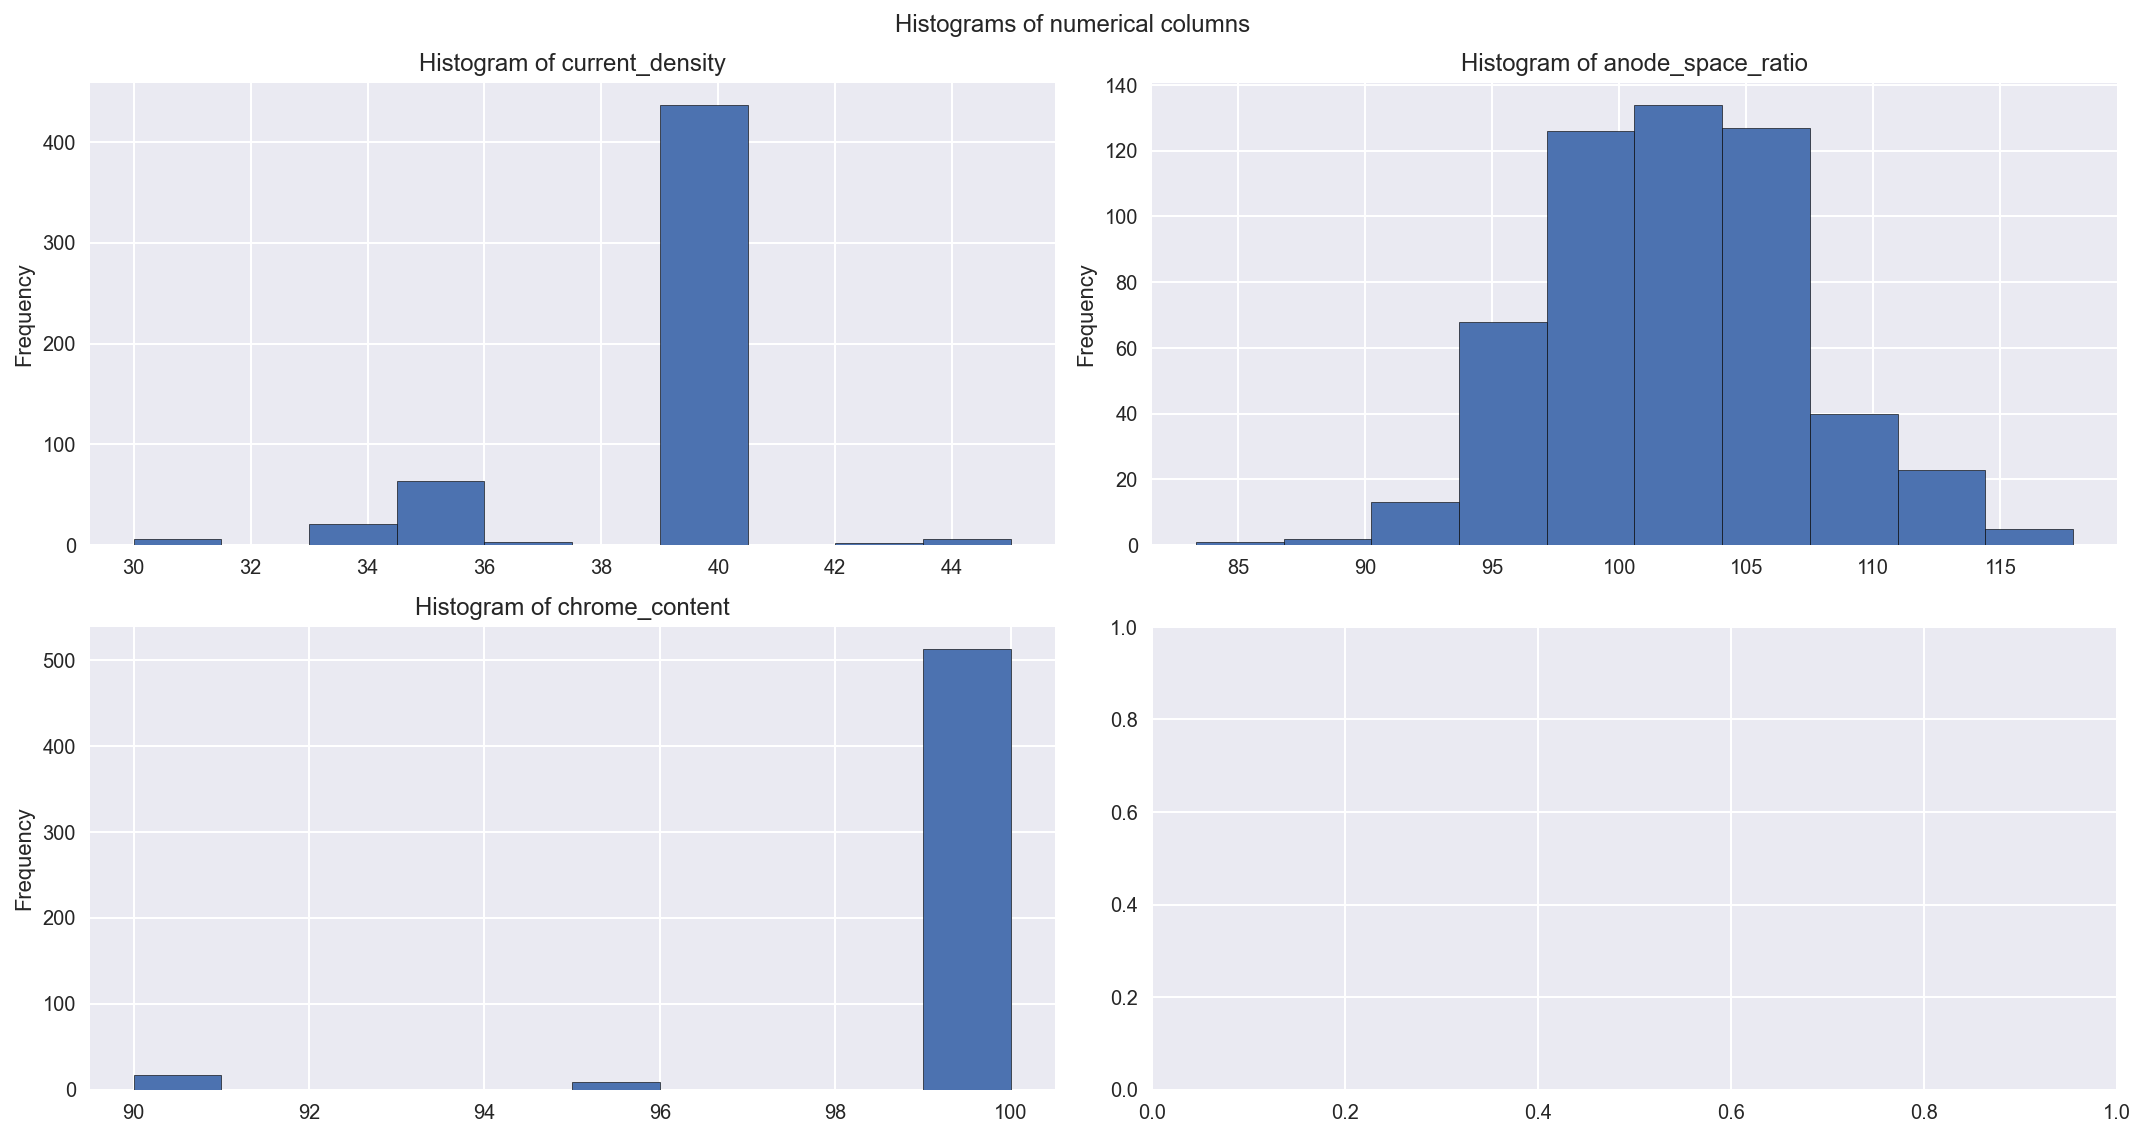

In [61]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Histograms of numerical columns')
for p in range(4):
    if p==3:
        break
    r,c = d[p]
    cur = num[16:19][p]
    df[cur].plot(kind='hist',bins=10, ax=axes[r,c], ec='black')
    axes[r,c].set_title('Histogram of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

#### Boxplots of numeric variables: <a id='4.1.3'></a>

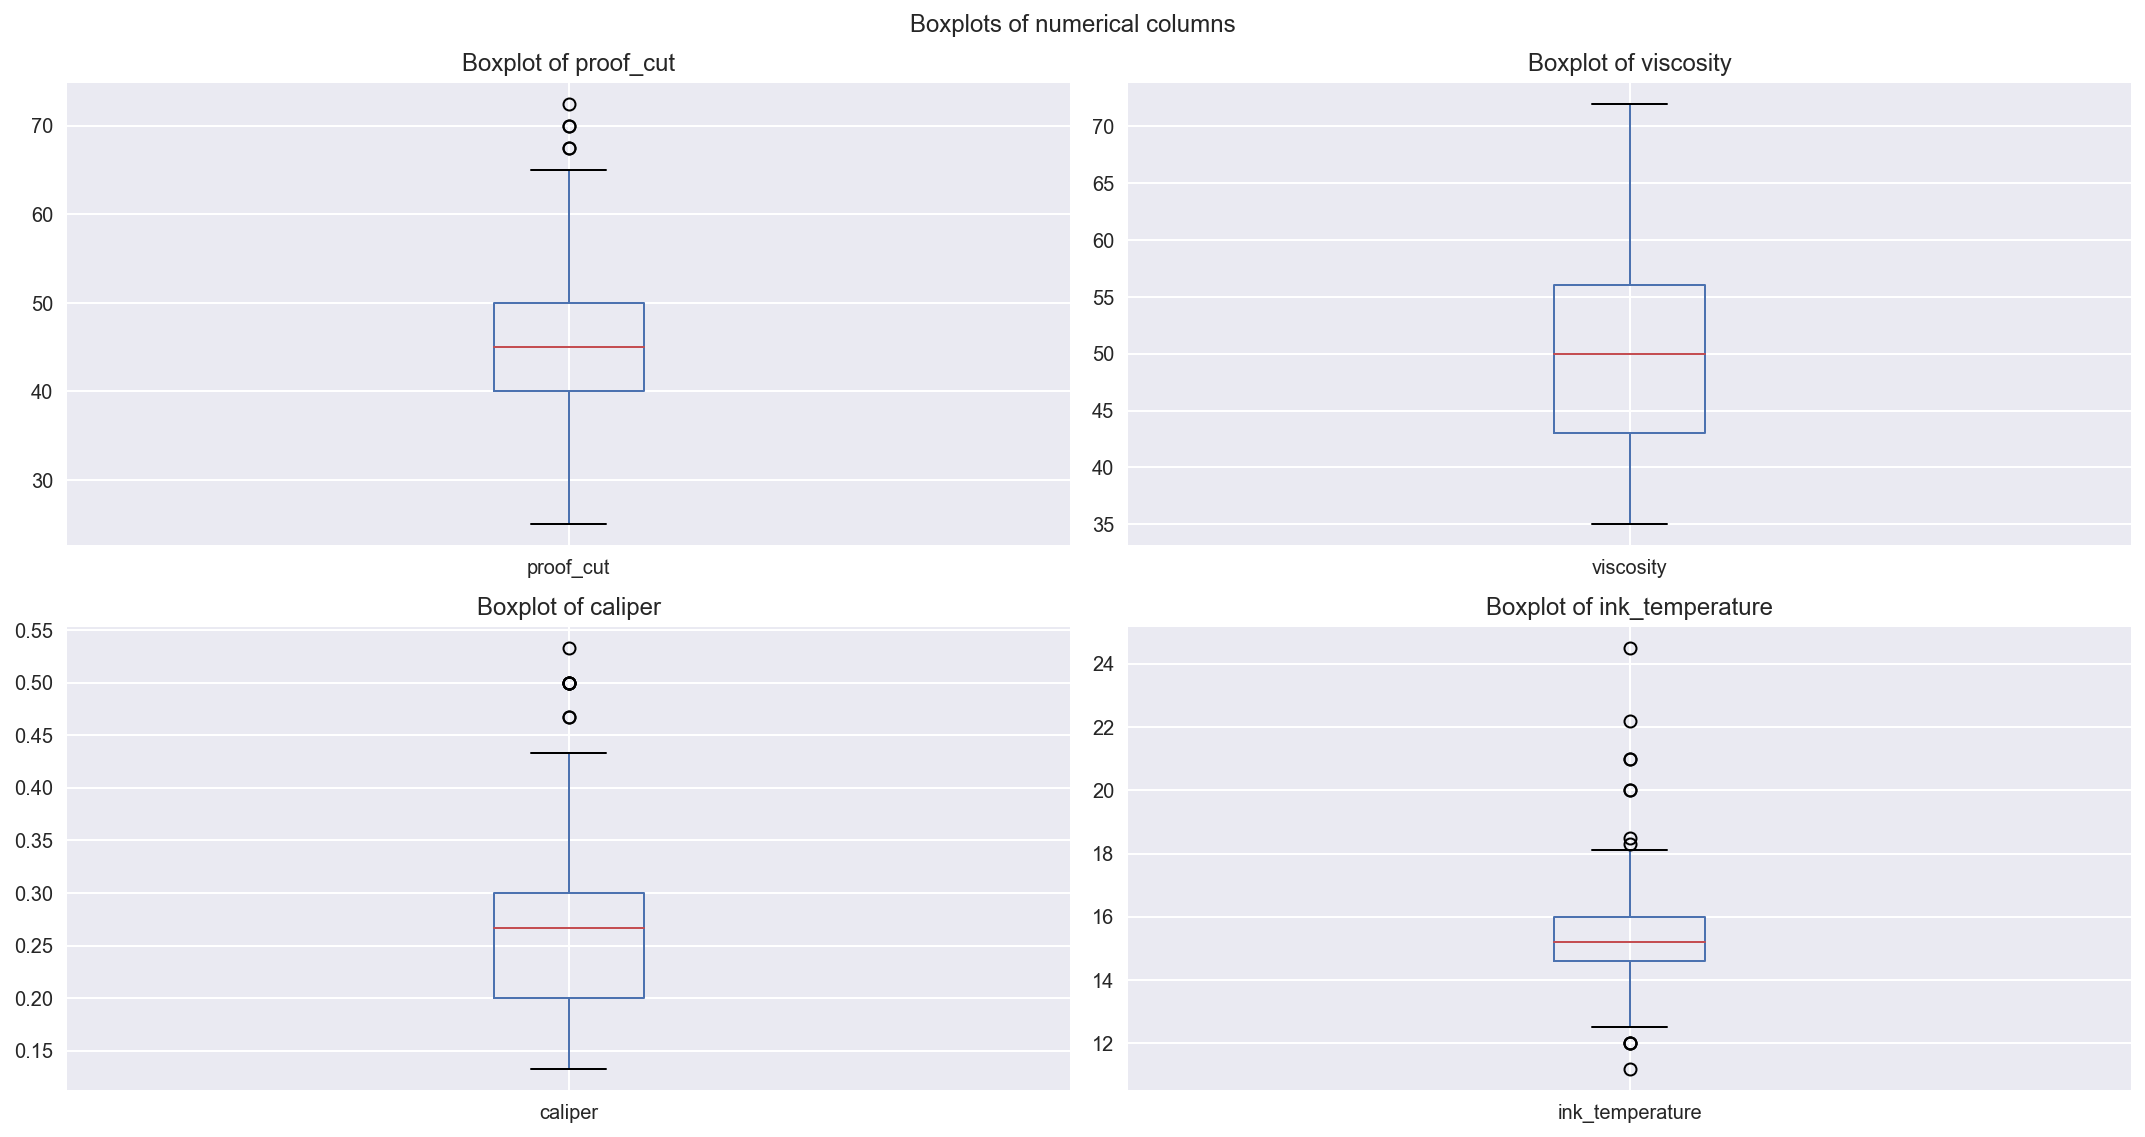

In [62]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[:4][p]
    df[cur].plot(kind='box', ax=axes[r,c])
    axes[r,c].set_title('Boxplot of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- We can see the presence of outliers in 'proof_cut', 'caliper' and 'ink_temperature'.

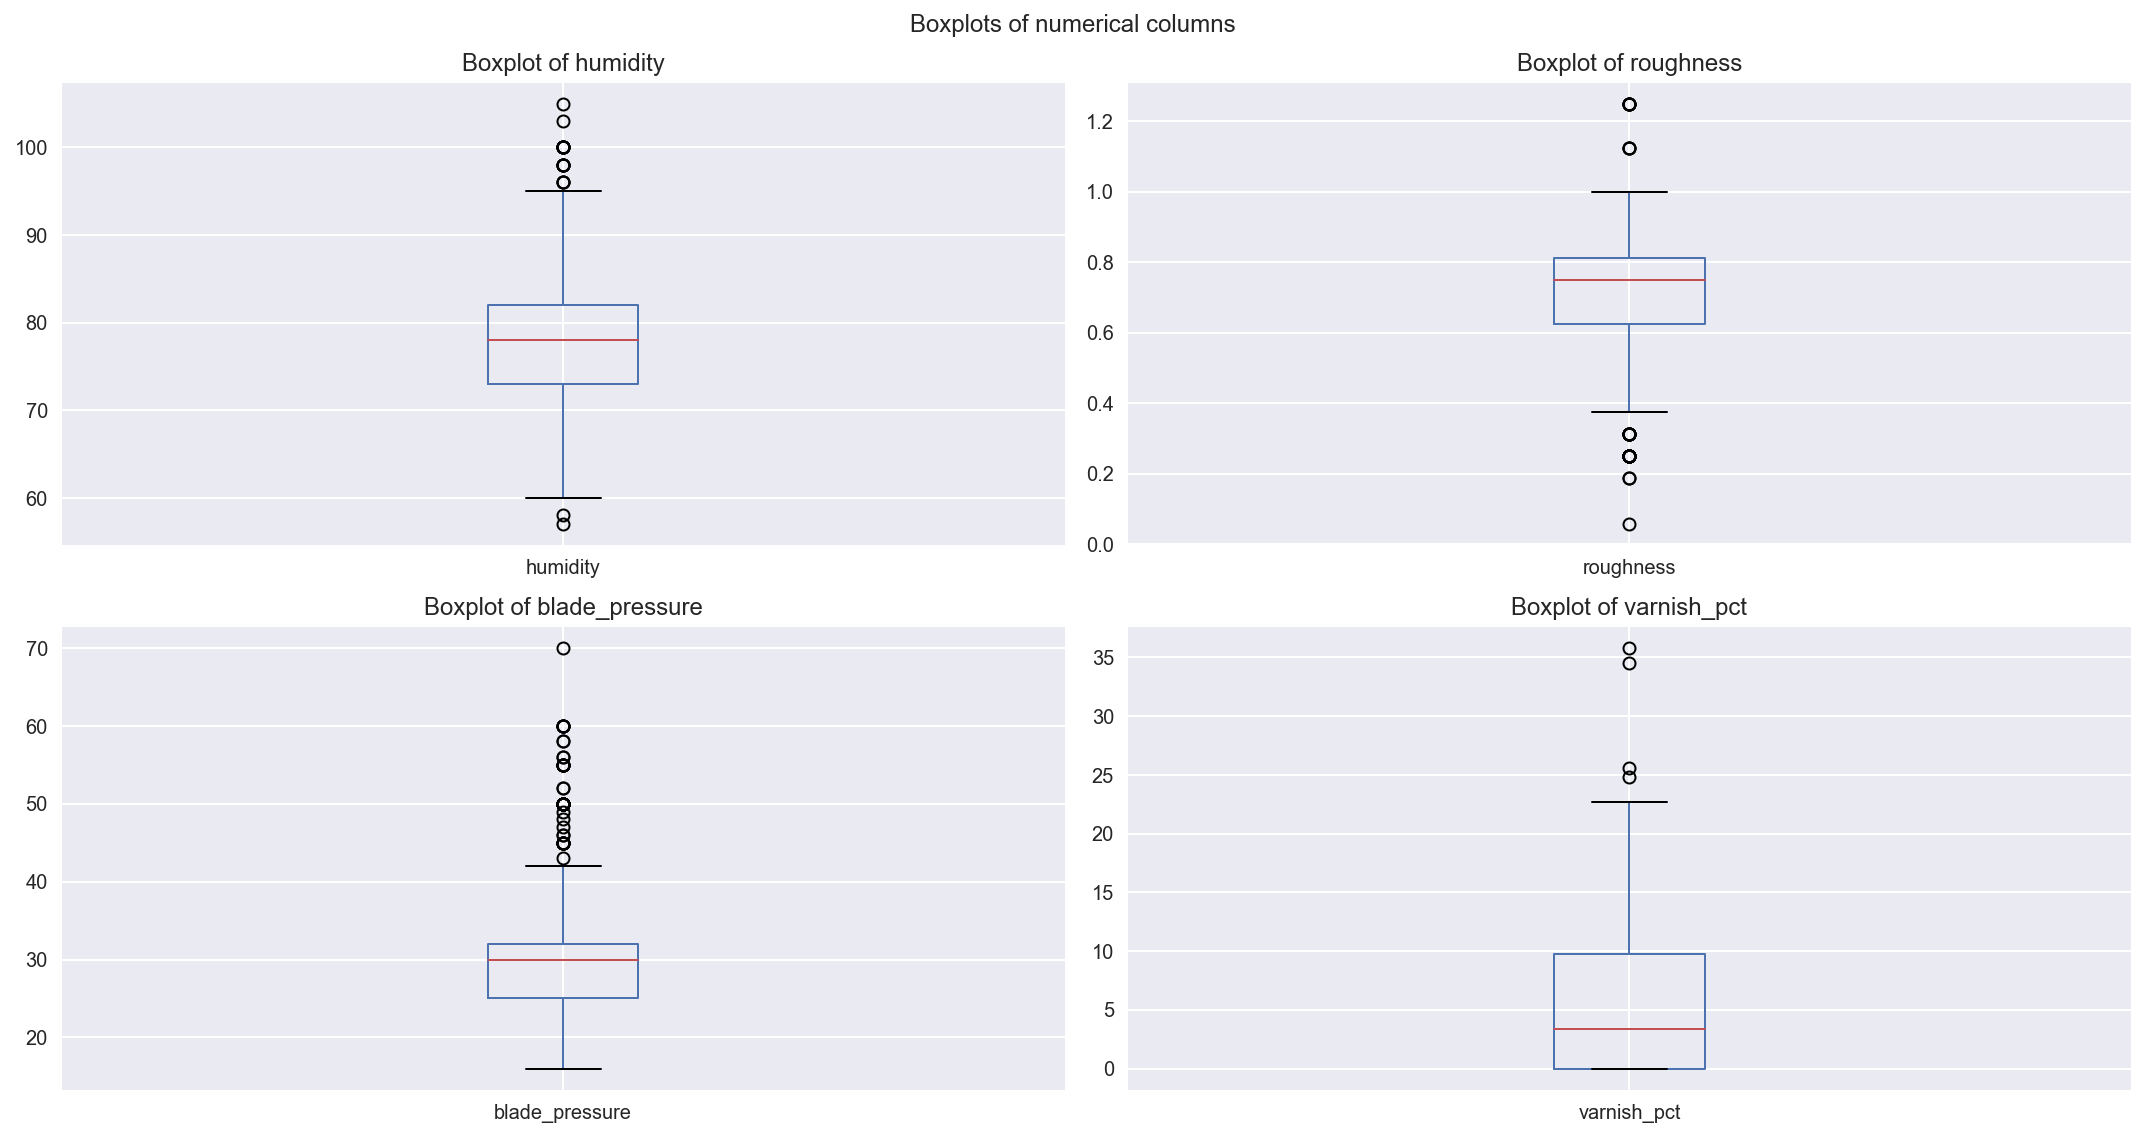

In [63]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[4:8][p]
    df[cur].plot(kind='box', ax=axes[r,c])
    axes[r,c].set_title('Boxplot of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- We can see the presence of outliers in all the four features above.

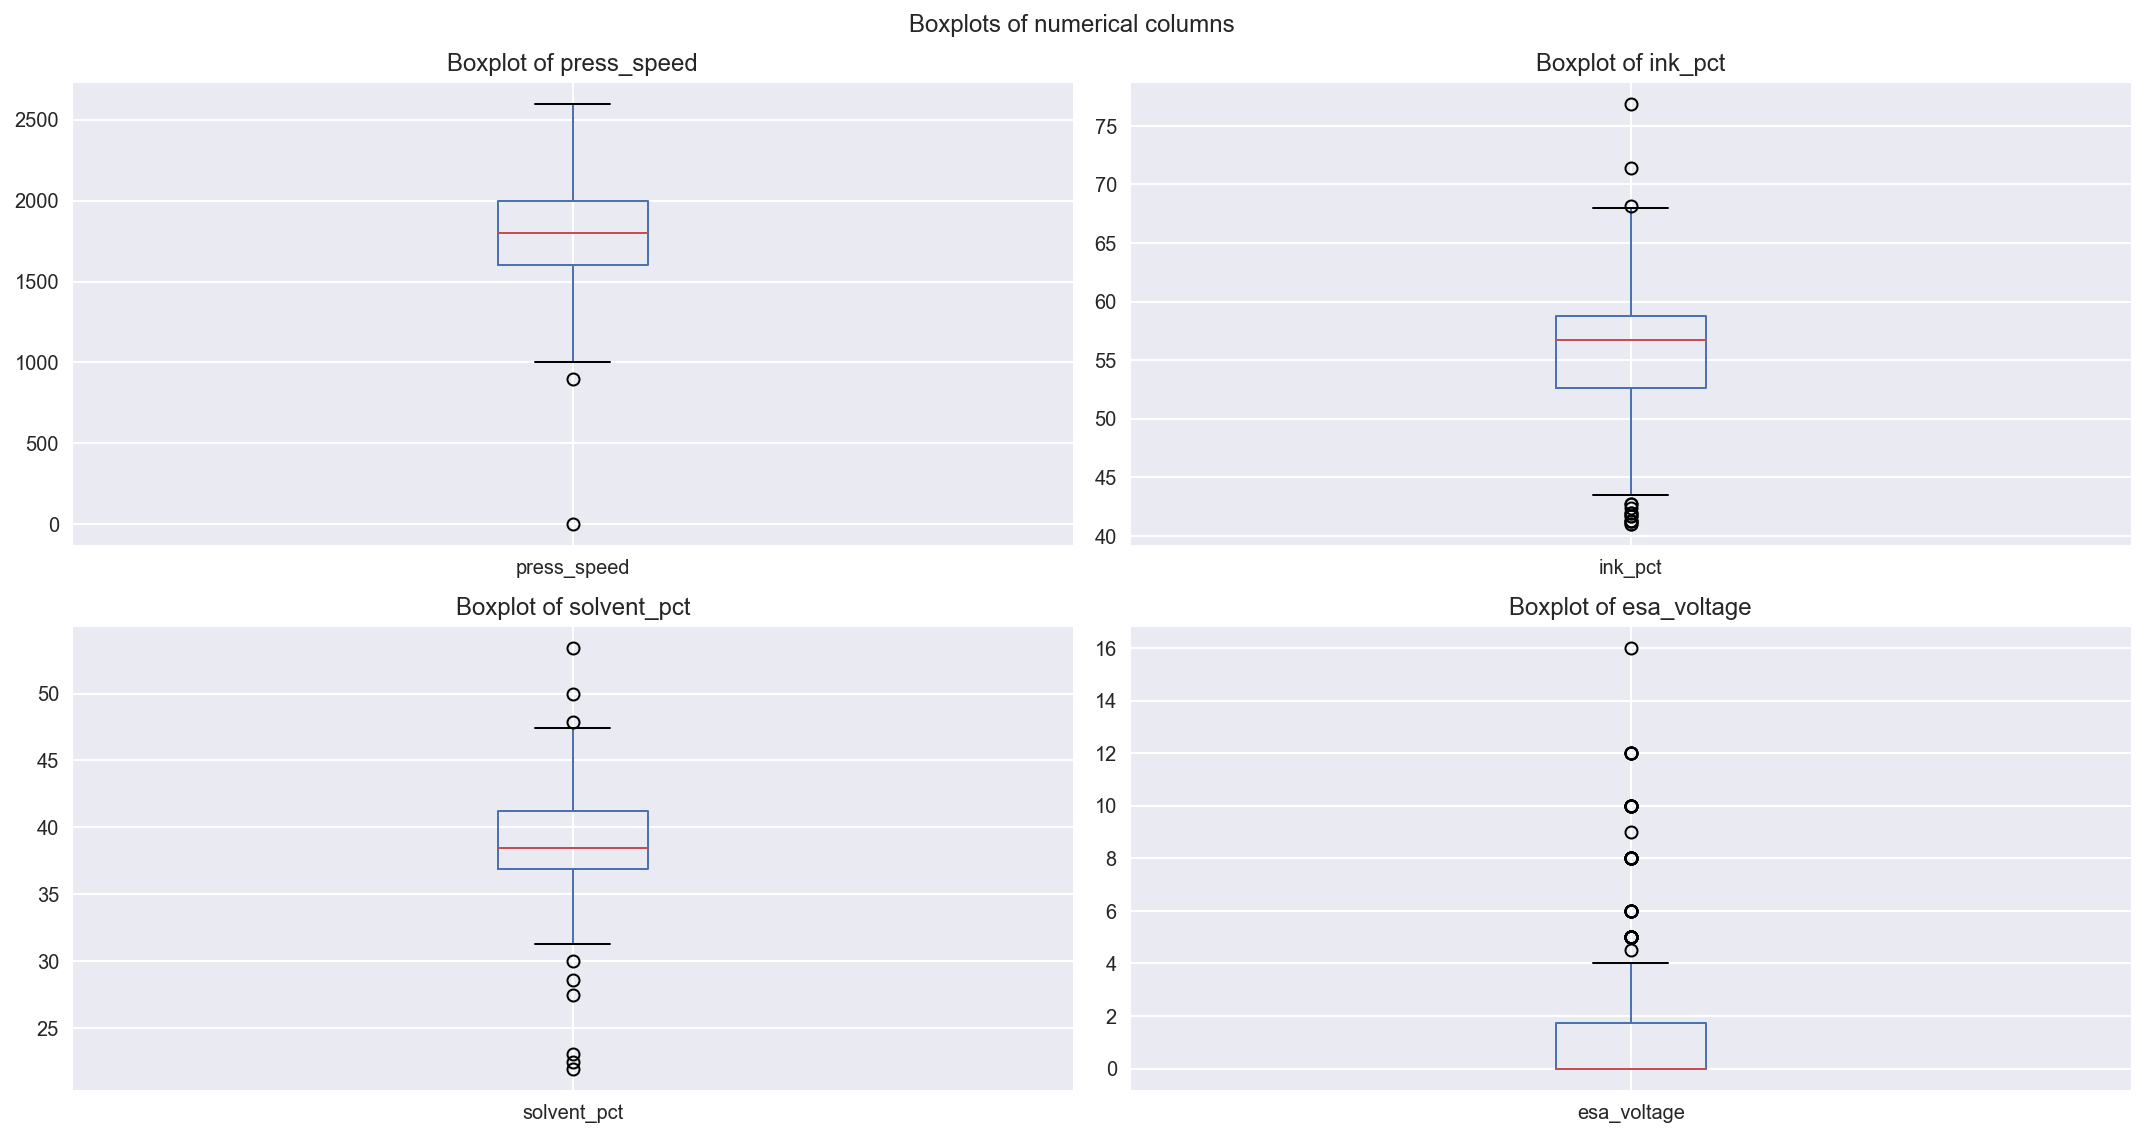

In [64]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[8:12][p]
    df[cur].plot(kind='box', ax=axes[r,c])
    axes[r,c].set_title('Boxplot of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- We can see the presence of outliers in all the four features above.

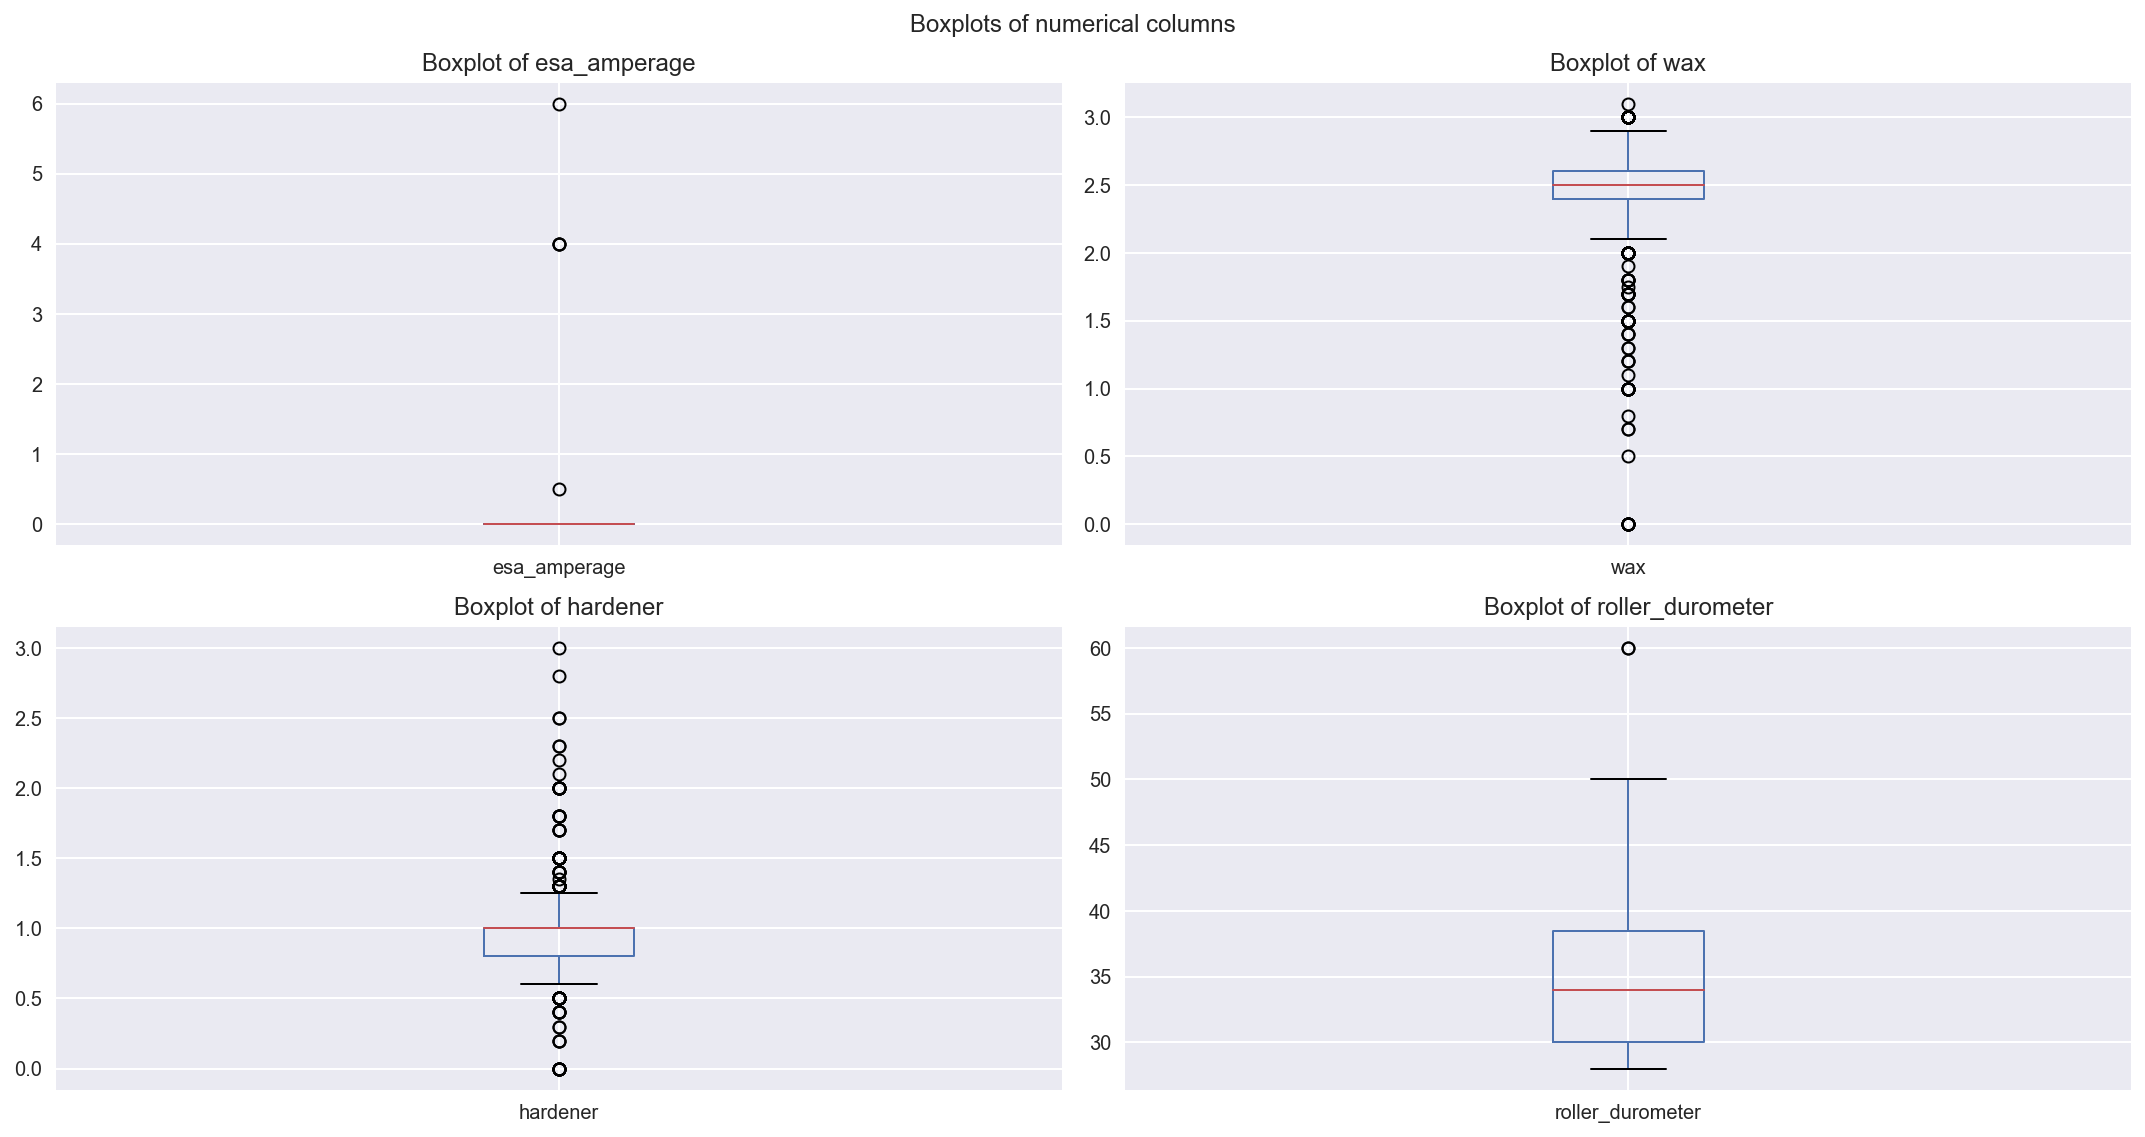

In [65]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[12:16][p]
    df[cur].plot(kind='box', ax=axes[r,c])
    axes[r,c].set_title('Boxplot of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- We can see the presence of outliers in all the four features above.

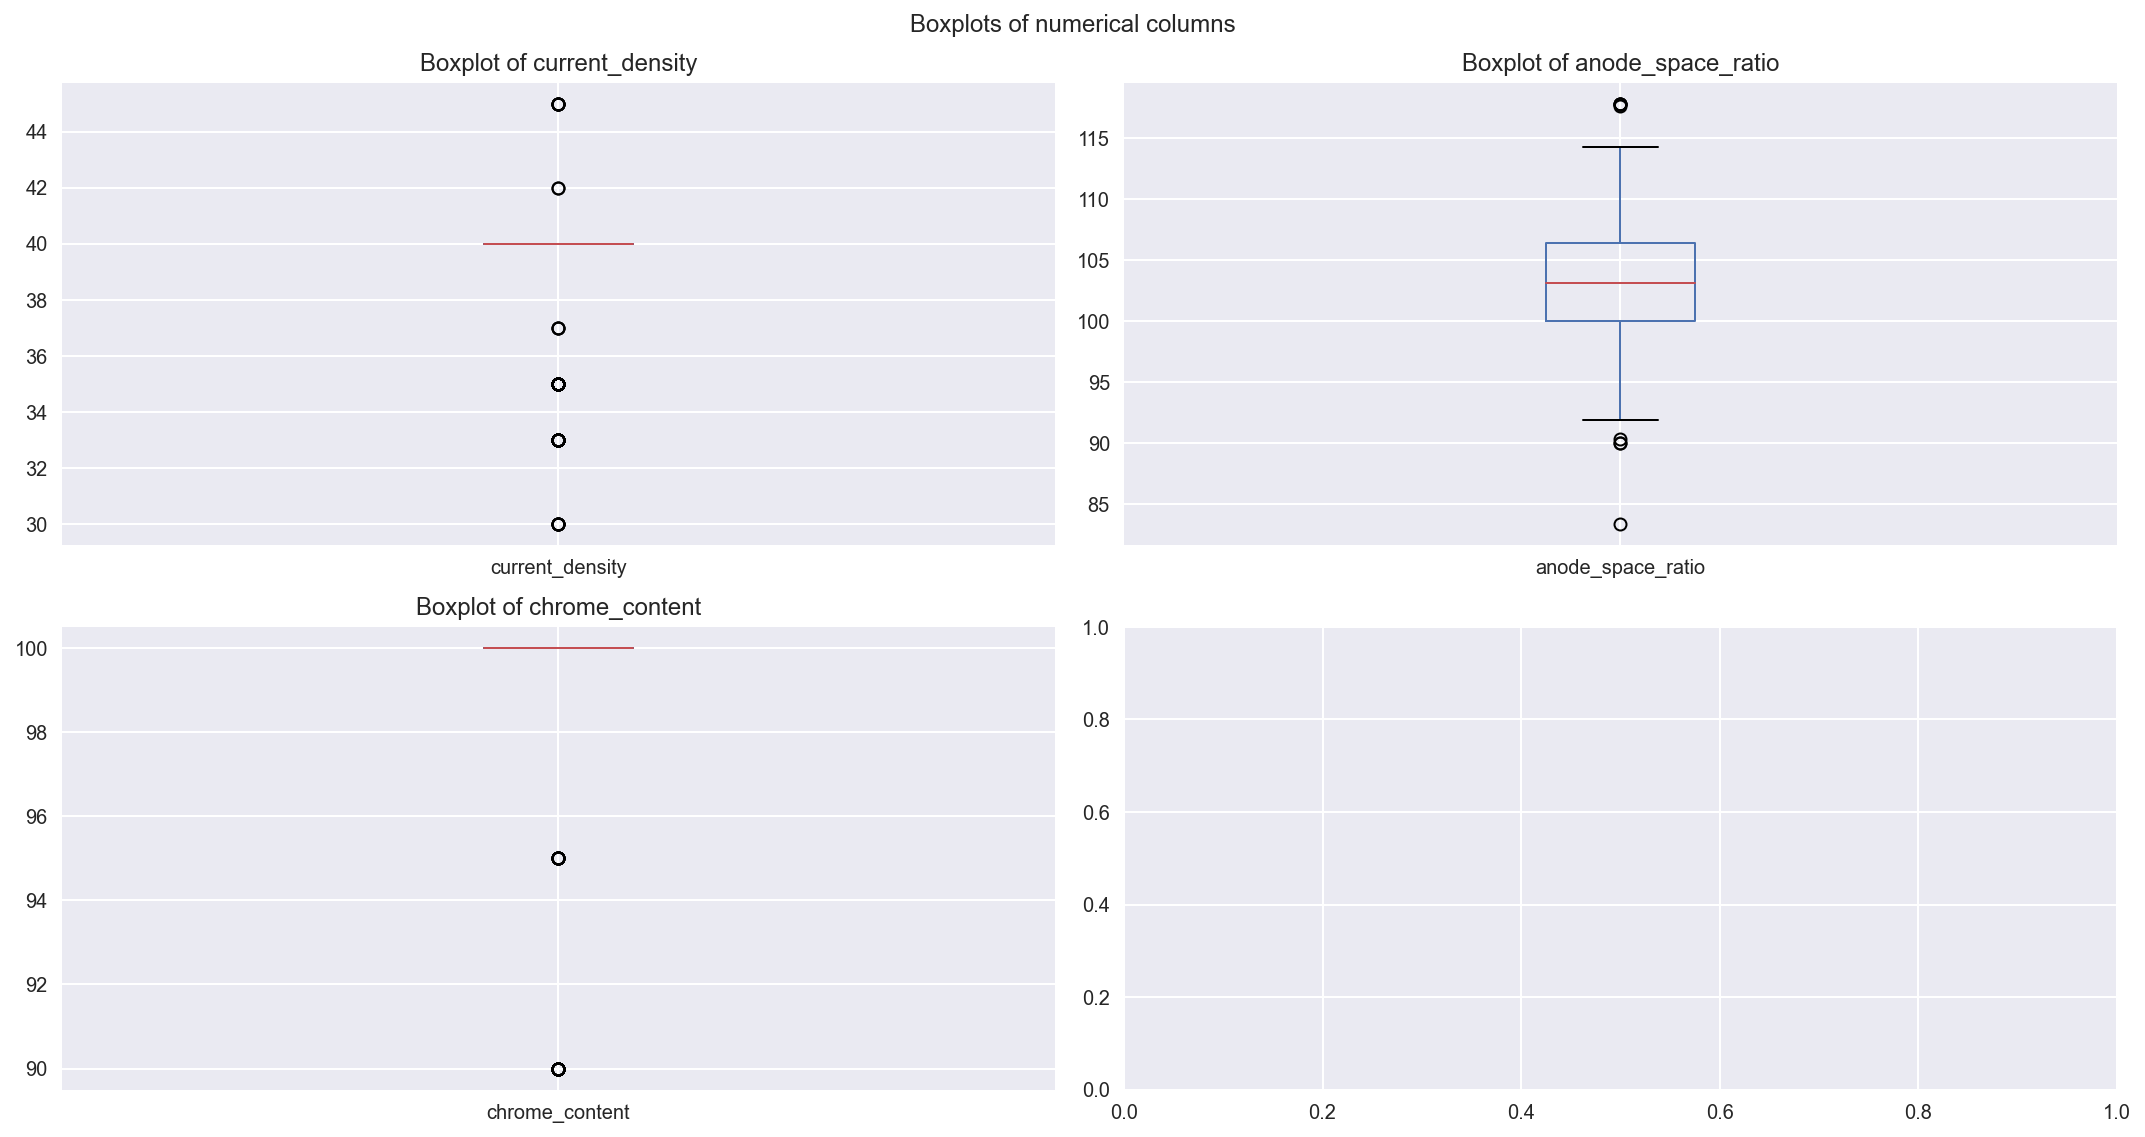

In [66]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical columns')
for p in range(4):
    if p==3:
        break
    r,c = d[p]
    cur = num[16:][p]
    df[cur].plot(kind='box', ax=axes[r,c])
    axes[r,c].set_title('Boxplot of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- We can see the presence of outliers in all the three features above.

### Outlier treatment for numeric variables <a id='4.1.4'></a>

As we can see in the boxplots, there are several outliers for all the numeric variables. <br>
We will do capping for all the outlier values, where we will set the value to the nearest whisker value in the boxplot.
The calculations for capping outliers is detailed below:


q1 = first quartile value (or) 25th percentile value.<br>
q2 = median (or) 50th percentile value.<br>
q3 = third quartile value (or) 75th percentile value.<br>
IQR = q3-q1<br>
upper_whisker (or) upper_limit = q3 + (IQR) * 1.5<br>
lower_whisker (or) lower_limit = q1 - (IQR) * 1.5<br>


Every outlier above the upper limit will be set to the upper limit value. And every outlier below the lower limit will be set to the lower limit value. This will be done for all numeric variables with outliers. The boxplots will be visualized again to confirm the absense of any outliers.

In [67]:
cap = df.loc[:,num].describe()
cap

,proof_cut,viscosity,caliper,ink_temperature,humidity,roughness,blade_pressure,varnish_pct,press_speed,ink_pct,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,45.032468,50.940631,0.275414,15.359202,78.538033,0.725762,30.801484,5.537662,1822.925788,55.751948,38.560742,1.182282,0.034323,2.402041,0.987755,34.697588,39.068646,103.034021,99.601113
std,8.578219,8.021822,0.067736,1.275653,7.727464,0.188124,8.577631,6.526084,325.652103,5.280225,3.317694,2.365490,0.394231,0.542596,0.365558,4.279980,2.340233,4.976267,1.848962
min,25.000000,35.000000,0.133000,11.200000,57.000000,0.056250,16.000000,0.000000,0.000000,41.000000,22.000000,0.000000,0.000000,0.000000,0.000000,28.000000,30.000000,83.330000,90.000000
25%,40.000000,43.000000,0.200000,14.600000,73.000000,0.625000,25.000000,0.000000,1600.000000,52.600000,36.900000,0.000000,0.000000,2.400000,0.800000,30.000000,40.000000,100.000000,100.000000
50%,45.000000,50.000000,0.267000,15.200000,78.000000,0.750000,30.000000,3.400000,1800.000000,56.750000,38.500000,0.000000,0.000000,2.500000,1.000000,34.000000,40.000000,103.127500,100.000000
75%,50.000000,56.000000,0.300000,16.000000,82.000000,0.812500,32.000000,9.750000,2000.000000,58.800000,41.200000,1.750000,0.000000,2.600000,1.000000,38.500000,40.000000,106.450000,100.000000
max,72.500000,72.000000,0.533000,24.500000,105.000000,1.250000,70.000000,35.800000,2600.000000,76.900000,53.400000,16.000000,6.000000,3.100000,3.000000,60.000000,45.000000,117.860000,100.000000


In [68]:
df.shape

(539, 35)

In [69]:
outliers = pd.DataFrame(columns=['feature','outliers'])
b = []
for c in num:
    #print(c)
    q1 = cap.loc['25%',c]
    q3 = cap.loc['75%',c]
    ll = q1 - (q3-q1)*1.5 # lower limit
    ul = q3 + (q3+q1)*1.5 # upper limit
    b.append(df[(df[c]<ll)|(df[c]>ul)].shape[0])
    
outliers.iloc[:,0] = num
outliers.iloc[:,1] = b
outliers.sort_values(by='outliers', ascending=False, inplace=True)
outliers['outlier_pct'] = [round(i*100/539, 2) for i in outliers.outliers]
outliers

,feature,outliers,outlier_pct
13,wax,101,18.74
16,current_density,94,17.44
11,esa_voltage,49,9.09
14,hardener,42,7.79
5,roughness,27,5.01
18,chrome_content,26,4.82
9,ink_pct,12,2.23
10,solvent_pct,6,1.11
12,esa_amperage,5,0.93
7,varnish_pct,4,0.74


##### Barplot of outlier percentage in the numeric columns:

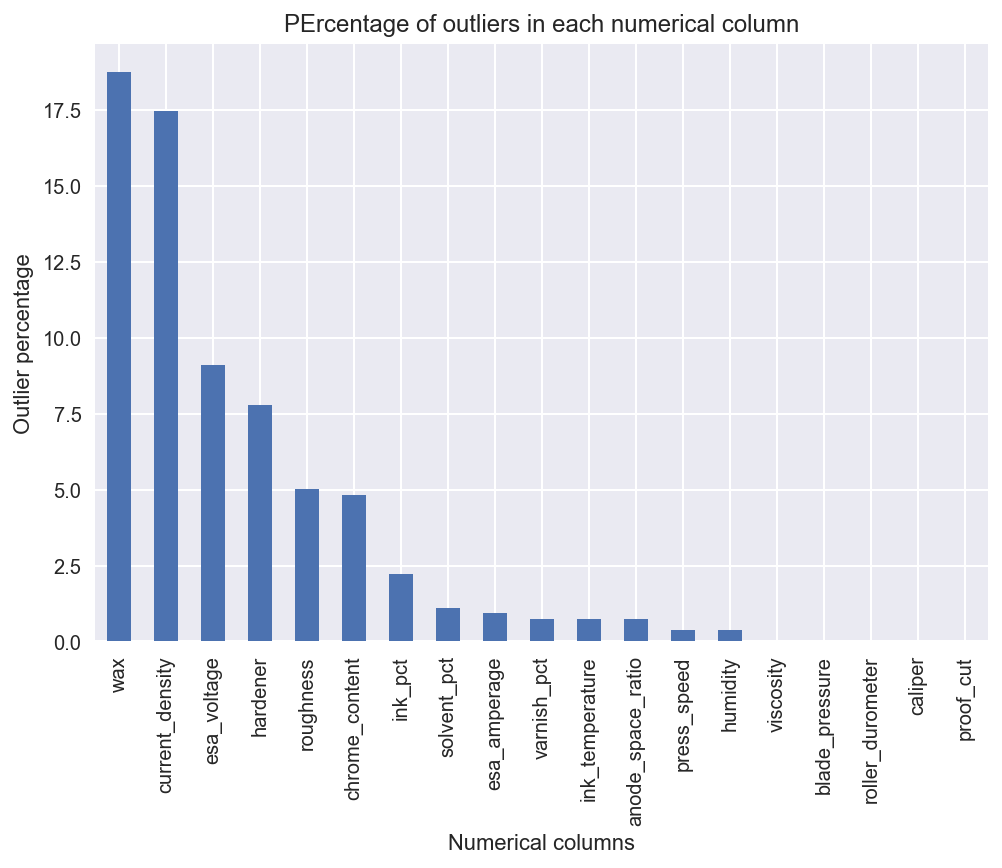

In [70]:
outliers.outlier_pct.plot(kind='bar')
plt.xticks(list(range(outliers.shape[0])), outliers.feature)
plt.xlabel('Numerical columns')
plt.ylabel('Outlier percentage')
plt.title('PErcentage of outliers in each numerical column')
plt.show()

The table and bar plot above shows the number and percentage of outlier values in the numerical columns. 'Wax' and 'current_density' are the columns with highest number of outliers. These values will be capped to the upper and lower limit as discussed above. The boxplots will be visualized again after the capping/clamping.

In [71]:
for c in num:
    q1 = cap.loc['25%', c]
    q3 = cap.loc['75%', c]
    iqr = q3-q1
    ul = q3+(iqr*1.5)
    ll = q1-(iqr*1.5)
    out = df[(df[c]>ul)|(df[c]<ll)]
    if out.shape[0]==0: # if not outliers are present
        continue
    upper_ind = list(df[df[c]>ul].index)
    lower_ind = list(df[df[c]<ll].index)
    df.loc[upper_ind,c] = ul # set to upper limit
    df.loc[lower_ind,c] = ll # set to lower limit
    if df[(df[c]>ul)|(df[c]<ll)].shape[0] != 0 :
        print(c,'is not cleaned')
    else:
        print(c, 'is cleaned')

proof_cut is cleaned
caliper is cleaned
ink_temperature is cleaned
humidity is cleaned
roughness is cleaned
blade_pressure is cleaned
varnish_pct is cleaned
press_speed is cleaned
ink_pct is cleaned
solvent_pct is cleaned
esa_voltage is cleaned
esa_amperage is cleaned
wax is cleaned
hardener is cleaned
roller_durometer is cleaned
current_density is cleaned
anode_space_ratio is cleaned
chrome_content is cleaned


### Boxplots of numerical variables after outlier treatment <a id='4.1.5'></a>

In [72]:
d = {0:[0,0], 1:[0,1], 2:[1,0], 3:[1,1]}

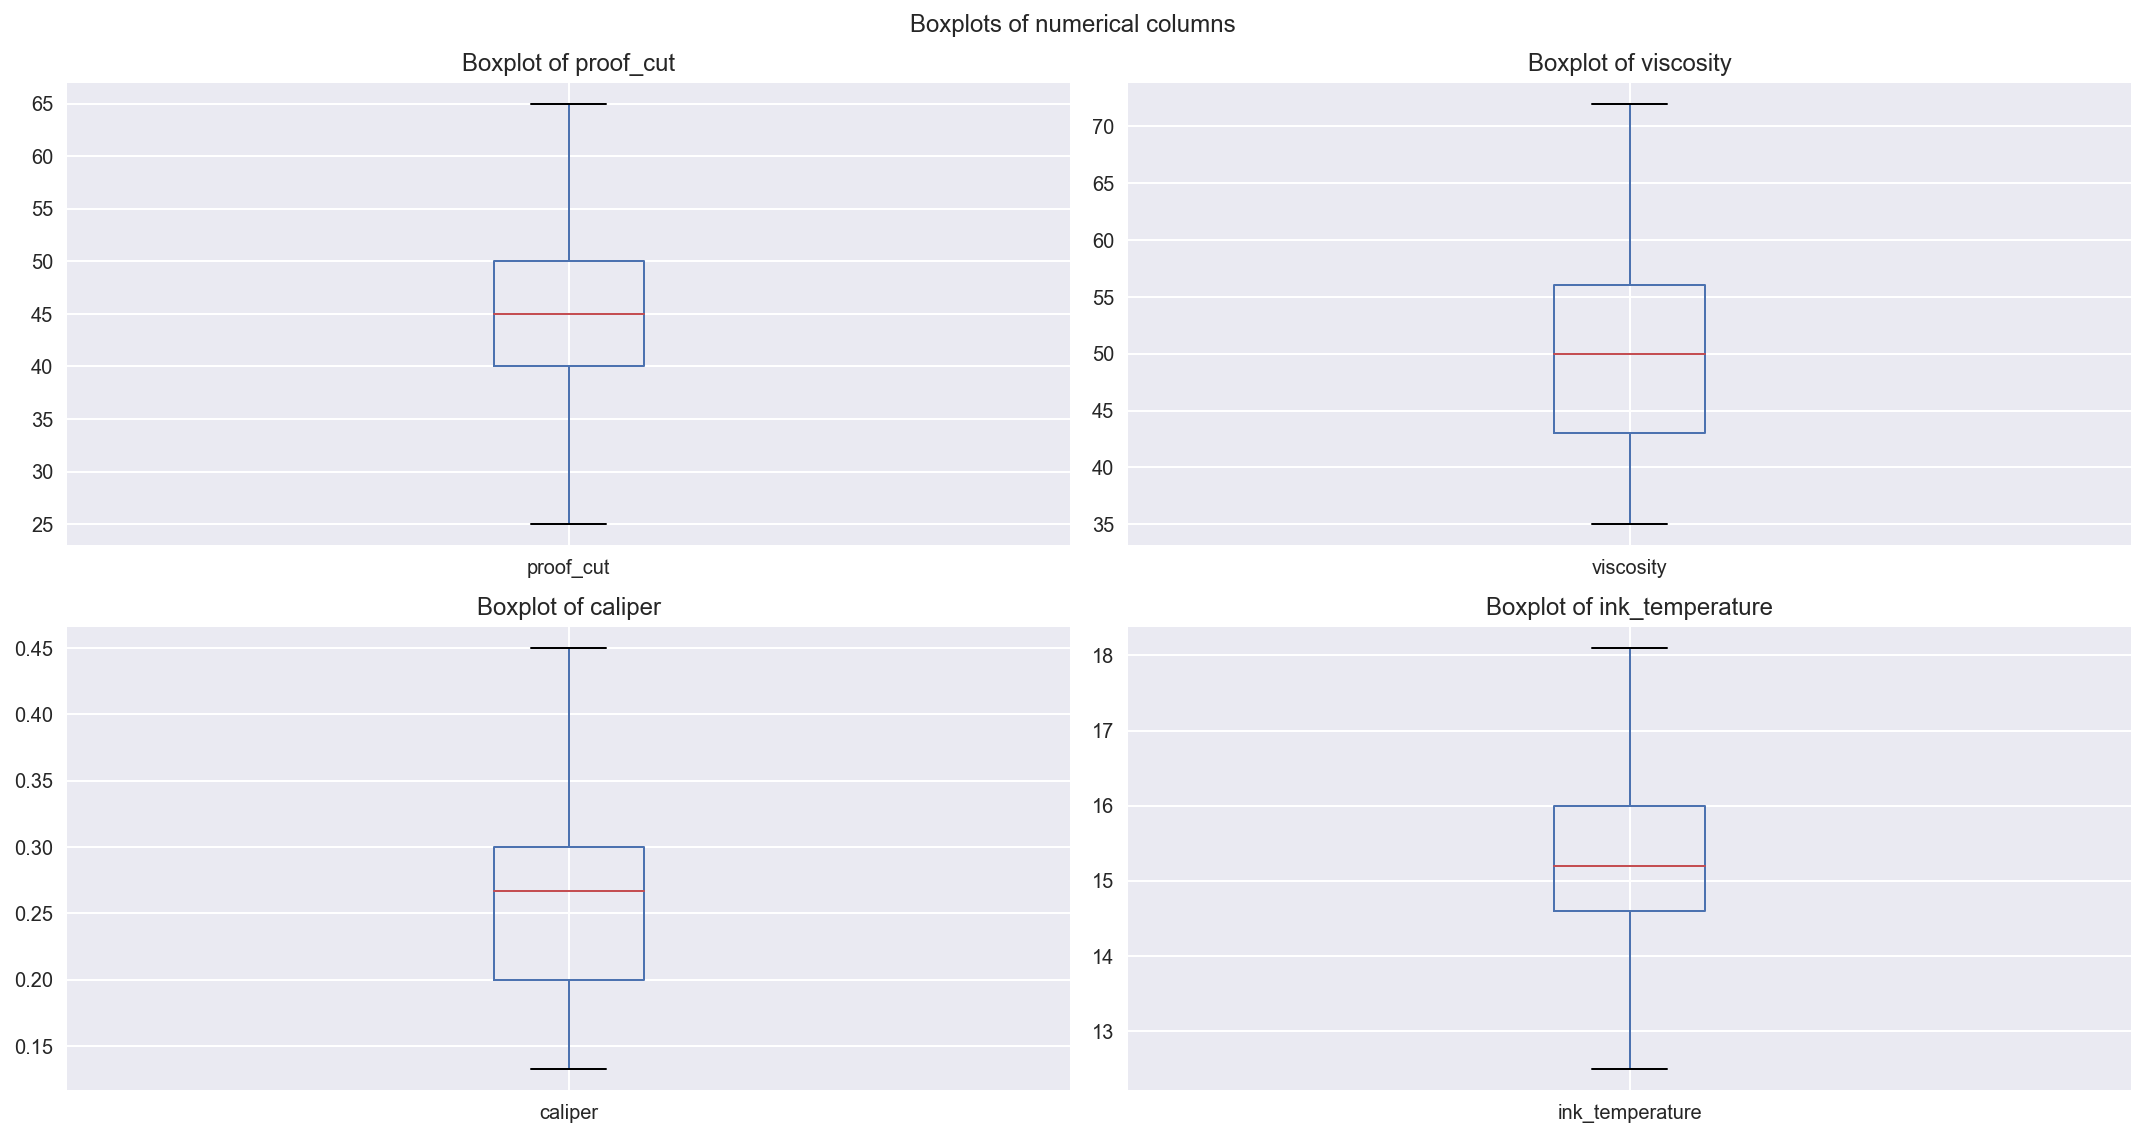

In [73]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[:4][p]
    df[cur].plot(kind='box', ax=axes[r,c])
    axes[r,c].set_title('Boxplot of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

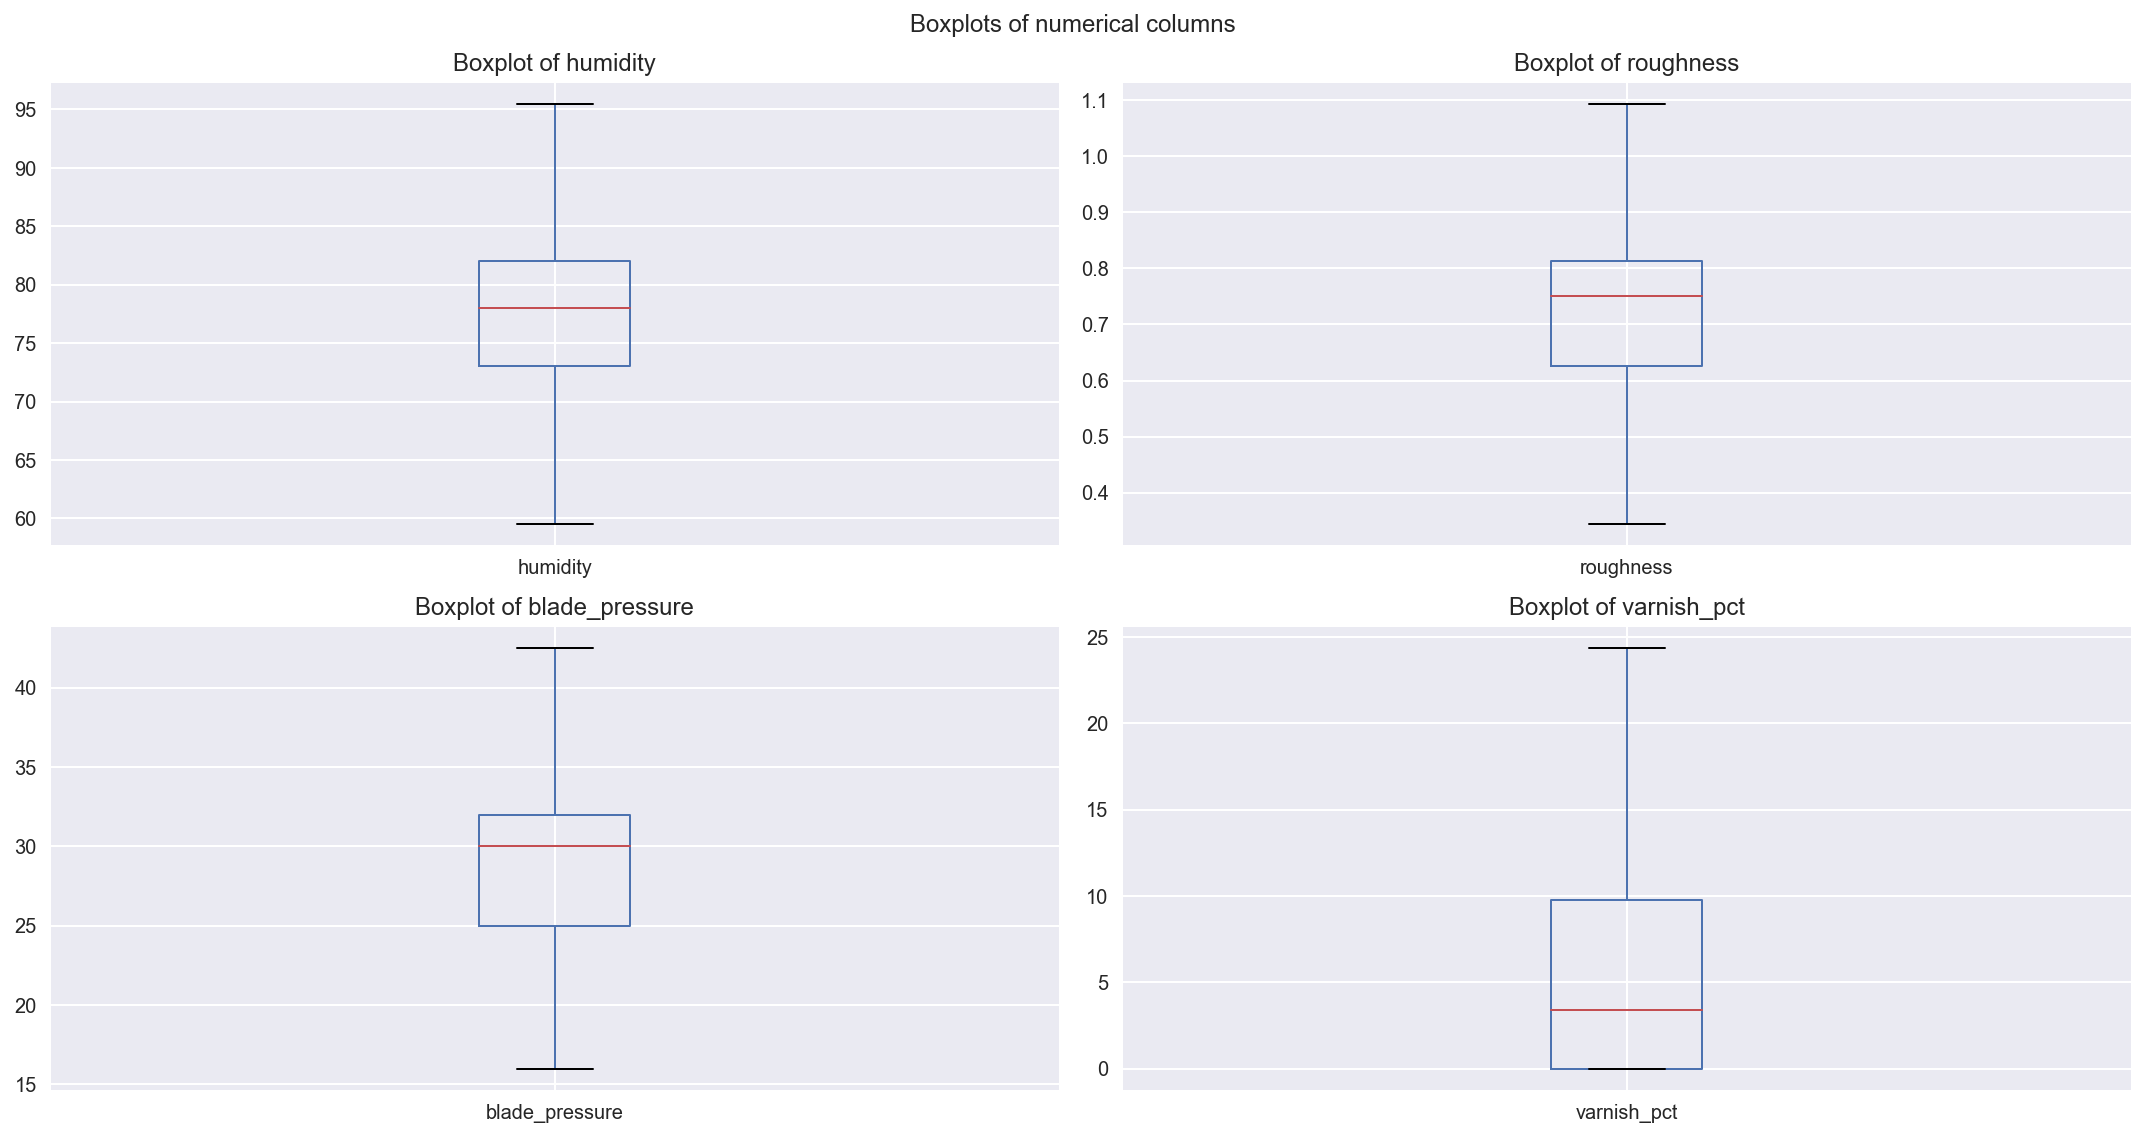

In [74]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[4:8][p]
    df[cur].plot(kind='box', ax=axes[r,c])
    axes[r,c].set_title('Boxplot of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

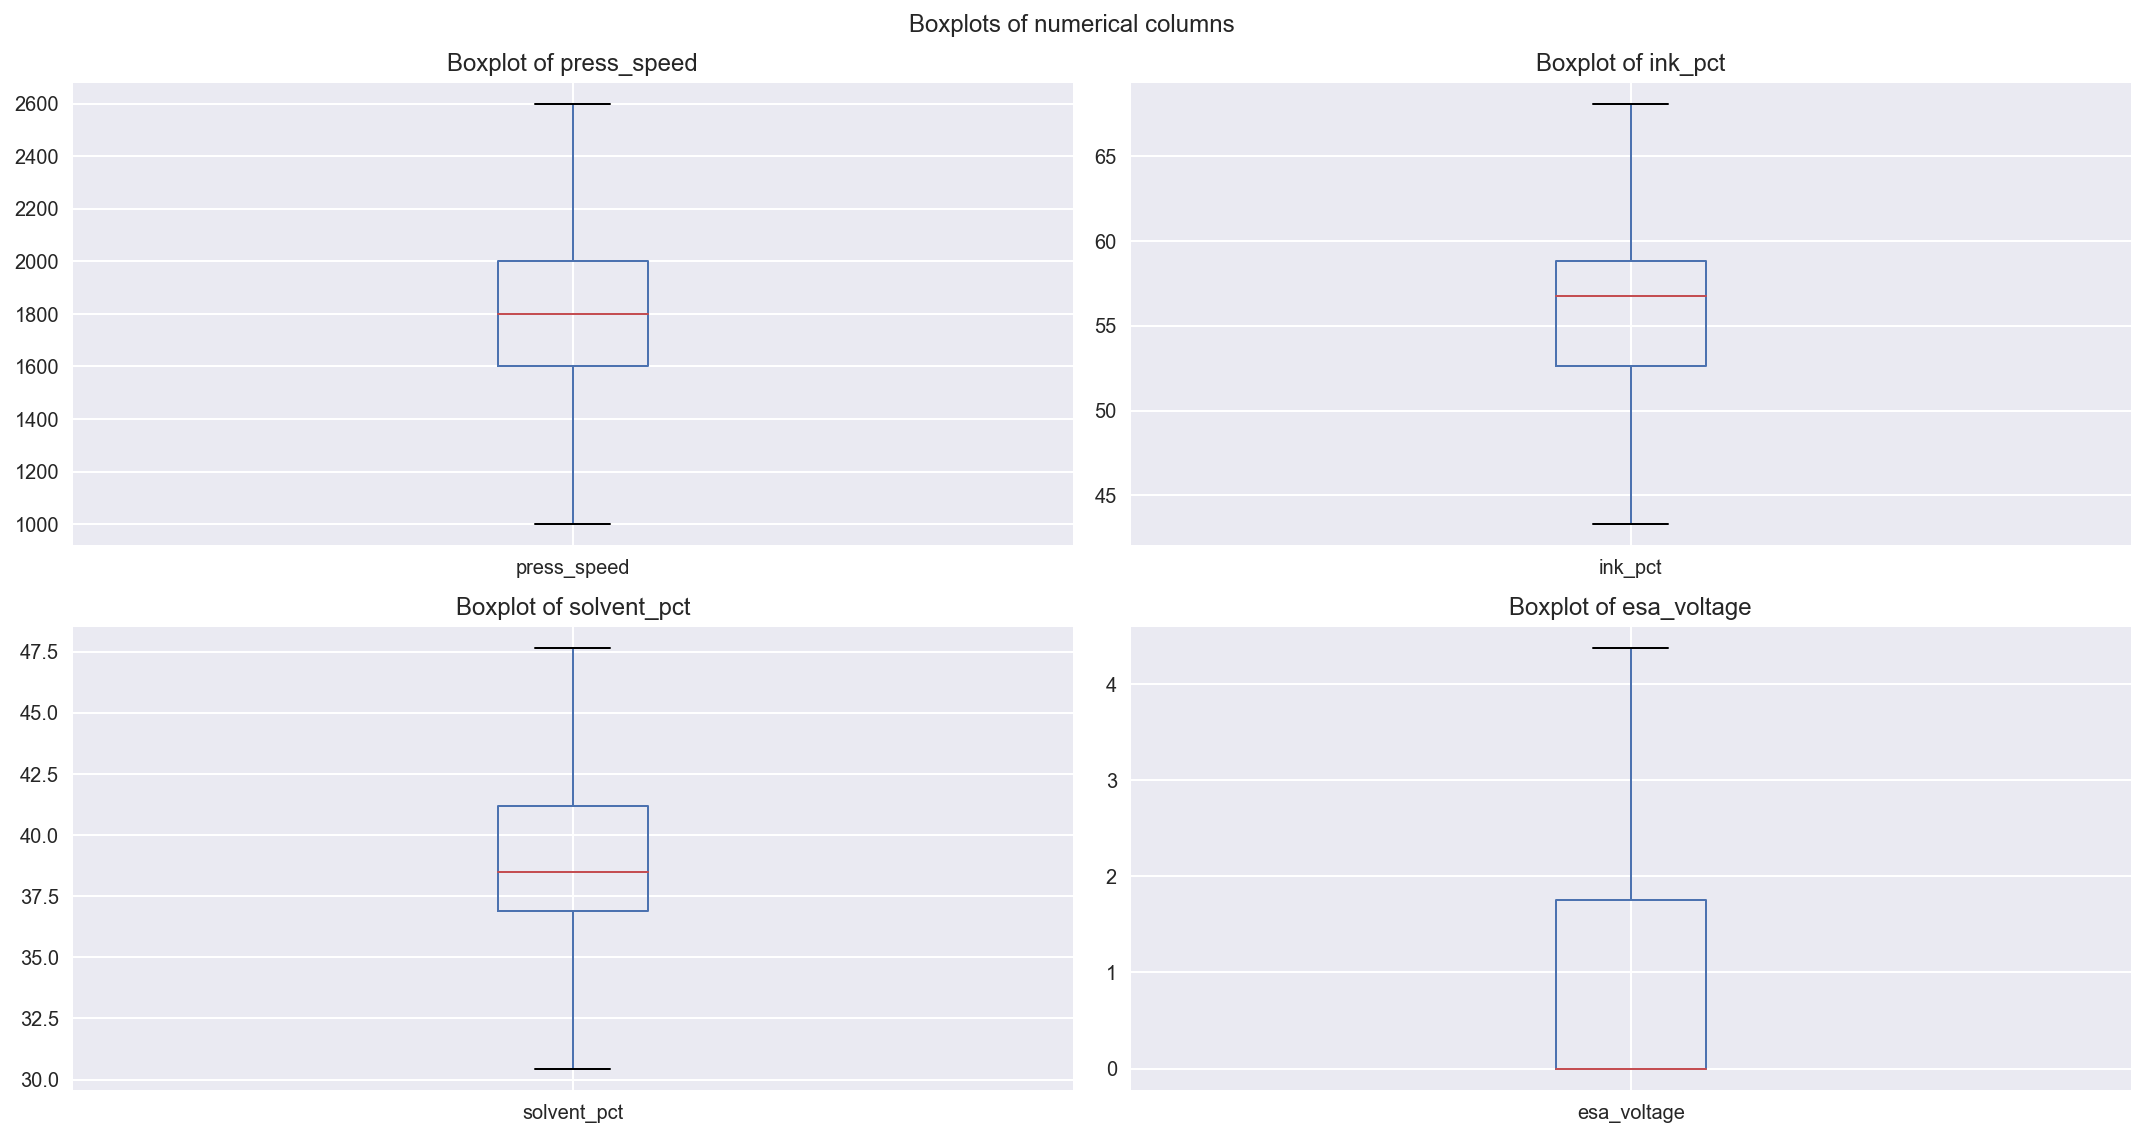

In [75]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[8:12][p]
    df[cur].plot(kind='box', ax=axes[r,c])
    axes[r,c].set_title('Boxplot of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

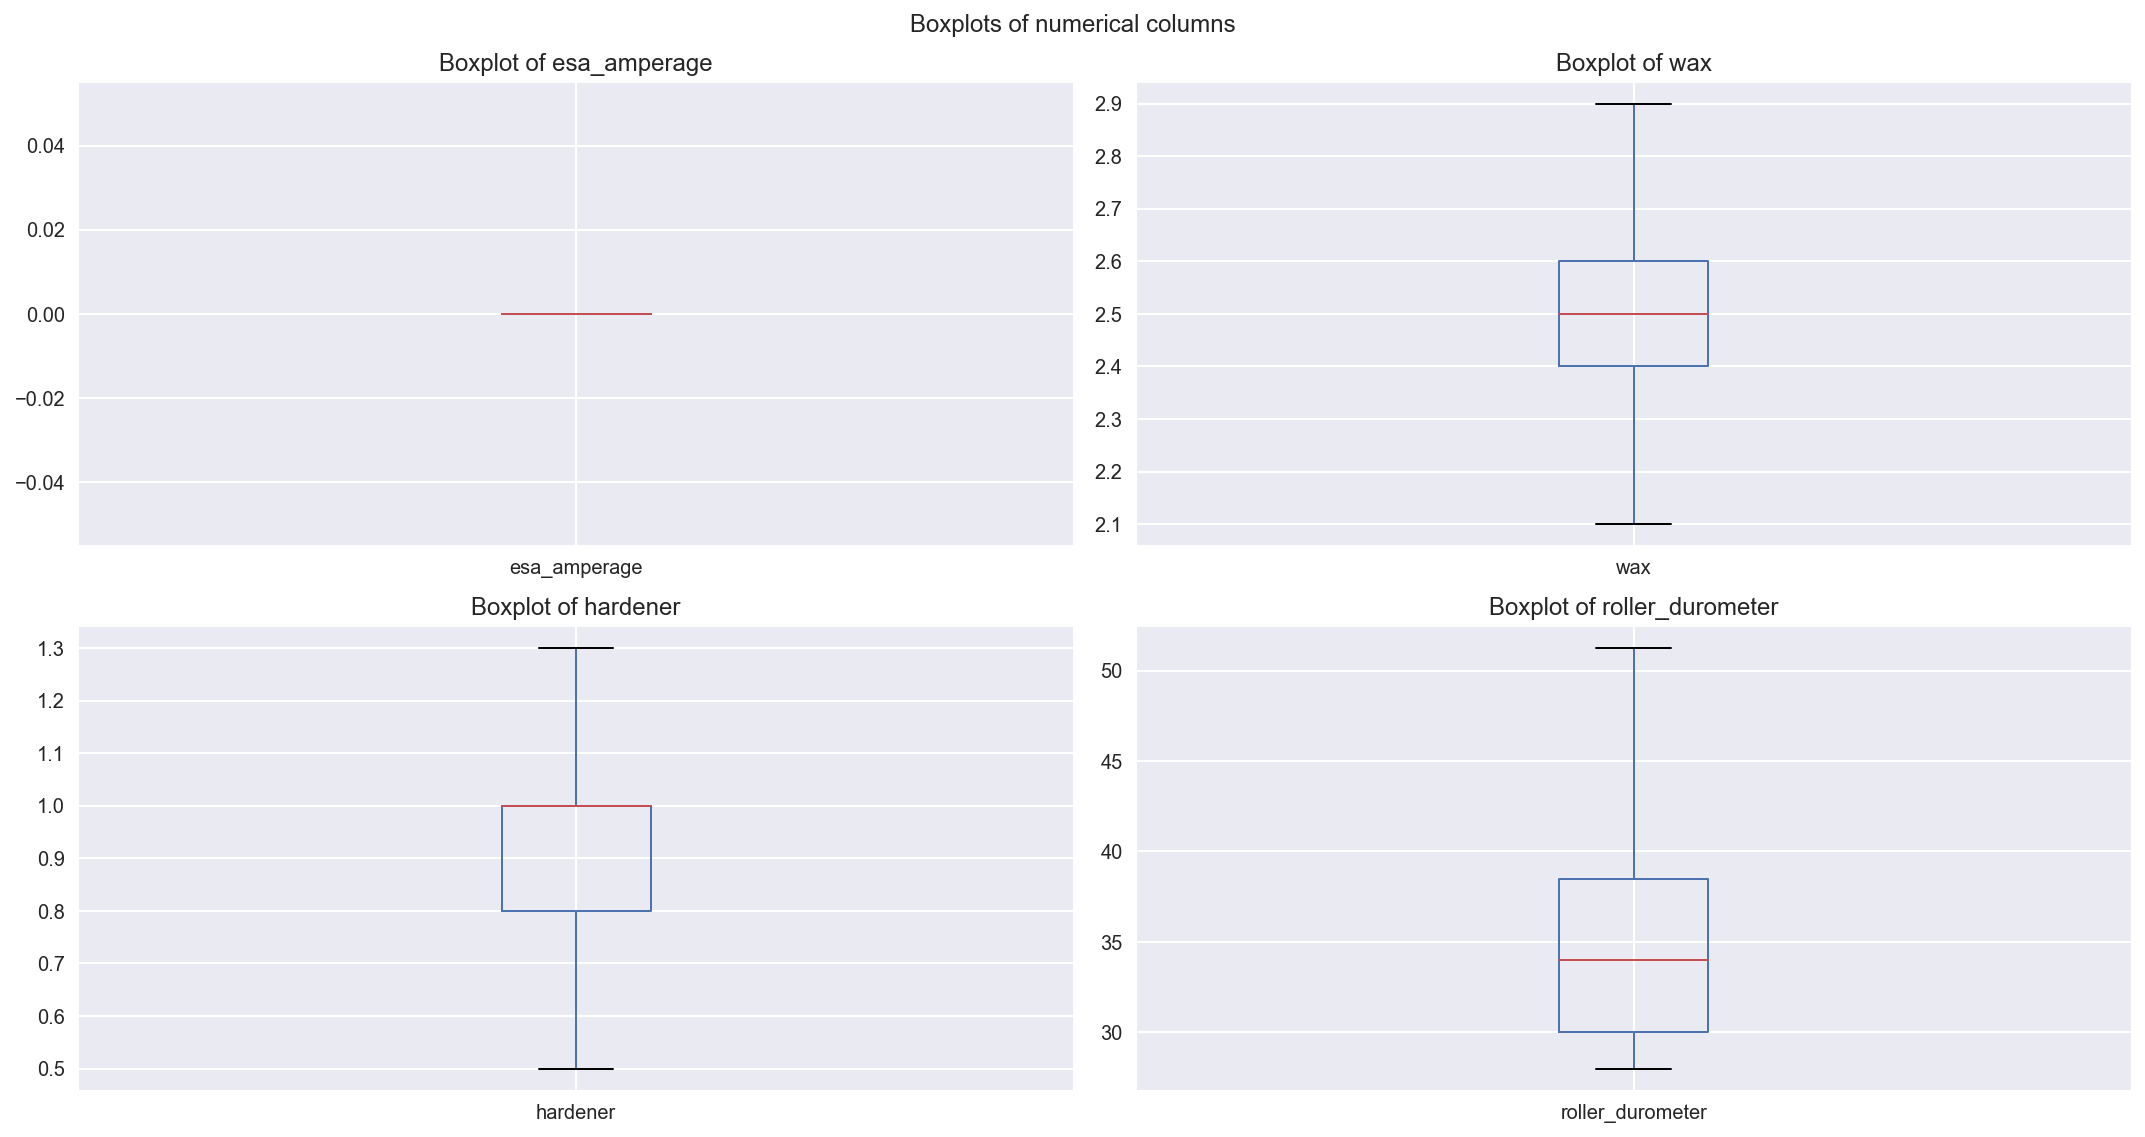

In [76]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical columns')
for p in range(4):
    r,c = d[p]
    cur = num[12:16][p]
    df[cur].plot(kind='box', ax=axes[r,c])
    axes[r,c].set_title('Boxplot of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- 'esa_amperage' seems to have all concentrated to just one value.

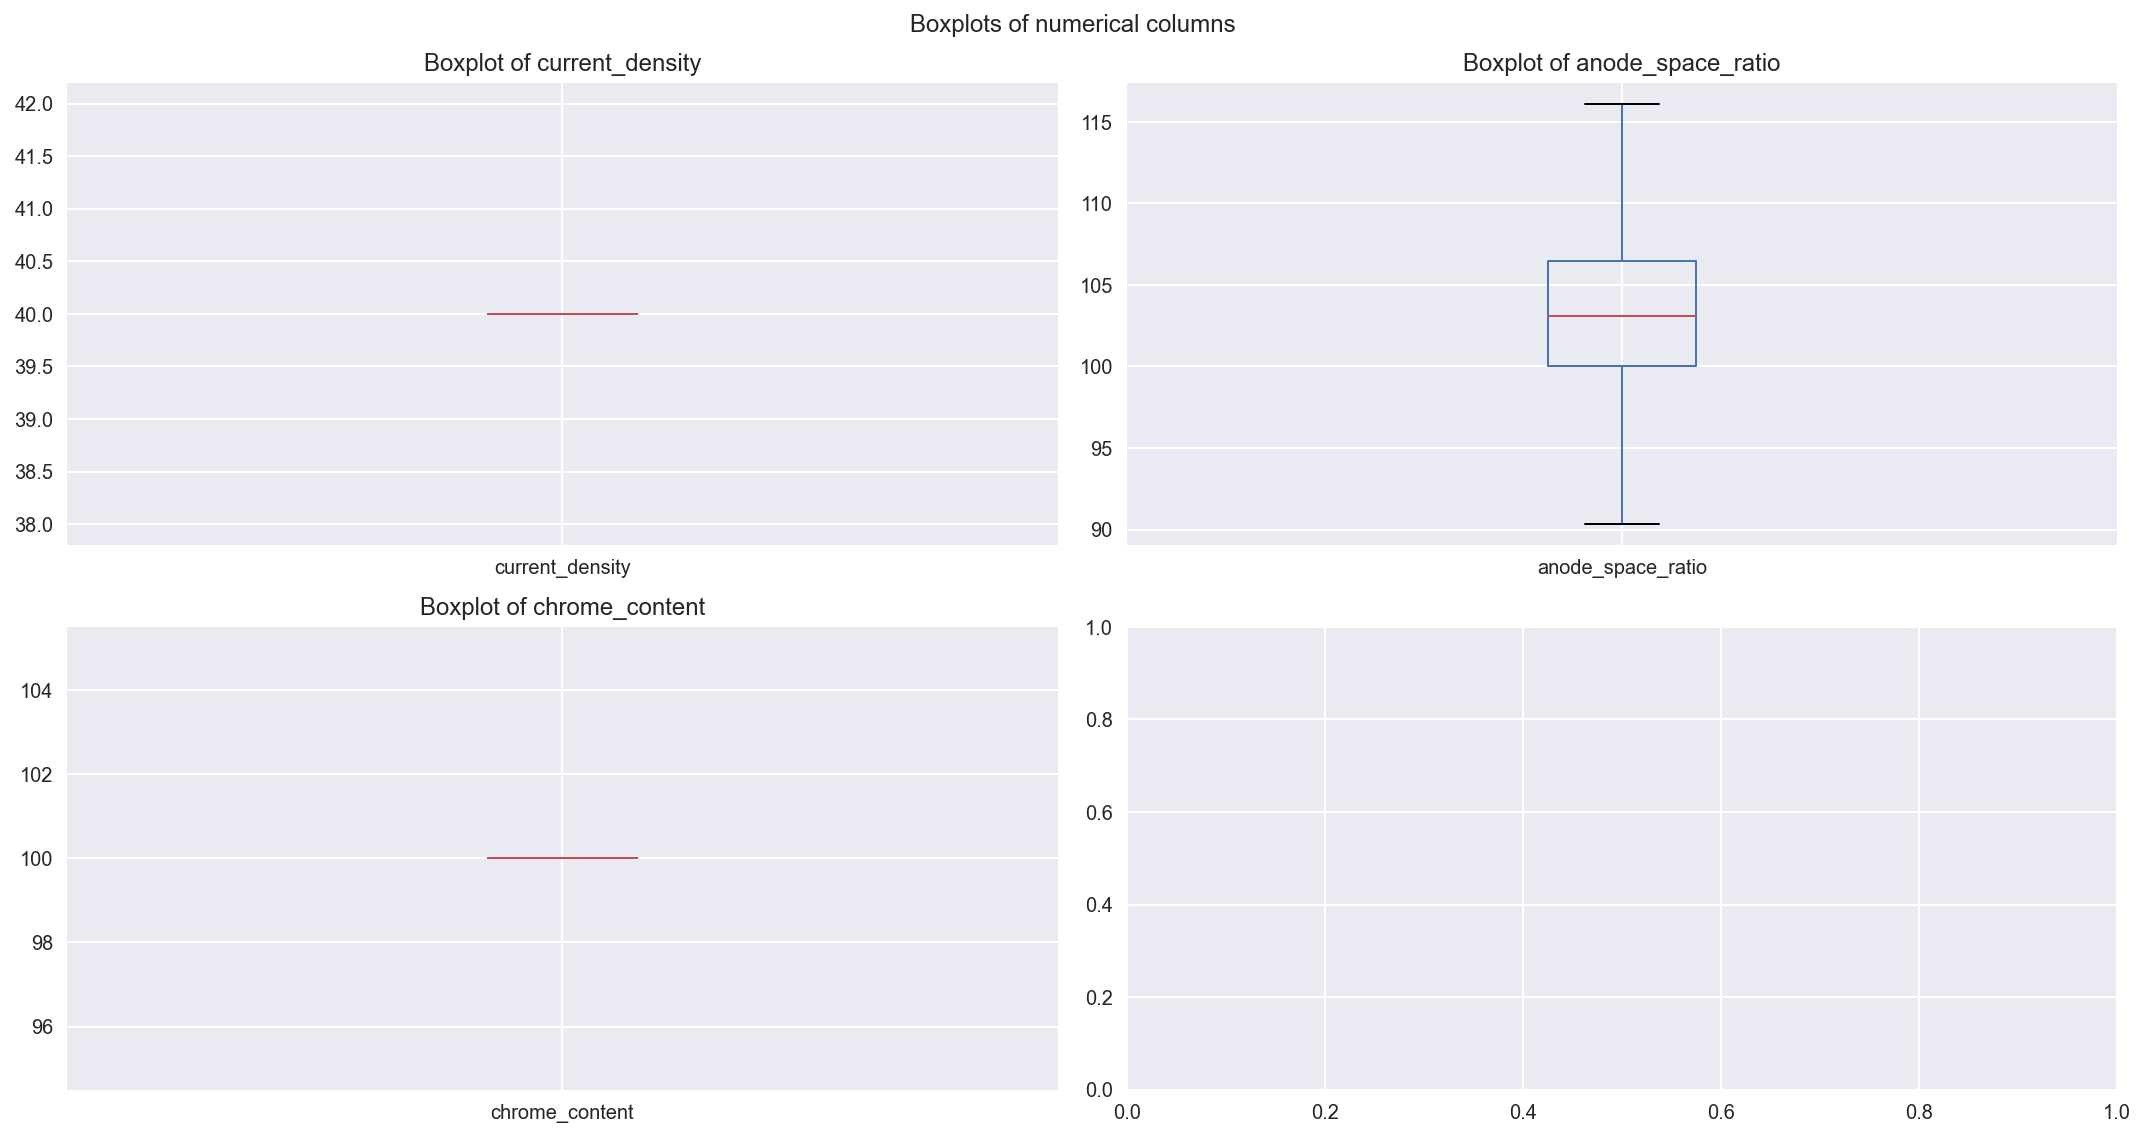

In [77]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Boxplots of numerical columns')
for p in range(4):
    if p==3:
        break
    r,c = d[p]
    cur = num[16:][p]
    df[cur].plot(kind='box', ax=axes[r,c])
    axes[r,c].set_title('Boxplot of '+cur)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the plots above:**<br>
The outliers are now removed from all the numerical columns. However, we see that for 'chrome_content','esa_amperage' and 'current_density', all the values center around a particular value. (the entire boxplot is squished between them). We will check their columns and drop it if they are redundant.

In [78]:
df.esa_amperage.value_counts()

0.0    539
Name: esa_amperage, dtype: int64

In [79]:
df.current_density.value_counts()

40.0    539
Name: current_density, dtype: int64

In [80]:
df.chrome_content.value_counts()

100.0    539
Name: chrome_content, dtype: int64

We can see that all the observations have the same reading for these three features. This could also be due to the outlier treatment done earlier. But, from the histograms plotted earlier, we can see there was a very small fraction of values lying outside this value. Thus they can be considered to add no value to our analysis. We can drop these two features.

In [81]:
df.shape

(539, 35)

In [82]:
df.drop(labels=['chrome_content','current_density','esa_amperage'], axis=1, inplace=True)

In [83]:
df.shape # the two columns have now been dropped

(539, 32)

In [84]:
len(num)

19

In [85]:
num.remove('chrome_content')
num.remove('current_density')
num.remove('esa_amperage')
len(num)

16

## Bivariate analysis <a id='4.2'></a>

#### Heatmap between numeric variables <a id='4.2.1'></a>

In [86]:
hm = df.corr()
for c in hm.columns:
    hm[c] = [round(i,2) for i in hm[c]]
#hm

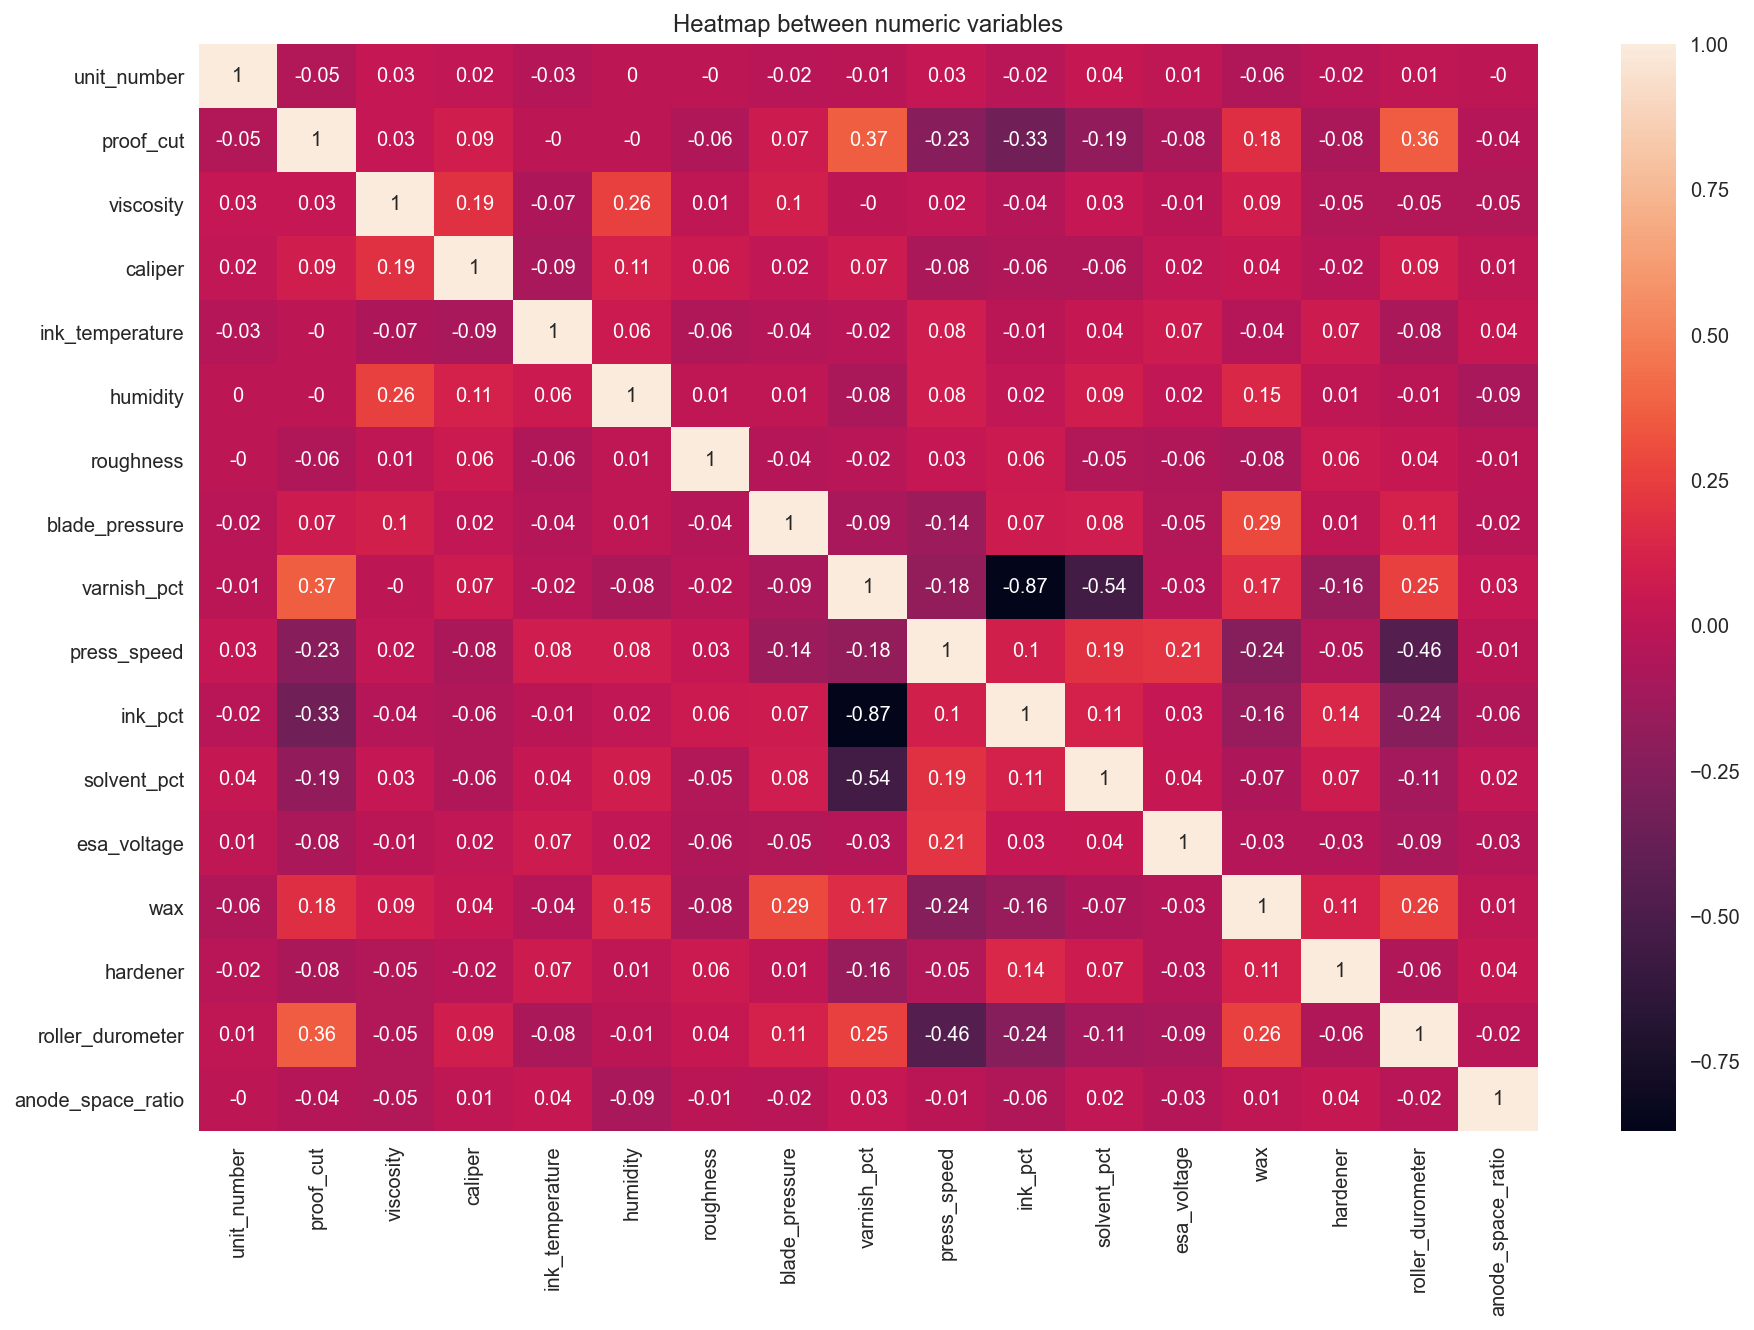

In [87]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(hm, annot=True)
plt.title('Heatmap between numeric variables')
plt.show()

**Important combinations to notice:**
- 'ink_pct' and 'varnish_pct' seem to have a very high negative correlation of -0.87
- 'solvent_pct' and 'varnish_pct' also have a significant negative correlation of -0.54
- 'press_speed' and 'rolled_durometer' also have a noticeable positive correlation of 0.43<br>

#### Scatterplot between correlated features <a id='4.2.2'></a>

Will visualize these combinations in a scatter plot. All other combinations of numeric columns have little to no correlation between them.

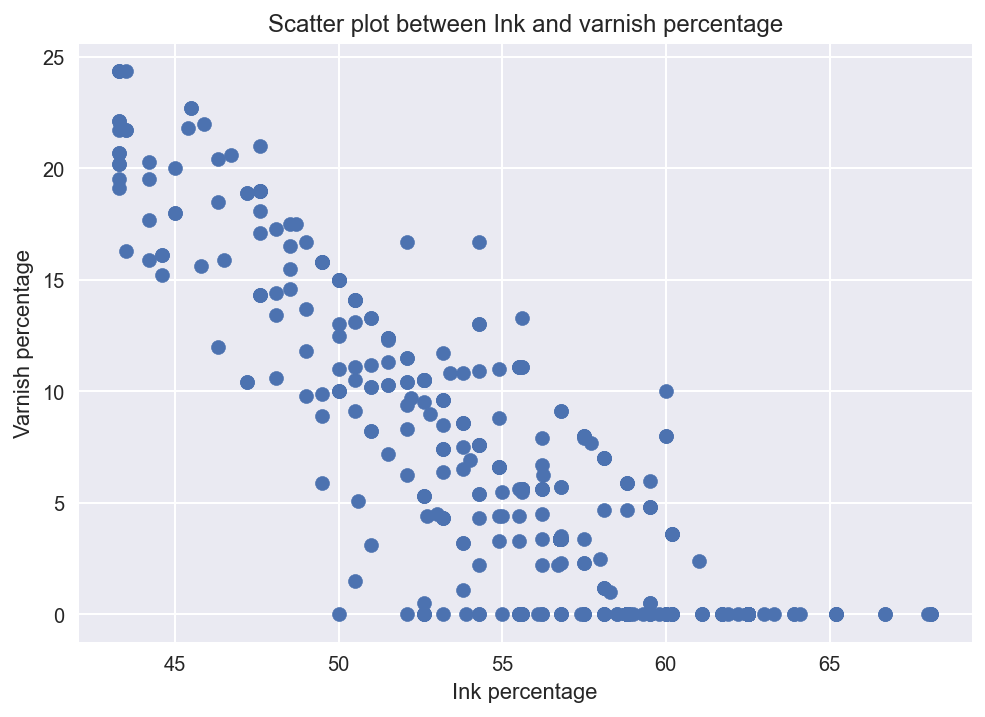

In [88]:
plt.scatter(x=df.ink_pct, y=df.varnish_pct)
plt.title('Scatter plot between Ink and varnish percentage')
plt.xlabel('Ink percentage')
plt.ylabel('Varnish percentage')
plt.show()

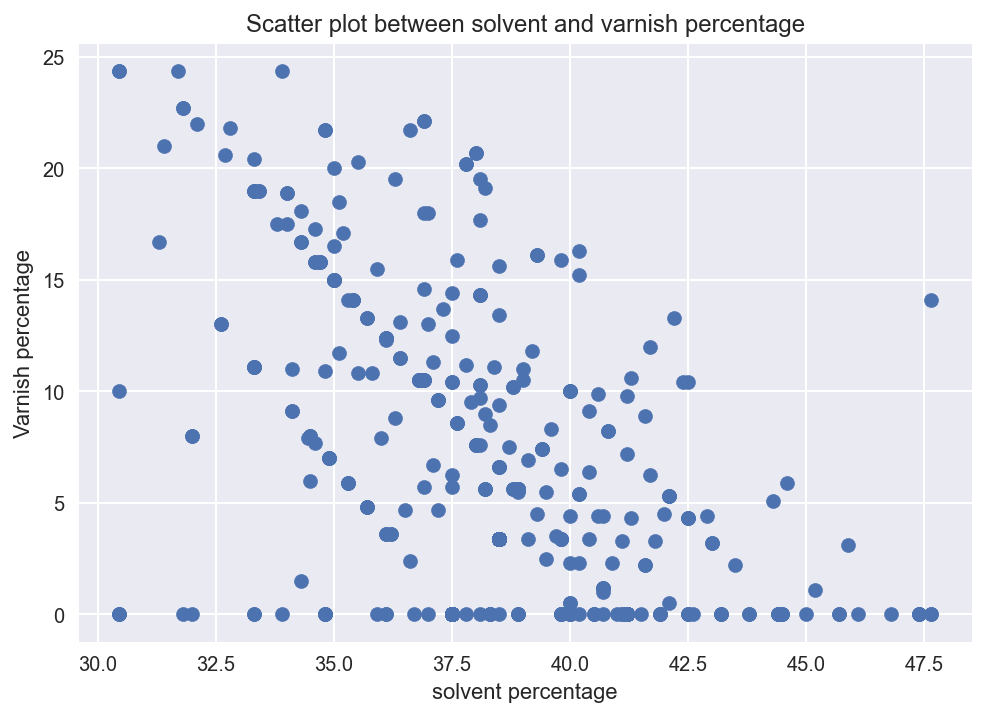

In [89]:
plt.scatter(x=df.solvent_pct, y=df.varnish_pct)
plt.title('Scatter plot between solvent and varnish percentage')
plt.xlabel('solvent percentage')
plt.ylabel('Varnish percentage')
plt.show()

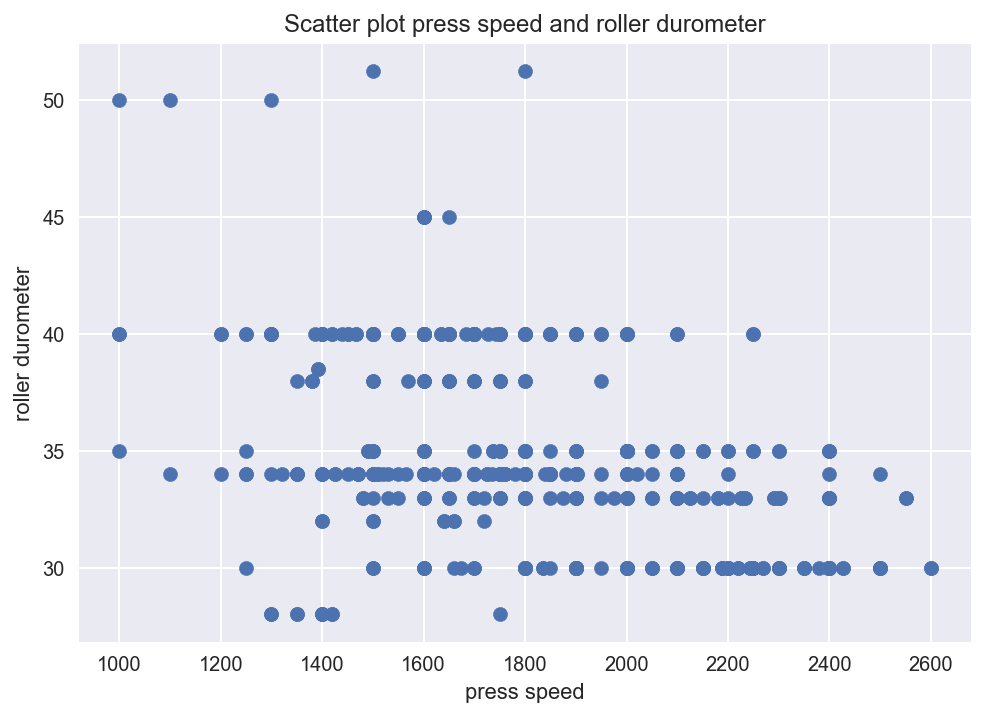

In [90]:
plt.scatter(x=df.press_speed, y=df.roller_durometer)
plt.title('Scatter plot press speed and roller durometer')
plt.xlabel('press speed')
plt.ylabel('roller durometer')
plt.show()

We can observe a downward trend between the variables in the above three scatter plots. The trend is more pronounced with a lower correlation coefficient.

### Association between the target 'band_type' and other numerical features <a id='4.2.3'></a>

We can have boxplots of numeric columns split based on the 'band_type' target feature. We will get an insight into the effect a numerical column has on prediction of the target variable.

In [91]:
ps = [('band_type',i) for i in num] # list of plots to be created.

In [92]:
d

{0: [0, 0], 1: [0, 1], 2: [1, 0], 3: [1, 1]}

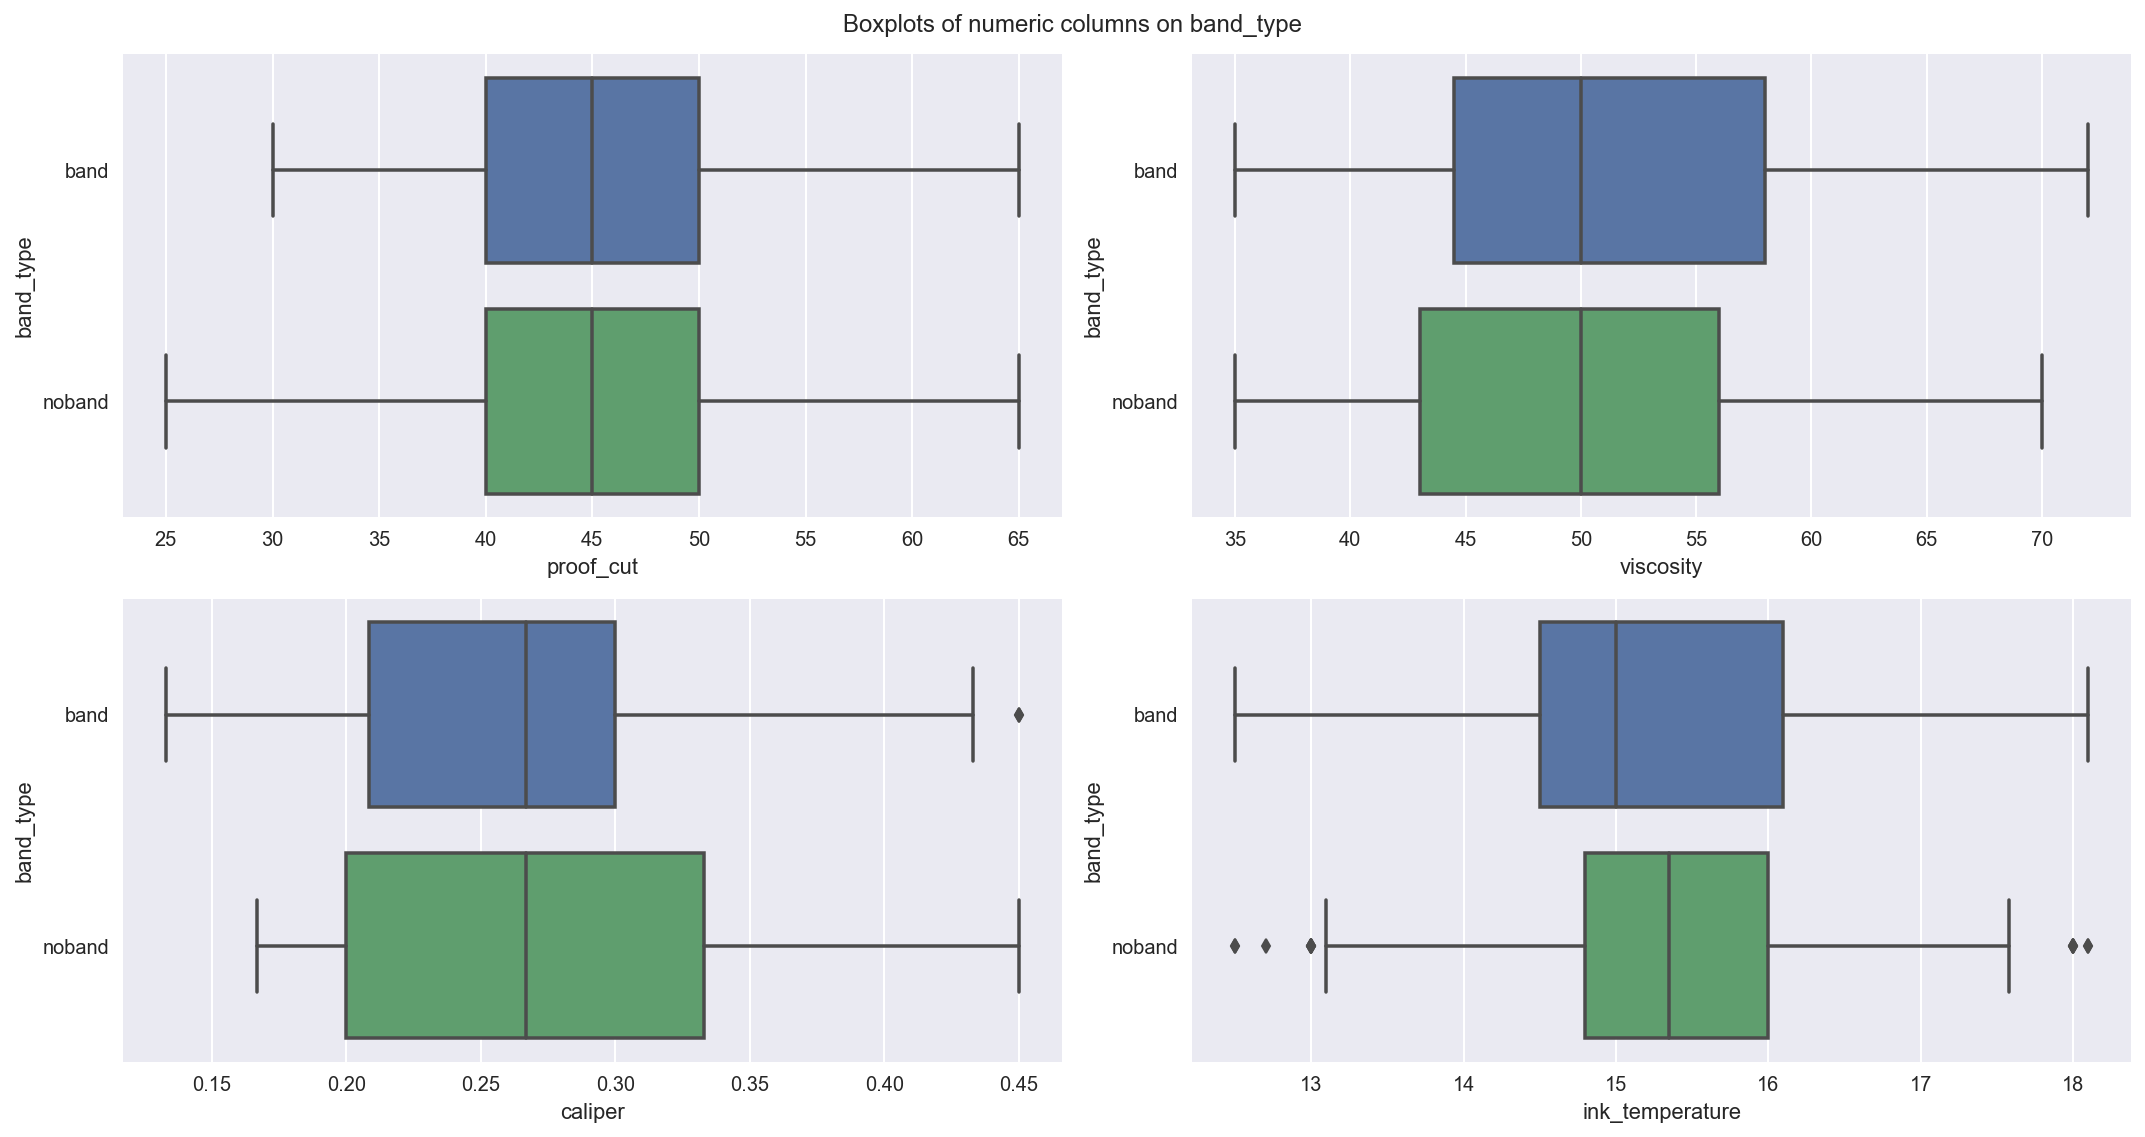

In [93]:
fig, ax = plt.subplots(2,2)
fig.suptitle('Boxplots of numeric columns on band_type')
for p in range(4):
    r,c = d[p]
    cur = num[:4][p]
    sns.boxplot(data = df, x=cur, y='band_type', ax=ax[r,c])
    ax[r,c].set_title
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- These variables seem to not have that drastic an effect on cylinder banding.

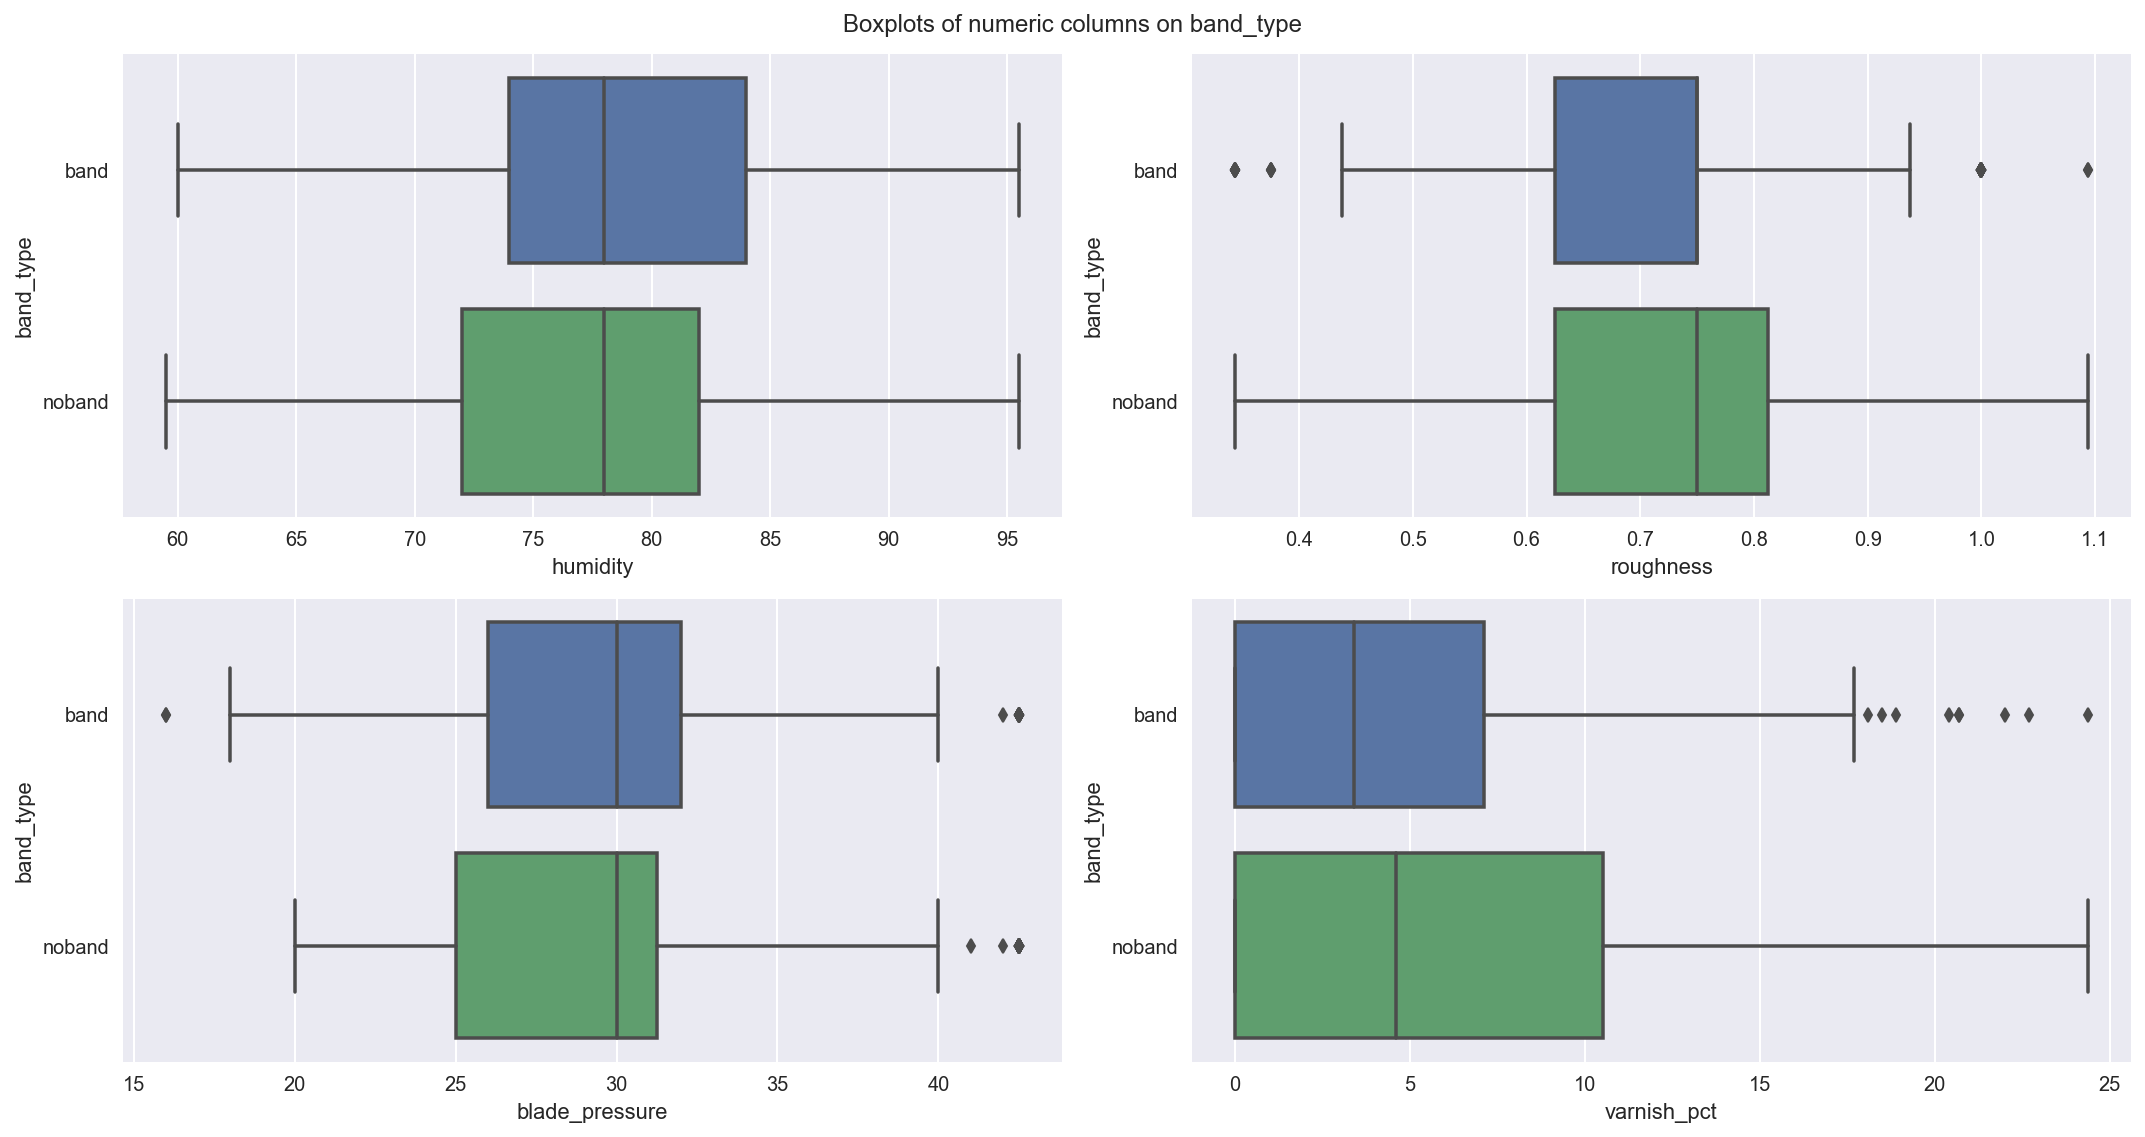

In [94]:
fig, ax = plt.subplots(2,2)
fig.suptitle('Boxplots of numeric columns on band_type')
for p in range(4):
    r,c = d[p]
    cur = num[4:8][p]
    sns.boxplot(data = df, x=cur, y='band_type', ax=ax[r,c])
    ax[r,c].set_title
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- From the boxplot of 'varnish_pct', we can see that lower the reading, higher the chances of cylinder banding.
- Other variables seem to not have that drastic an effect on cylinder banding.

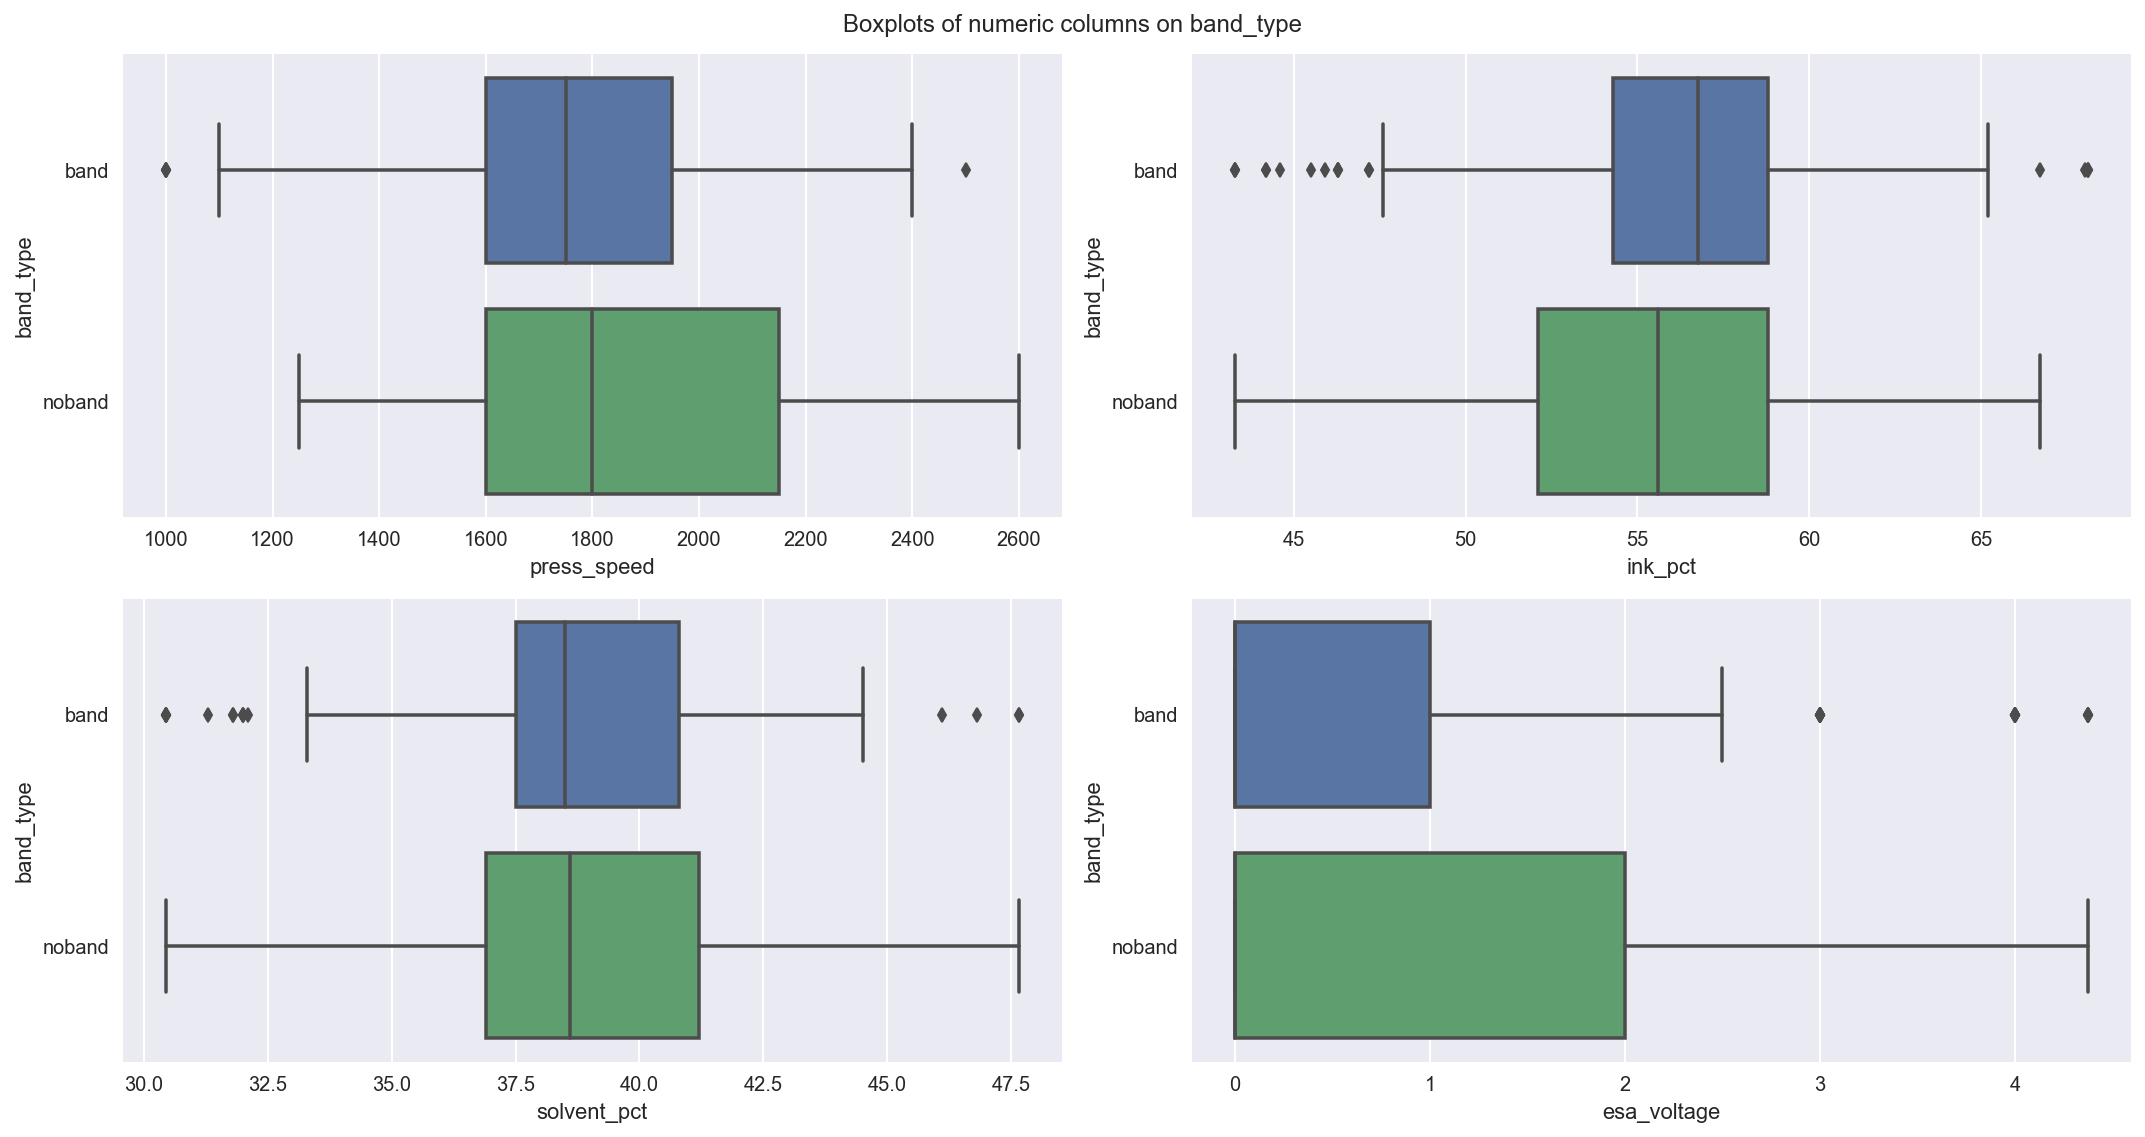

In [95]:
fig, ax = plt.subplots(2,2)
fig.suptitle('Boxplots of numeric columns on band_type')
for p in range(4):
    r,c = d[p]
    cur = num[8:12][p]
    sns.boxplot(data = df, x=cur, y='band_type', ax=ax[r,c])
    ax[r,c].set_title
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- 'esa_voltage' feature's boxplot shows that a lower reading increases the chances of cylinder banding. Especially when the reading is between 0 to 1. A higher esa_voltage should reduce the chances of this banding.
- Other variables seem to not have that drastic an effect on cylinder banding.

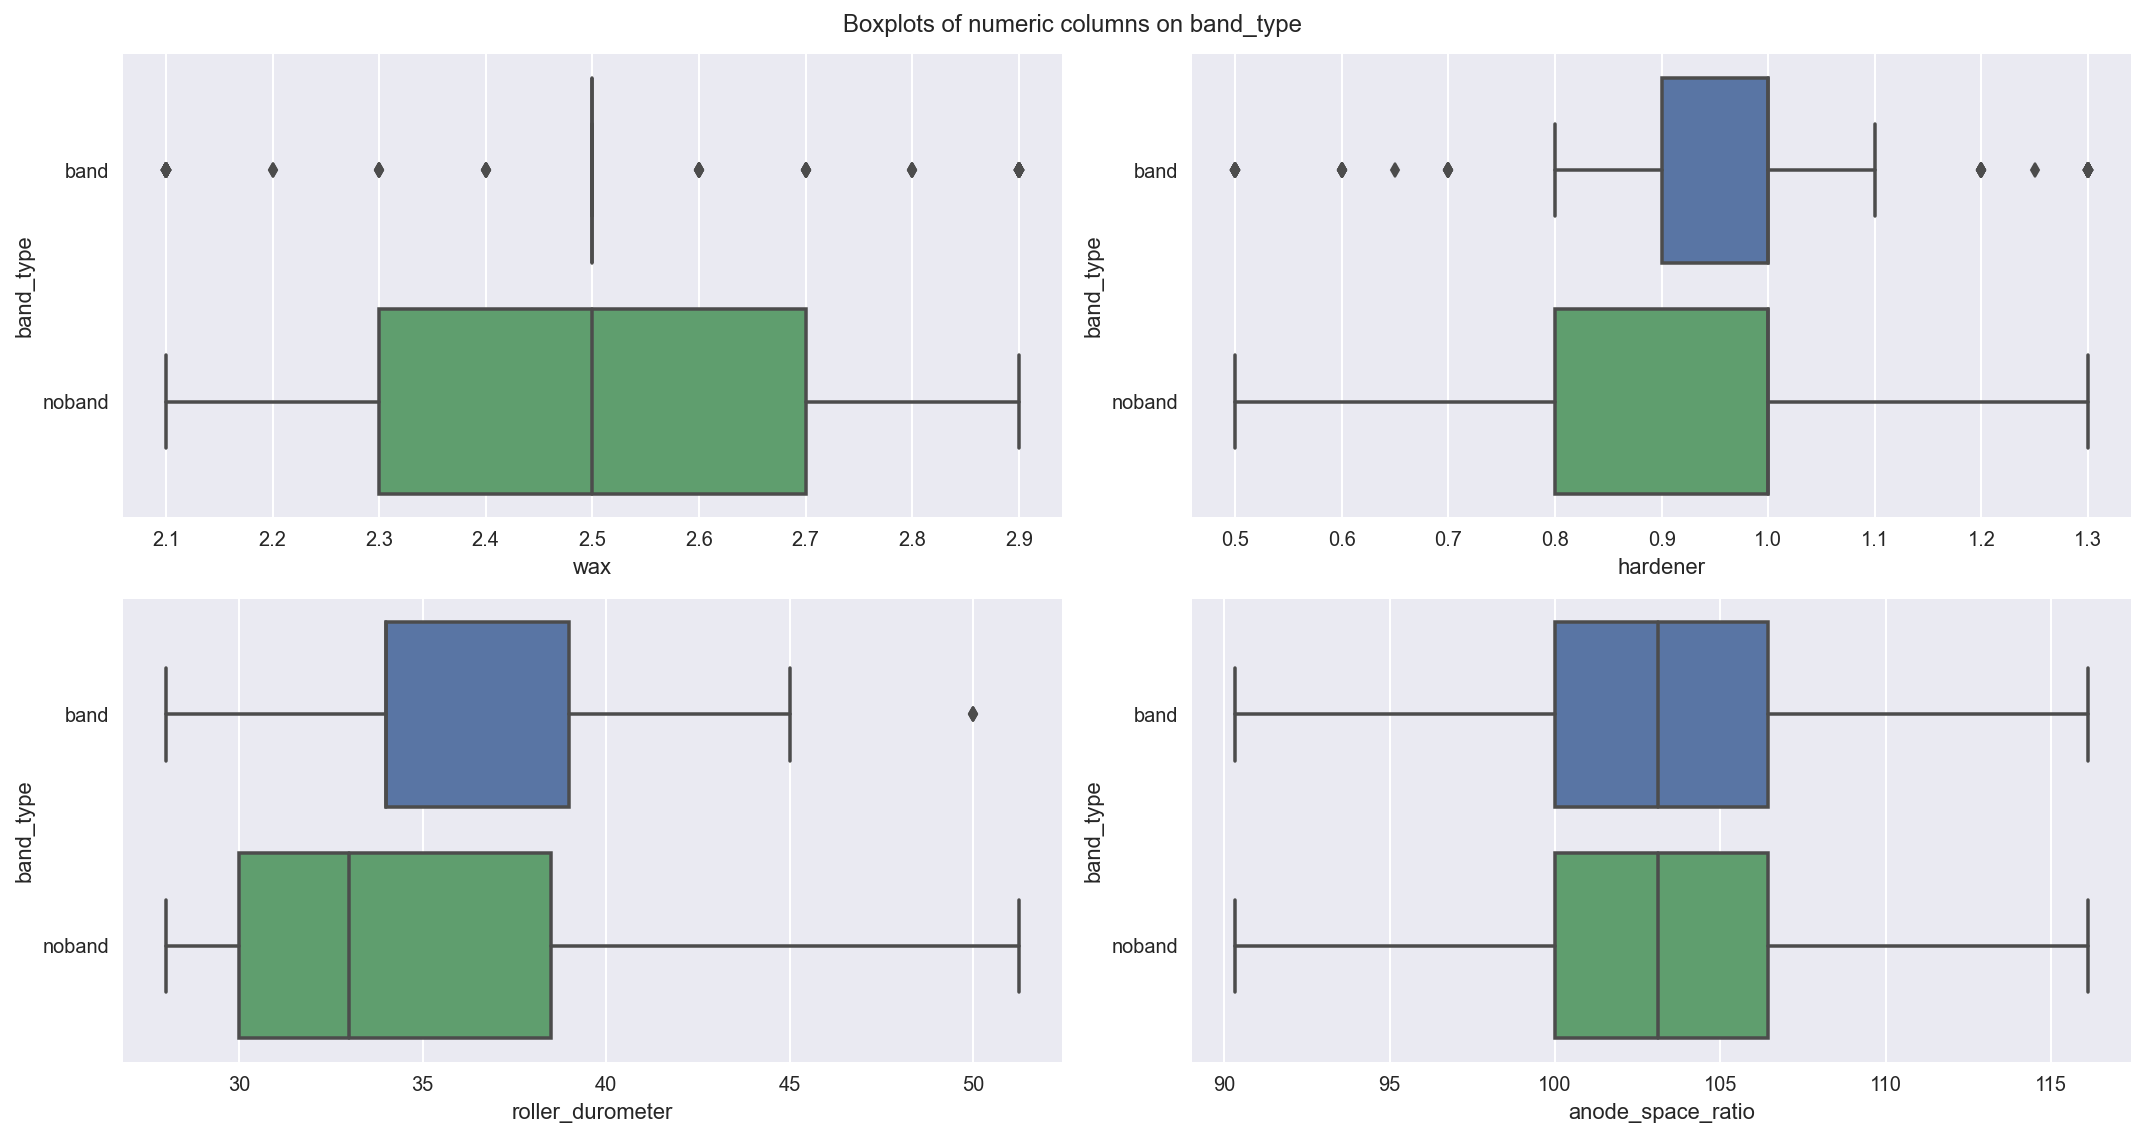

In [96]:
fig, ax = plt.subplots(2,2)
fig.suptitle('Boxplots of numeric columns on band_type')
for p in range(4):
    r,c = d[p]
    cur = num[12:16][p]
    sns.boxplot(data = df, x=cur, y='band_type', ax=ax[r,c])
    ax[r,c].set_title
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- In the boxplot of 'wax' feature, we can see that having a reading of 2.5 almost always guarantee cylinder banding (manufacturing delays). So, having a different 'wax' reading should reduces the chances of this cylinder banding.
- In the boxplot of 'roller_durometer', we can see a narrow range of values where the chances of banding is maximum - around 34 to 29 approximately.
- The same is the case from the boxplot of 'hardener', a narrow range of values where the chances of banding is high - 0.8 to 1.0.
- 'anode_space_ratio' seems to have no impact on cylinder banding.

### Barplots between the target 'band_type' and other categorical columns <a id='4.2.4'></a>

A grouped barchart will be plotted between the target variable and the other categorical variables. Variables that have more than 10 sub-type will be excluded from this as the plot will be extremely complicated to infer from.

In [97]:
d

{0: [0, 0], 1: [0, 1], 2: [1, 0], 3: [1, 1]}

In [98]:
cur_cat = [i for i in cat if i not in ['cylinder_number','customer','job_number','press', 'band_type']]
len(cur_cat)

11

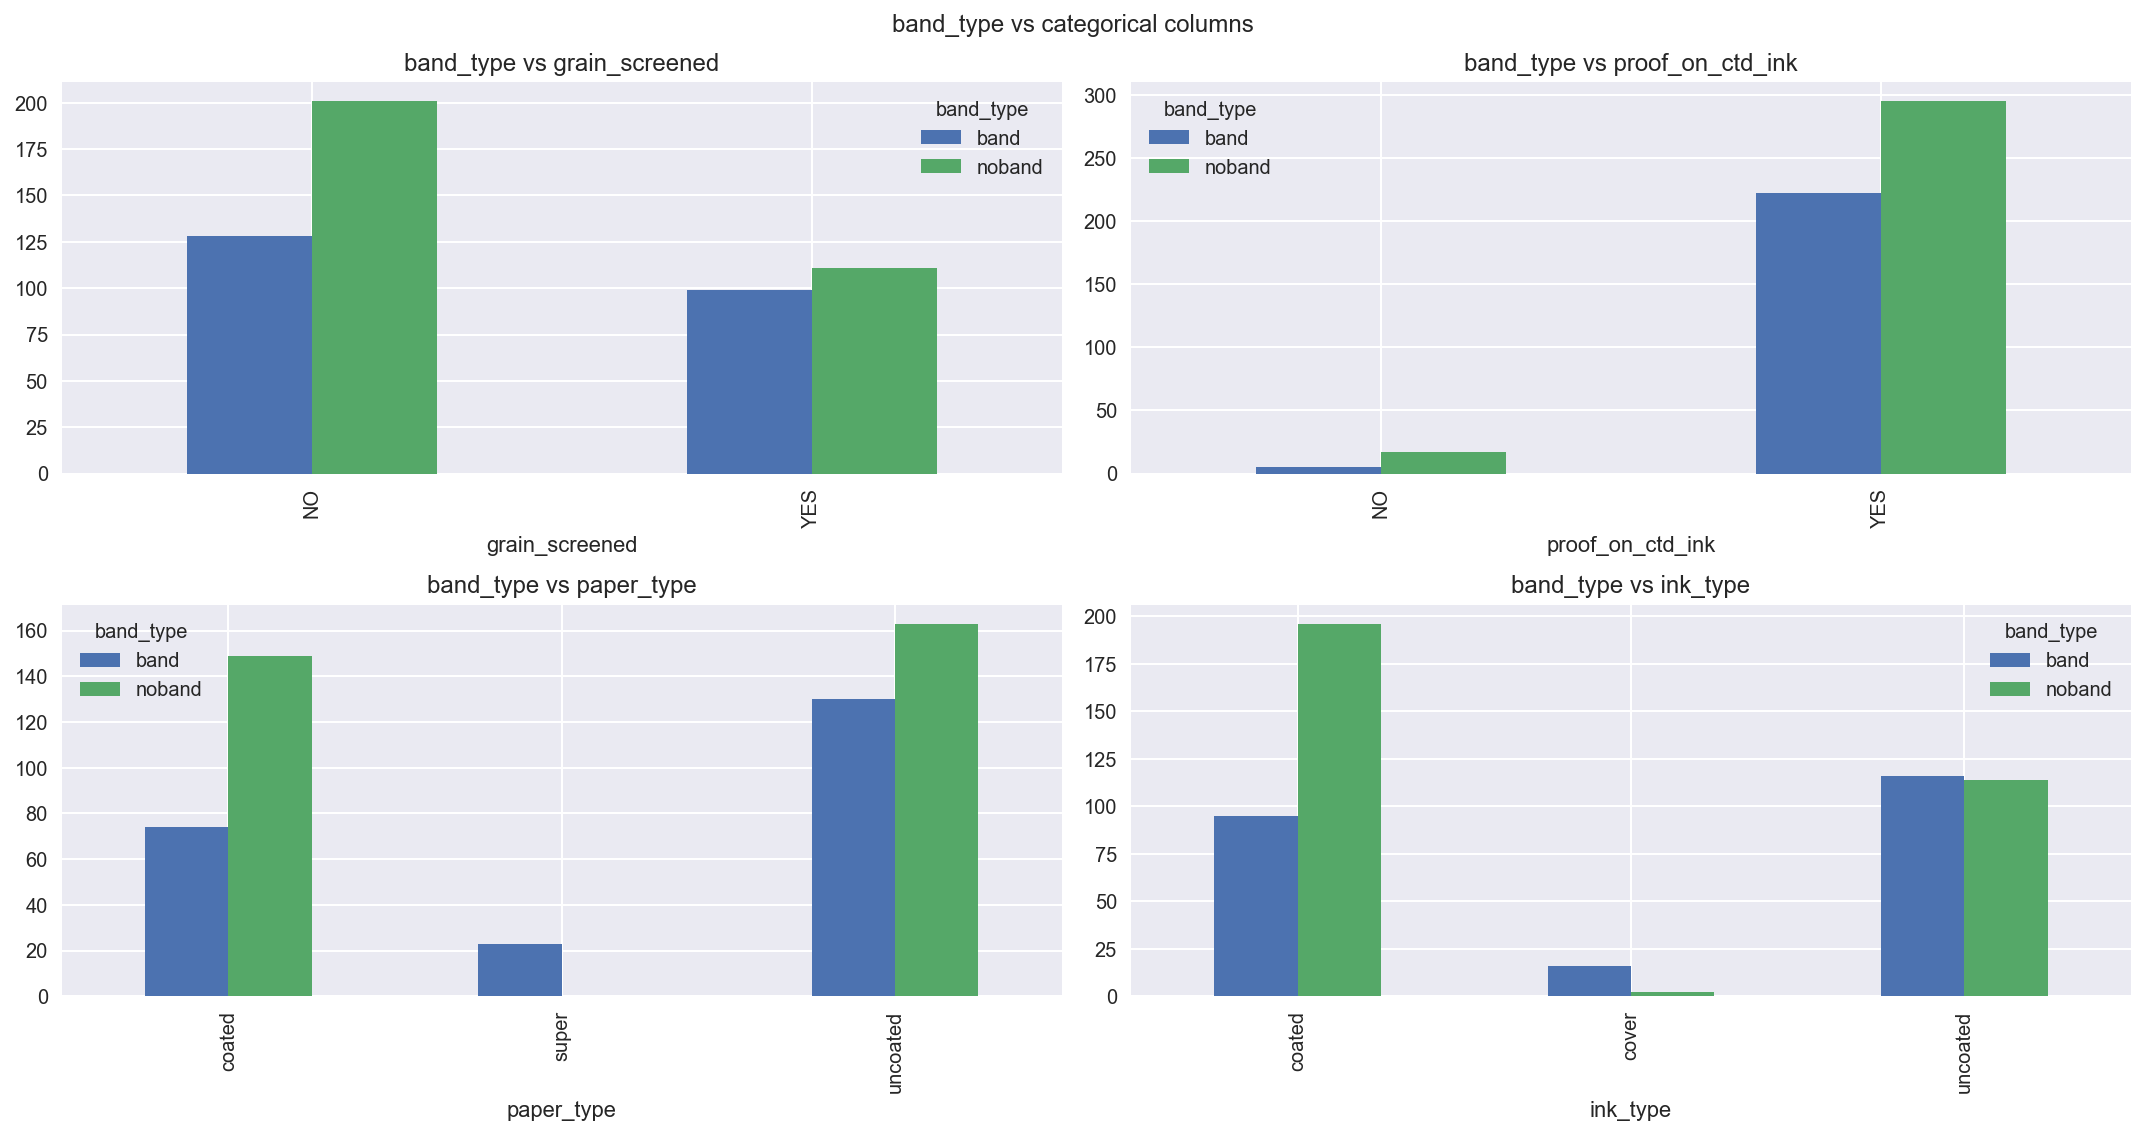

In [99]:
fig, ax = plt.subplots(2,2)
fig.suptitle('band_type vs categorical columns')

for p in range(4):
    r,c = d[p]
    col = cur_cat[:4][p]
    cur = pd.crosstab(index=df[col], columns=df.band_type)
    cur.iloc[:10,:].plot.bar(ax=ax[r,c])
    ax[r,c].set_title('band_type vs '+col)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- From the 'ink_type' vs 'band_type' barplots, we can see that 'uncoated' and 'cover' ink_type has more chances of cylinder banding than the other sub-categories. It would be better to use 'coated' ink_type
- From the 'paper_type' vs 'band_type' barplots, we can see that using the 'super' paper type always guaranteed cylinder banding than the others. 

Other variables don't seem to have a remarkable impact on cylinder banding

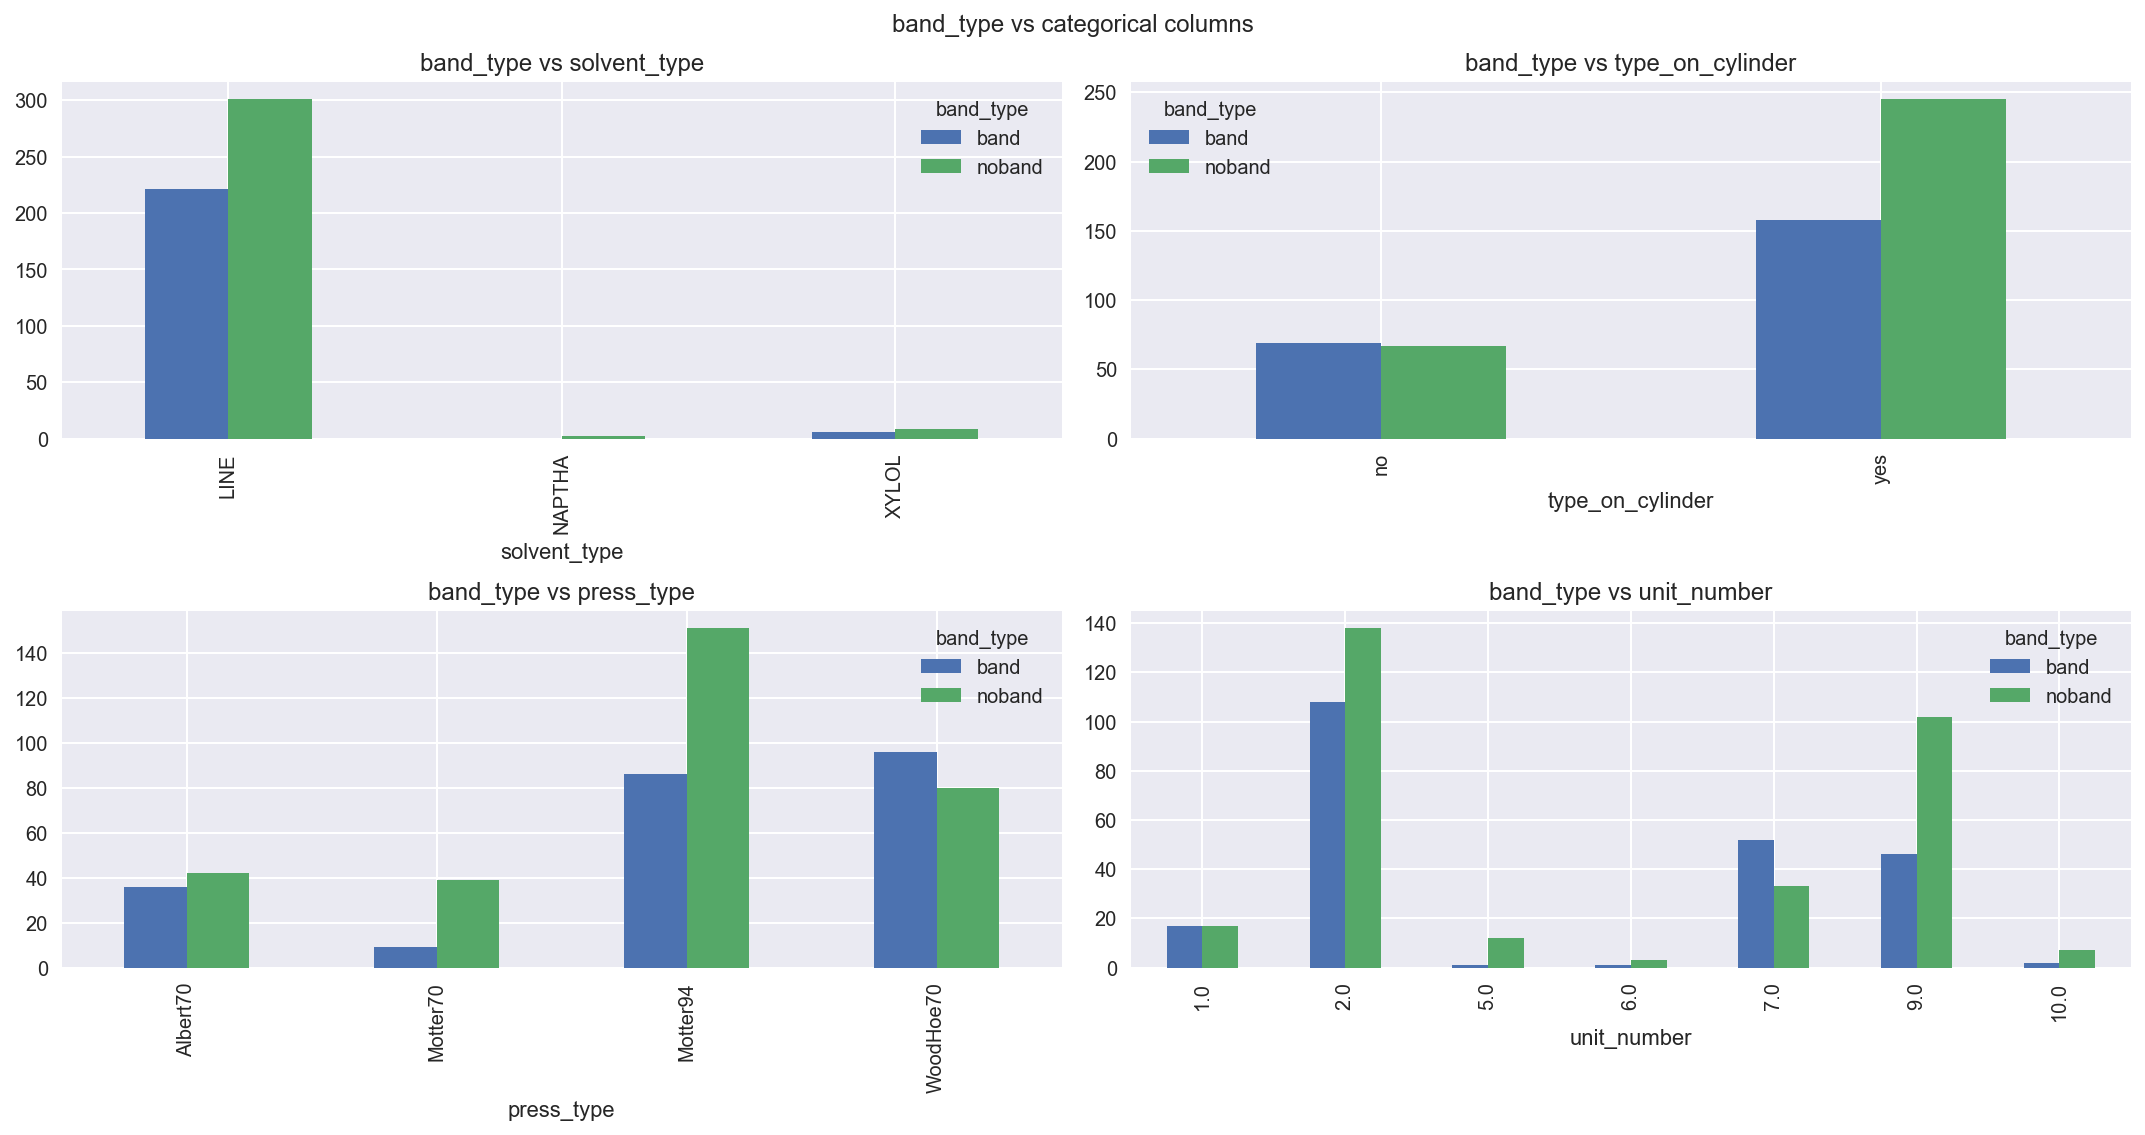

In [100]:
fig, ax = plt.subplots(2,2)
fig.suptitle('band_type vs categorical columns')

for p in range(4):
    r,c = d[p]
    col = cur_cat[4:8][p]
    cur = pd.crosstab(index=df[col], columns=df.band_type)
    cur.iloc[:10,:].plot.bar(ax=ax[r,c])
    ax[r,c].set_title('band_type vs '+col)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- From 'type_on_cylinder' vs 'band_type' barplot, we can see that not having the type on the cylinder lead to more cylinder banding than the other case. It would be better to use cylinders with the type on the cylinder.
- From the 'press_type' vs 'band_type' barplot, we can see that using 'WoodHoe70' press type caused more cylinder banding than the other types.
- From 'unit_number' vs 'band_type' barplot, we can see that unit number 7 had more cylinder banding than others.

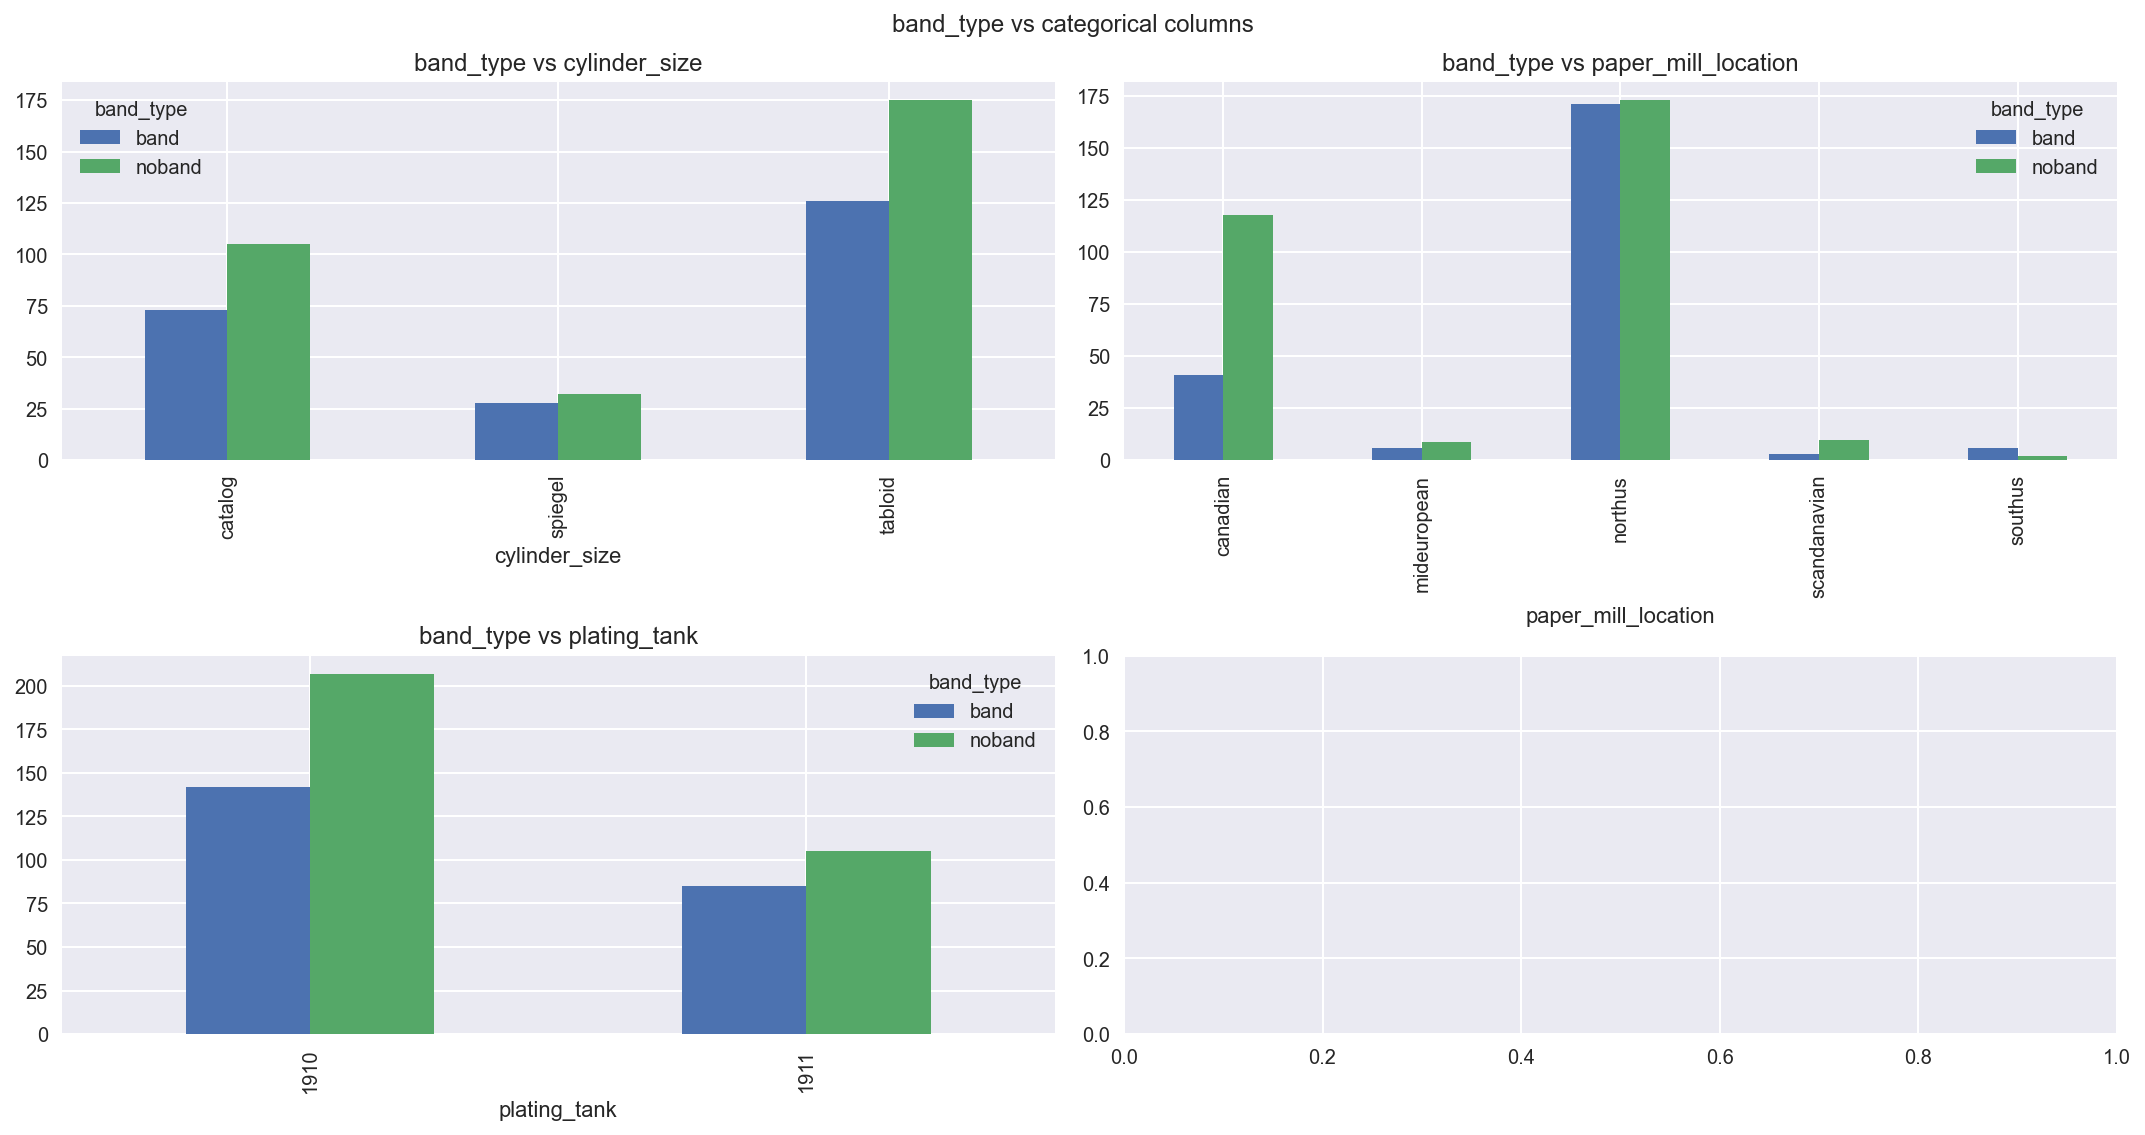

In [101]:
fig, ax = plt.subplots(2,2)
fig.suptitle('band_type vs categorical columns')

for p in range(4):
    r,c = d[p]
    if p==3:
        break
    col = cur_cat[8:12][p]
    cur = pd.crosstab(index=df[col], columns=df.band_type)
    cur.iloc[:10,:].plot.bar(ax=ax[r,c])
    ax[r,c].set_title('band_type vs '+col)
fig.set_size_inches(15,8)
fig.tight_layout()

**Inferences from the four plots above:**

- From 'paper_mill_location' vs 'band_type' barplot, we can see that using 'canadian' imported paper guarantees much less banding than the others. Also using 'southus' type cause more cylinder banding.

## Three variable plots <a id='4.3'></a>

The numerical features for the plots chosen below are due to the high correlation they had. Through the scatter plots below, we will see if the combination of the two numeric features help in classification of the target variable.

#### Scatter plot of 'ink_pct' and 'varnish_pct' broken by the target band_type <a id='4.3.1'></a>

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


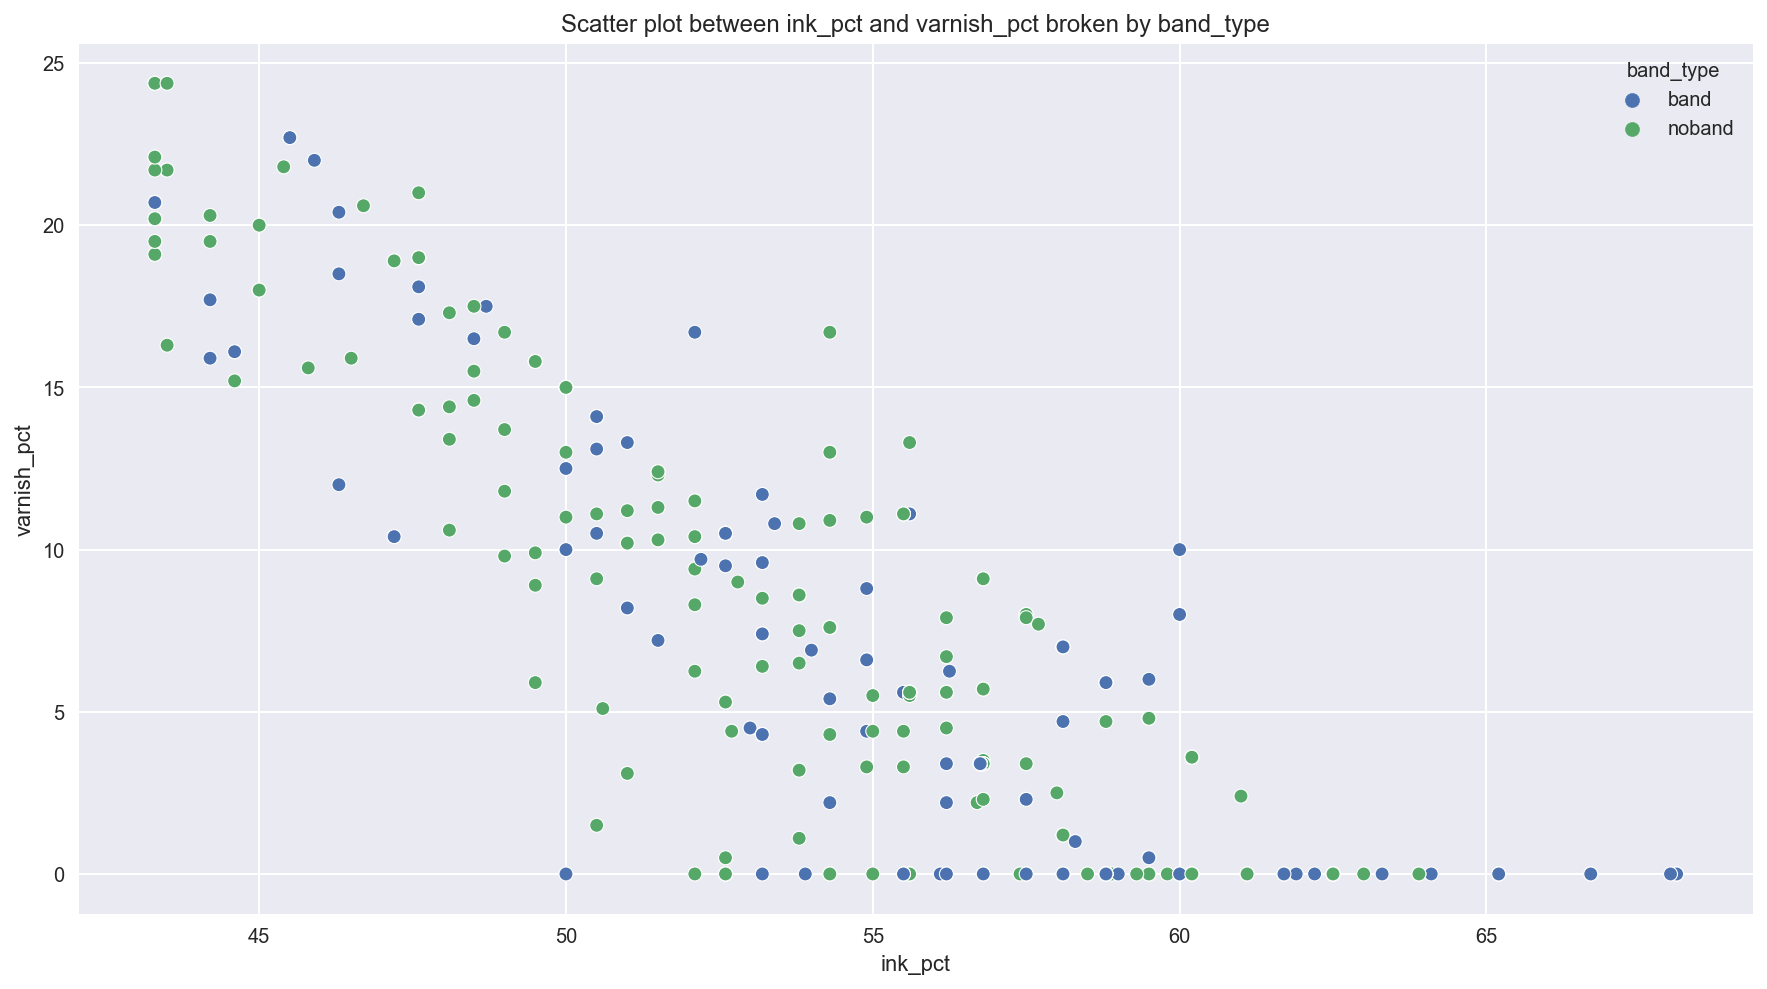

In [102]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.ink_pct, df.varnish_pct, hue=df.band_type)
plt.title('Scatter plot between ink_pct and varnish_pct broken by band_type')
plt.show()

**Inference from the above plot**:

There is no clear class classification of band type based on the ink_pct and varnish_pct values.

#### Scatter plot of 'varnish_pct' and 'solvent_pct' broken by the target 'band_type' <a id='4.3.2'></a>

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


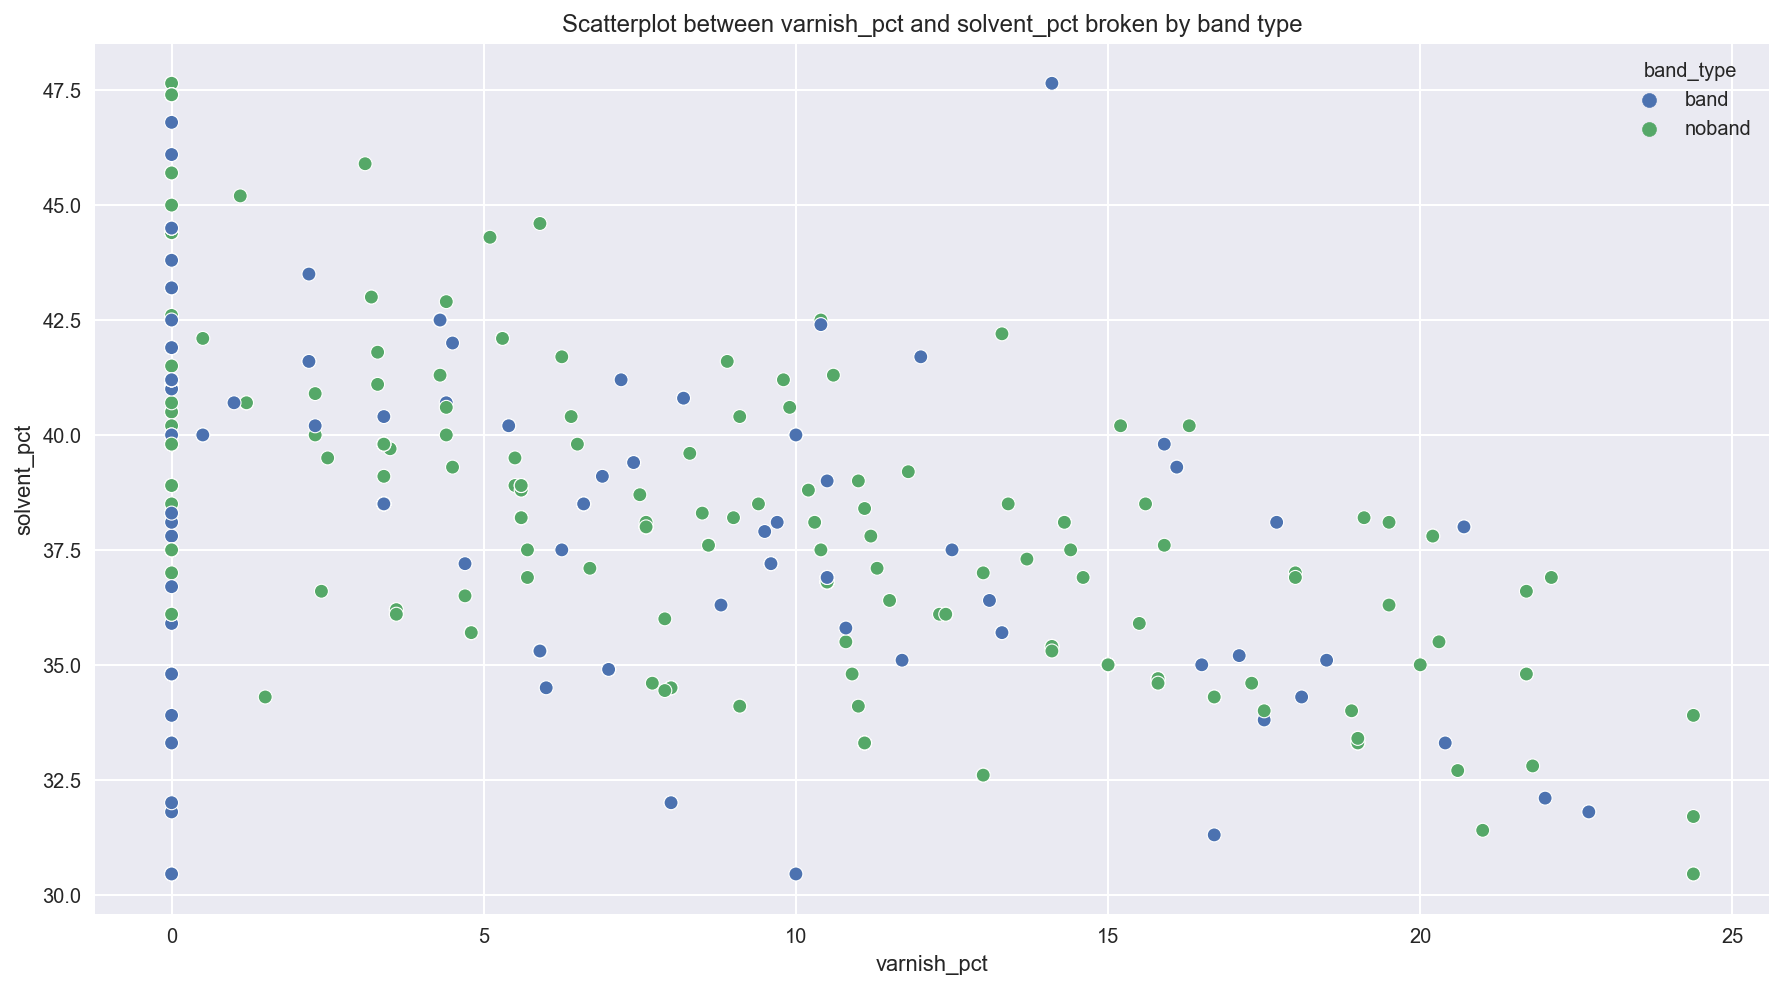

In [103]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.varnish_pct, df.solvent_pct, hue=df.band_type)
plt.title('Scatterplot between varnish_pct and solvent_pct broken by band type')
plt.show()

**Inferences from the above plot**:

There is no clear class classification of band type based on the solvent_pct and varnish_pct values.

#### Saving the dataframe locally:

In [104]:
#df.to_csv('Phase1_Group107.csv', index=False)

# Summary and Conclusion <a id='sc'></a>

Accurate predictions of cylinder banding reduces the effort of experts to a great extent. Based on the elected features from analysis, the classification (band/noband) will be done by machine learning models. This will require the experts to simply assess the outputs from the learning system and suggest improvements on it. 

In the phase 1 of this project, we performed the tasks of data cleaning, preprocessing and data visualization. We dropped variables that were redundant for the learning of the model. Timestamp, ink_type, blade_mfg, direct_steam, cylinder_division, chrome_content, current_density and esa_amperage were the columns that were dropped. Among the rows, we dropped just two of them as the target and many other columns were also missing.<br>
We also discovered several outliers present in the numerical features, which we handled by capping to the upper or lower limits.

We performed several univariate and bi-variate visualizations to understand the features better. For categorical variables, bar-graphs were plotted. A high class imbalance amongst sub-categories was one of the reason the feature was dropped. For numerical variables, we plotted histograms and boxplots. From the boxplots, we were able to identify several outliers, which were handled as mentioned earlier. We visualized the boxplots again to ensure the absense of outliers after the treatment.
Under bi-variate analysis, we found that certain combinations of features had a high correlation. This high correlation was identified from the heatmap plotted between numerical variables. And these combinations were also analysed using scatter plots.
We then focused our bi-variate analysis to identify any prominent patterns betweeen the features and the target variables.
For every numerical column and the target 'band_type', we visualized box-plots to see if a particular range of values led to cylinder banding. For every categorical column and the target variable, we visualized grouped barplots. Inferences were drawn from each plot.
We also conducted tri-variate analysis where we plotted scatter plots of two numeric variables that had a high correlation. We found that although these variables are correlated, it didn't help classify the observation as band/noband in the target variable band_type.

We could summarise that the numerical features - varnish_pct, esa_voltage, wax, hardener and roller_durometer had specific range of values where we could observe a high cylinder banding. Amongst the categorical features we made inferences about specific sub-cateogries of - ink_type, paper_type, type_on_cylinder, press_type, unit_number and paper_mill_location. However, we imputed over 25% of the missing values for paper_mill_location, thus any inference from it should be taken with a pinch of salt.

Besides these inferences, we can carry out tri-variate analysis and contemplate on other ways we could have dealt with missing values and outliers. Once the right steps for preprocessing is agreed upon, we can get to the next phase of the project which would be machine learning model development.

# References: <a id='ref'></a>

Bob Evans, RR Donnelley & Sons Co, Gallatin Division, Cylinder Bands, UCI Machine Learning Repository from https://archive.ics.uci.edu/ml/datasets/Cylinder+Bands